Analysis for IndeLLM

In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import data
newscoreEvo = pd.read_csv("../Results/new_score_evofit.csv")
newscoreFit = pd.read_csv("../Results/new_score_fit.csv")
newscoreMask = pd.read_csv("../Results/new_score_evofit_mask.csv")
alldata = pd.read_csv("../Data/Indel_curated.csv")

# Remove hastags when more models are added (Check in all cells)
# newscoresProstT5 = pd.read_csv("../Results/new_score_ProstT5.csv") 
# newscoresESM3 = pd.read_csv("../Results/new_score_ESM3.csv")


newscoreEvo.head()
newscoreFit.head()
newscoreMask.head()
# newscoreProsT5.head() 
# newscoreESM3.head()

/tmp/ipykernel_3043747/1213852838.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,id,Global_WT,Global_mut,LengthDiff,ScoreLocal_WT,ScoreMutPred,ScoreLocal_clean,TrueLabel
0,0,0,189.218739,191.889408,-5,189.218739,190.068744,-0.881780,Benign/Likely benign
1,1,1,189.218739,177.363140,3,187.763546,177.363140,8.410706,Pathogenic
2,2,2,333.875908,300.442267,8,327.171740,300.442267,25.290531,Likely pathogenic
3,3,3,376.662294,374.460167,2,375.485097,374.460167,0.599557,likely benign
4,4,4,319.928052,319.013214,1,319.483585,319.013214,0.351924,likely benign


In [3]:
import numpy as np

#Add difference of fitness (positive value positive effect, negative value negative effect)
newscoreEvo['dif_local'] = newscoreEvo['ScoreMutPred'] - newscoreEvo['ScoreLocal_WT']
newscoreEvo['dif_clean'] = newscoreEvo['ScoreLocal_clean'] * -1
newscoreEvo['dif_global'] = newscoreEvo['Global_mut'] - newscoreEvo['Global_WT']

newscoreFit['dif_local'] = newscoreFit['ScoreMutPred'] - newscoreFit['ScoreLocal_WT']
newscoreFit['dif_clean'] = newscoreFit['ScoreLocal_clean'] * -1
newscoreFit['dif_global'] = newscoreFit['Global_mut'] - newscoreFit['Global_WT']

newscoreMask['dif_local'] = newscoreMask['ScoreMutPred'] - newscoreMask['ScoreLocal_WT']
newscoreMask['dif_clean'] = newscoreMask['ScoreLocal_clean'] * -1
newscoreMask['dif_global'] = newscoreMask['Global_mut'] - newscoreMask['Global_WT']

# newscoreProstT5['dif_local'] = newscoreProstT5['ScoreMutPred'] - newscoreProstT5['ScoreLocal_WT']
# newscoreProstT5['dif_clean'] = newscoreProstT5['ScoreLocal_clean'] * -1
# newscoreProstT5['dif_global'] = newscoreProstT5['Global_mut'] - newscoreProstT5['Global_WT']

# newscoreESM3['dif_local'] = newscoreESM3['ScoreMutPred'] - newscoreESM3['ScoreLocal_WT']
# newscoreESM3['dif_clean'] = newscoreESM3['ScoreLocal_clean'] * -1
# newscoreESM3['dif_global'] = newscoreESM3['Global_mut'] - newscoreESM3['Global_WT']


#Add a cleaned up labels info
newscoreEvo['labels_cleaned'] = np.where(newscoreEvo['TrueLabel'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(newscoreEvo['TrueLabel'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

newscoreFit['labels_cleaned'] = np.where(newscoreFit['TrueLabel'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(newscoreFit['TrueLabel'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

newscoreMask['labels_cleaned'] = np.where(newscoreMask['TrueLabel'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(newscoreMask['TrueLabel'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

'''
newscoreProstT5['labels_cleaned'] = np.where(newscoreProstT5['TrueLabel'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(newscoreProstT5['TrueLabel'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))

newscoreESM3['labels_cleaned'] = np.where(newscoreESM3['TrueLabel'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(newscoreESM3['TrueLabel'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))
'''

#Add binary values to the predictions
newscoreEvo['labels_binary'] = newscoreEvo.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)
newscoreFit['labels_binary'] = newscoreFit.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)
newscoreMask['labels_binary'] = newscoreMask.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)
# newscoreProstT5['labels_binary'] = newscoreProstT5.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)
# newscoreESM3['labels_binary'] = newscoreESM3.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)

newscoreEvo.head()
newscoreFit.head() 
newscoreMask.head()
# newscoreProsT5.head() 
# newscoreESM3.head()

"\nnewscoreProstT5['labels_cleaned'] = np.where(newscoreProstT5['TrueLabel'].str.contains('benign', case=False, na=False), \n                                'Benign', \n                                np.where(newscoreProstT5['TrueLabel'].str.contains('pathogenic', case=False, na=False), \n                                         'Pathogenic', \n                                         np.nan))\n\nnewscoreESM3['labels_cleaned'] = np.where(newscoreESM3['TrueLabel'].str.contains('benign', case=False, na=False), \n                                'Benign', \n                                np.where(newscoreESM3['TrueLabel'].str.contains('pathogenic', case=False, na=False), \n                                         'Pathogenic', \n                                         np.nan))\n"

,Unnamed: 0,id,Global_WT,Global_mut,LengthDiff,ScoreLocal_WT,ScoreMutPred,ScoreLocal_clean,TrueLabel,dif_local,dif_clean,dif_global,labels_cleaned,labels_binary
0,0,0,295.767301,300.969236,-5,295.767301,296.304054,-0.644719,Benign/Likely benign,0.536754,0.644719,5.201935,Benign,1
1,1,1,295.767301,289.073451,3,292.962547,289.073451,3.249152,Pathogenic,-3.889096,-3.249152,-6.693850,Pathogenic,0
2,2,2,407.084133,394.013293,8,400.145773,394.013293,5.524456,Likely pathogenic,-6.132480,-5.524456,-13.070841,Pathogenic,0
3,3,3,647.492545,645.392827,2,645.537914,645.392827,0.000000,likely benign,-0.145087,-0.000000,-2.099718,Benign,1
4,4,4,408.391911,407.251893,1,407.447733,407.251893,0.162545,likely benign,-0.195840,-0.162545,-1.140019,Benign,1


,Unnamed: 0,id,Global_WT,Global_mut,LengthDiff,ScoreLocal_WT,ScoreMutPred,ScoreLocal_clean,TrueLabel,dif_local,dif_clean,dif_global,labels_cleaned,labels_binary
0,0,0,181.476895,183.480642,-5,181.476895,181.778753,-0.248517,Benign/Likely benign,0.301858,0.248517,2.003747,Benign,1
1,1,1,181.483899,175.380443,3,179.805439,175.380443,4.998932,Pathogenic,-4.424996,-4.998932,-6.103457,Pathogenic,0
2,2,2,211.443508,202.832782,8,205.616827,202.832782,3.421697,Likely pathogenic,-2.784045,-3.421697,-8.610727,Pathogenic,0
3,3,3,144.695909,144.958606,2,143.377049,144.958606,-1.833967,likely benign,1.581557,1.833967,0.262697,Benign,1
4,4,4,198.446120,197.355093,1,197.898296,197.355093,0.235453,likely benign,-0.543203,-0.235453,-1.091027,Benign,1


,Unnamed: 0,id,Global_WT,Global_mut,LengthDiff,ScoreLocal_WT,ScoreMutPred,ScoreLocal_clean,TrueLabel,dif_local,dif_clean,dif_global,labels_cleaned,labels_binary
0,0,0,189.218739,191.889408,-5,189.218739,190.068744,-0.881780,Benign/Likely benign,0.850005,0.881780,2.670669,Benign,1
1,1,1,189.218739,177.363140,3,187.763546,177.363140,8.410706,Pathogenic,-10.400407,-8.410706,-11.855599,Pathogenic,0
2,2,2,333.875908,300.442267,8,327.171740,300.442267,25.290531,Likely pathogenic,-26.729473,-25.290531,-33.433640,Pathogenic,0
3,3,3,376.662294,374.460167,2,375.485097,374.460167,0.599557,likely benign,-1.024930,-0.599557,-2.202127,Benign,1
4,4,4,319.928052,319.013214,1,319.483585,319.013214,0.351924,likely benign,-0.470371,-0.351924,-0.914838,Benign,1


In [4]:
#Calculating the average dif values per bening and pathogenic
evomeanpath_local = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()
evomeanpath_clean = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()
evomeanpath_global = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()

evomeanbeg_local = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Benign']['dif_local'].mean()
evomeanbeg_clean = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Benign']['dif_clean'].mean()
evomeanbeg_global = newscoreEvo[newscoreEvo['labels_cleaned'] == 'Benign']['dif_global'].mean()

fitmeanpath_local = newscoreFit[newscoreFit['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()
fitmeanpath_clean = newscoreFit[newscoreFit['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()
fitmeanpath_global = newscoreFit[newscoreFit['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()

fitmeanbeg_local = newscoreFit[newscoreFit['labels_cleaned'] == 'Benign']['dif_local'].mean()
fitmeanbeg_clean = newscoreFit[newscoreFit['labels_cleaned'] == 'Benign']['dif_clean'].mean()
fitmeanbeg_global = newscoreFit[newscoreFit['labels_cleaned'] == 'Benign']['dif_global'].mean()

maskmeanpath_local = newscoreMask[newscoreMask['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()
maskmeanpath_clean = newscoreMask[newscoreMask['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()
maskmeanpath_global = newscoreMask[newscoreMask['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()

maskmeanbeg_local = newscoreMask[newscoreMask['labels_cleaned'] == 'Benign']['dif_local'].mean()
maskmeanbeg_clean = newscoreMask[newscoreMask['labels_cleaned'] == 'Benign']['dif_clean'].mean()
maskmeanbeg_global = newscoreMask[newscoreMask['labels_cleaned'] == 'Benign']['dif_global'].mean()

'''
ProstT5meanpath_local = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()
ProstT5meanpath_clean = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()
ProstT5meanpath_global = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()

ProstT5meanbeg_local = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_local'].mean()
ProstT5meanbeg_clean = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_clean'].mean()
ProstT5meanbeg_global = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_global'].mean()

ESM3meanpath_local = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()
ESM3meanpath_clean = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()
ESM3meanpath_global = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()

ESM3meanbeg_local = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Benign']['dif_local'].mean()
ESM3meanbeg_clean = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Benign']['dif_clean'].mean()
ESM3meanbeg_global = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Benign']['dif_global'].mean()
'''

print("Evo Model, mean for pathogenic indels, local score:", evomeanpath_local)
print("Evo Model, mean for pathogenic indels, clean score:", evomeanpath_clean)
print("Evo Model, mean for pathogenic indels, global score:", evomeanpath_global)

print("Evo Model, mean for begign indels, local score:", evomeanbeg_local)
print("Evo Model, mean for begign indels, clean score:", evomeanbeg_clean)
print("Evo Model, mean for begign indels, global score:", evomeanbeg_global)

print("Fit Model, mean for pathogenic indels, local score:", fitmeanpath_local)
print("Fit Model, mean for pathogenic indels, clean score:", fitmeanpath_clean)
print("Fit Model, mean for pathogenic indels, global score:", fitmeanpath_global)

print("Fit Model, mean for begign indels, local score:", fitmeanbeg_local)
print("Fit Model, mean for begign indels, clean score:", fitmeanbeg_clean)
print("Fit Model, mean for begign indels, global score:", fitmeanbeg_global)

print("Mask Model, mean for pathogenic indels, local score:", maskmeanpath_local)
print("Mask Model, mean for pathogenic indels, clean score:", maskmeanpath_clean)
print("Mask Model, mean for pathogenic indels, global score:", maskmeanpath_global)

print("Mask Model, mean for begign indels, local score:", maskmeanbeg_local)
print("Mask Model, mean for begign indels, clean score:", maskmeanbeg_clean)
print("Mask Model, mean for begign indels, global score:", maskmeanbeg_global)

'''
print("ProstT5 Model, mean for pathogenic indels, local score:", ProstT5meanpath_local)
print("ProstT5 Model, mean for pathogenic indels, clean score:", ProstT5meanpath_clean)
print("ProstT5 Model, mean for pathogenic indels, global score:", ProstT5meanpath_global)

print("ProstT5 Model, mean for begign indels, local score:", ProstT5meanbeg_local)
print("ProstT5 Model, mean for begign indels, clean score:", ProstT5meanbeg_clean)
print("ProstT5 Model, mean for begign indels, global score:", ProstT5meanbeg_global)

print("EMS3 Model, mean for pathogenic indels, local score:", EMS3meanpath_local)
print("EMS3 Model, mean for pathogenic indels, clean score:", EMS3meanpath_clean)
print("EMS3 Model, mean for pathogenic indels, global score:", EMS3meanpath_global)

print("EMS3 Model, mean for begign indels, local score:", EMS3meanbeg_local)
print("EMS3 Model, mean for begign indels, clean score:", EMS3meanbeg_clean)
print("EMS3 Model, mean for begign indels, global score:", EMS3meanbeg_global)
'''

"\nProstT5meanpath_local = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()\nProstT5meanpath_clean = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()\nProstT5meanpath_global = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()\n\nProstT5meanbeg_local = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_local'].mean()\nProstT5meanbeg_clean = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_clean'].mean()\nProstT5meanbeg_global = newscoreProstT5[newscoreProstT5['labels_cleaned'] == 'Benign']['dif_global'].mean()\n\nESM3meanpath_local = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_local'].mean()\nESM3meanpath_clean = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_clean'].mean()\nESM3meanpath_global = newscoreESM3[newscoreESM3['labels_cleaned'] == 'Pathogenic']['dif_global'].mean()\n\nESM3meanbeg_local =

Evo Model, mean for pathogenic indels, local score: -2.7015808789617317
Evo Model, mean for pathogenic indels, clean score: -2.5729836734634217
Evo Model, mean for pathogenic indels, global score: -4.135338863260464
Evo Model, mean for begign indels, local score: -0.13253590429117926
Evo Model, mean for begign indels, clean score: -0.11322591955984496
Evo Model, mean for begign indels, global score: -1.056590880761578
Fit Model, mean for pathogenic indels, local score: -2.0832261666583762
Fit Model, mean for pathogenic indels, clean score: -2.0555403636876215
Fit Model, mean for pathogenic indels, global score: -2.6550366098996685
Fit Model, mean for begign indels, local score: -0.056013812321234556
Fit Model, mean for begign indels, clean score: -0.0695734221185893
Fit Model, mean for begign indels, global score: -0.5900808426498513
Mask Model, mean for pathogenic indels, local score: -6.497244695457748
Mask Model, mean for pathogenic indels, clean score: -5.764778619332133
Mask Model

'\nprint("ProstT5 Model, mean for pathogenic indels, local score:", ProstT5meanpath_local)\nprint("ProstT5 Model, mean for pathogenic indels, clean score:", ProstT5meanpath_clean)\nprint("ProstT5 Model, mean for pathogenic indels, global score:", ProstT5meanpath_global)\n\nprint("ProstT5 Model, mean for begign indels, local score:", ProstT5meanbeg_local)\nprint("ProstT5 Model, mean for begign indels, clean score:", ProstT5meanbeg_clean)\nprint("ProstT5 Model, mean for begign indels, global score:", ProstT5meanbeg_global)\n\nprint("EMS3 Model, mean for pathogenic indels, local score:", EMS3meanpath_local)\nprint("EMS3 Model, mean for pathogenic indels, clean score:", EMS3meanpath_clean)\nprint("EMS3 Model, mean for pathogenic indels, global score:", EMS3meanpath_global)\n\nprint("EMS3 Model, mean for begign indels, local score:", EMS3meanbeg_local)\nprint("EMS3 Model, mean for begign indels, clean score:", EMS3meanbeg_clean)\nprint("EMS3 Model, mean for begign indels, global score:", EM

In [5]:
#Filter the dataset to only inlude sequences that we have predictions for from all the other methods. 

#Extract the IDs that we kept from the original dataset
keptlabels = alldata[alldata['Id_matching'].isin(newscoreFit['id'])]
len(keptlabels)

#Drop sequences that does not have a prediction for the other methods
alldata_filtered = keptlabels.dropna(subset=['CADD','CAPICE','PROVEAN','FATHMM-indel','MutationTaster2021','MutPredIndel','SIFT-indel','VEST-indel','VVP'])
len(alldata_filtered)

len(keptlabels) - len(alldata_filtered)

#Clean the labels
alldata_filtered['labels_cleaned'] = np.where(alldata_filtered['Classification'].str.contains('benign', case=False, na=False), 
                                'Benign', 
                                np.where(alldata_filtered['Classification'].str.contains('pathogenic', case=False, na=False), 
                                         'Pathogenic', 
                                         np.nan))
alldata_filtered['labels_binary'] = alldata_filtered.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)

3815

3478

337

/tmp/ipykernel_3043747/2716531556.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered['labels_cleaned'] = np.where(alldata_filtered['Classification'].str.contains('benign', case=False, na=False),
/tmp/ipykernel_3043747/2716531556.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered['labels_binary'] = alldata_filtered.apply(lambda row: 0 if row['labels_cleaned'] == 'Pathogenic' else 1, axis=1)


F1 score CADD: 0.7602230483271375
F1 score CAPICE: 0.8192771084337349
F1 score FATHMM: 0.8351990049751243
F1 score MutPredIndel: 0.717948717948718
F1 score MutTaster2021: 0.9692267907938971
F1 score PROVEAN: 0.9005342152124142
F1 score SIFT: 0.70040959625512
F1 score VEST: 0.8544010589013898
F1 score VVP: 0.825735718407386


/tmp/ipykernel_3043747/139587725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered['FATHMM-indel'] = pd.to_numeric(alldata_filtered['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/139587725.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered['MutationTaster2021']]
/tmp/ipykernel_3043747/139587725.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions')

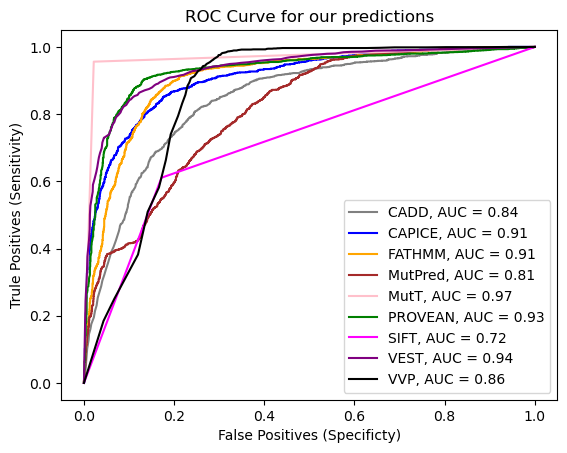

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score

#Calculate F1 and ROC curves
pred_CADD = alldata_filtered['CADD'].values
pred_CAPICE = alldata_filtered['CAPICE'].values
alldata_filtered['FATHMM-indel'] = pd.to_numeric(alldata_filtered['FATHMM-indel'], errors='coerce')
pred_FATHMM = alldata_filtered['FATHMM-indel'].values
pred_MutPred = alldata_filtered['MutPredIndel'].values
alldata_filtered['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered['MutationTaster2021']]
pred_MutT = alldata_filtered['MutationTaster2021_bin'].values
pred_PROVEAN = alldata_filtered['PROVEAN'].values
alldata_filtered['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered['SIFT-indel']]
pred_SIFT = alldata_filtered['SIFT_bin'].values
pred_VEST = alldata_filtered['VEST-indel'].values
pred_VVP = alldata_filtered['VVP'].values

truelabels_CADD = alldata_filtered['labels_binary'].values
truelabels_CAPICE = alldata_filtered['labels_binary'].values
truelabels_FATHMM = alldata_filtered['labels_binary'].values
truelabels_MutPred = alldata_filtered['labels_binary'].values
truelabels_MutT = alldata_filtered['labels_binary'].values
truelabels_PROVEAN = alldata_filtered['labels_binary'].values
truelabels_SIFT = alldata_filtered['labels_binary'].values
truelabels_VEST = alldata_filtered['labels_binary'].values
truelabels_VVP = alldata_filtered['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_CADD = 1 - truelabels_CADD
truelabels_CAPICE = 1 - truelabels_CAPICE
truelabels_FATHMM = 1 - truelabels_FATHMM
truelabels_MutPred = 1 - truelabels_MutPred
truelabels_VEST = 1 - truelabels_VEST
truelabels_VVP = 1 - truelabels_VVP

#Calculating FP, TN and thresholds
fpr_CADD, tpr_CADD, thersholds_CADD = metrics.roc_curve(truelabels_CADD, pred_CADD)
fpr_CAPICE, tpr_CAPICE, thersholds_CAPICE = metrics.roc_curve(truelabels_CAPICE, pred_CAPICE)
fpr_FATHMM, tpr_FATHMM, thersholds_FATHMM = metrics.roc_curve(truelabels_FATHMM, pred_FATHMM)
fpr_MutPred, tpr_MutPred, thersholds_MutPred = metrics.roc_curve(truelabels_MutPred, pred_MutPred)
fpr_MutT, tpr_MutT, thersholds_MutT = metrics.roc_curve(truelabels_MutT, pred_MutT)
fpr_PROVEAN, tpr_PROVEAN, thersholds_PROVEAN = metrics.roc_curve(truelabels_PROVEAN, pred_PROVEAN)
fpr_SIFT, tpr_SIFT, thersholds_SIFT = metrics.roc_curve(truelabels_SIFT, pred_SIFT)
fpr_VEST, tpr_VEST, thersholds_VEST = metrics.roc_curve(truelabels_VEST, pred_VEST)
fpr_VVP, tpr_VVP, thersholds_VVP = metrics.roc_curve(truelabels_VVP, pred_VVP)

roc_auc_CADD = round(metrics.auc(fpr_CADD, tpr_CADD), 2)
roc_auc_CAPICE = round(metrics.auc(fpr_CAPICE, tpr_CAPICE), 2)
roc_auc_FATHMM = round(metrics.auc(fpr_FATHMM, tpr_FATHMM), 2)
roc_auc_MutPred = round(metrics.auc(fpr_MutPred, tpr_MutPred), 2)
roc_auc_MutT = round(metrics.auc(fpr_MutT, tpr_MutT), 2)
roc_auc_PROVEAN = round(metrics.auc(fpr_PROVEAN, tpr_PROVEAN), 2)
roc_auc_SIFT = round(metrics.auc(fpr_SIFT, tpr_SIFT), 2)
roc_auc_VEST = round(metrics.auc(fpr_VEST, tpr_VEST), 2)
roc_auc_VVP = round(metrics.auc(fpr_VVP, tpr_VVP), 2)

#Calculating F1 score
tresh_CADD = thersholds_CADD[np.argmax(tpr_CADD - fpr_CADD)]
tresh_CAPICE = thersholds_CAPICE[np.argmax(tpr_CAPICE - fpr_CAPICE)]
tresh_FATHMM = thersholds_FATHMM[np.argmax(tpr_FATHMM - fpr_FATHMM)]
tresh_MutPred = thersholds_MutPred[np.argmax(tpr_MutPred - fpr_MutPred)]
tresh_MutT = thersholds_MutT[np.argmax(tpr_MutT - fpr_MutT)]
tresh_PROVEAN = thersholds_PROVEAN[np.argmax(tpr_PROVEAN - fpr_PROVEAN)]
tresh_SIFT = thersholds_SIFT[np.argmax(tpr_SIFT - fpr_SIFT)]
tresh_VEST = thersholds_VEST[np.argmax(tpr_VEST - fpr_VEST)]
tresh_VVP = thersholds_VVP[np.argmax(tpr_VVP - fpr_VVP)]

pred_CADD_bin = [1 if x >= tresh_CADD else 0 for x in pred_CADD]
pred_CAPICE_bin = [1 if x >= tresh_CAPICE else 0 for x in pred_CAPICE]
pred_FATHMM_bin = [1 if x >= tresh_FATHMM else 0 for x in pred_FATHMM]
pred_MutPred_bin = [1 if x >= tresh_MutPred else 0 for x in pred_MutPred]
pred_MutT_bin = [1 if x >= tresh_MutT else 0 for x in pred_MutT]
pred_PROVEAN_bin = [1 if x >= tresh_PROVEAN else 0 for x in pred_PROVEAN]
pred_SIFT_bin = [1 if x >= tresh_SIFT else 0 for x in pred_SIFT]
pred_VEST_bin = [1 if x >= tresh_VEST else 0 for x in pred_VEST]
pred_VVP_bin = [1 if x >= tresh_VVP else 0 for x in pred_VVP]

f1_CADD = f1_score(truelabels_CADD, pred_CADD_bin, average = 'binary')
f1_CAPICE = f1_score(truelabels_CAPICE, pred_CAPICE_bin, average = 'binary')
f1_FATHMM = f1_score(truelabels_FATHMM, pred_FATHMM_bin, average = 'binary')
f1_MutPred = f1_score(truelabels_MutPred, pred_MutPred_bin, average = 'binary')
f1_MutT = f1_score(truelabels_MutT, pred_MutT_bin, average = 'binary')
f1_PROVEAN = f1_score(truelabels_PROVEAN, pred_PROVEAN_bin, average = 'binary')
f1_SIFT = f1_score(truelabels_SIFT, pred_SIFT_bin, average = 'binary')
f1_VEST = f1_score(truelabels_VEST, pred_VEST_bin, average = 'binary')
f1_VVP = f1_score(truelabels_VVP, pred_VVP_bin, average = 'binary')

print("F1 score CADD:", f1_CADD)
print("F1 score CAPICE:", f1_CAPICE)
print("F1 score FATHMM:", f1_FATHMM)
print("F1 score MutPredIndel:", f1_MutPred)
print("F1 score MutTaster2021:", f1_MutT)
print("F1 score PROVEAN:", f1_PROVEAN)
print("F1 score SIFT:", f1_SIFT)
print("F1 score VEST:", f1_VEST)
print("F1 score VVP:", f1_VVP)

#Plotting AUC 
plt.plot(fpr_CADD, tpr_CADD, label = "CADD, AUC = "+str(roc_auc_CADD), color = "grey")
plt.plot(fpr_CAPICE, tpr_CAPICE, label = "CAPICE, AUC = "+str(roc_auc_CAPICE), color = "blue")
plt.plot(fpr_FATHMM, tpr_FATHMM, label = "FATHMM, AUC = "+str(roc_auc_FATHMM), color = "orange")
plt.plot(fpr_MutPred, tpr_MutPred, label = "MutPred, AUC = "+str(roc_auc_MutPred), color = "brown")
plt.plot(fpr_MutT, tpr_MutT, label = "MutT, AUC = "+str(roc_auc_MutT), color = "pink")
plt.plot(fpr_PROVEAN, tpr_PROVEAN, label = "PROVEAN, AUC = "+str(roc_auc_PROVEAN), color = "green")
plt.plot(fpr_SIFT, tpr_SIFT, label = "SIFT, AUC = "+str(roc_auc_SIFT), color = "magenta")
plt.plot(fpr_VEST, tpr_VEST, label = "VEST, AUC = "+str(roc_auc_VEST), color = "purple")
plt.plot(fpr_VVP, tpr_VVP, label = "VVP, AUC = "+str(roc_auc_VVP), color = "black")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions")
plt.legend(loc = 'best')
plt.show()


Text(0.5, 1.0, 'CADD')

Text(0.5, 1.0, 'CAPICE')

Text(0.5, 1.0, 'FATHMM')

Text(0.5, 1.0, 'MutPred')

Text(0.5, 1.0, 'MutTaster2021')

Text(0.5, 1.0, 'PROVEAN')

Text(0.5, 1.0, 'SIFT')

Text(0.5, 1.0, 'VEST')

Text(0.5, 1.0, 'VVP')

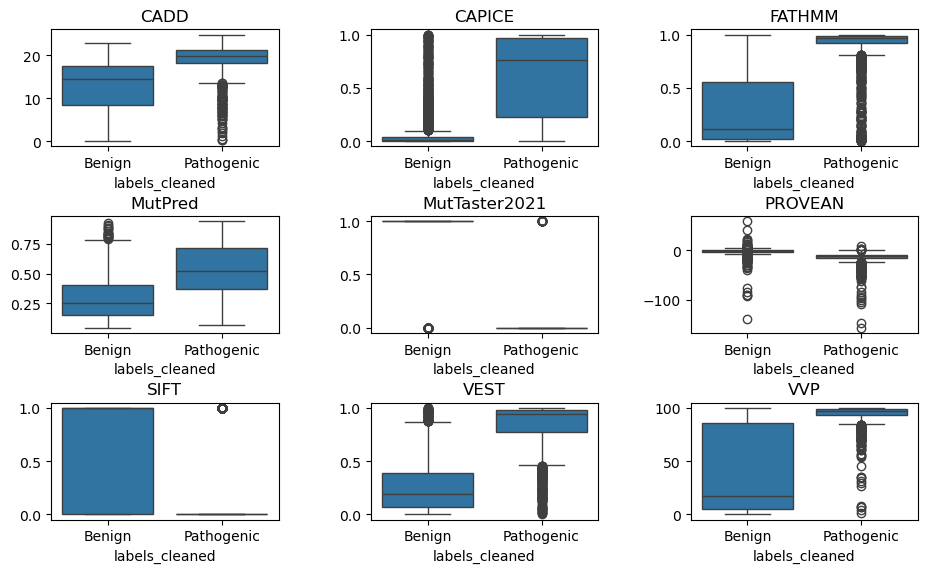

In [7]:
#Boxplots of methods
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=2.9)
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_CADD, ax=axes[0,0]).set_title('CADD')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_CAPICE, ax=axes[0,1]).set_title('CAPICE')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_FATHMM, ax=axes[0,2]).set_title('FATHMM')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_MutPred, ax=axes[1,0]).set_title('MutPred')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_MutT, ax=axes[1,1]).set_title('MutTaster2021')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_PROVEAN, ax=axes[1,2]).set_title('PROVEAN')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_SIFT, ax=axes[2,0]).set_title('SIFT')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_VEST, ax=axes[2,1]).set_title('VEST')
sns.boxplot(x = alldata_filtered['labels_cleaned'], y = pred_VVP, ax=axes[2,2]).set_title('VVP')
plt.show()

In [8]:
#Filter our dataset to keep the same indels as predicted by the methods above
Fit_filtered = newscoreFit[newscoreFit['id'].isin(alldata_filtered['Id_matching'])]
Evo_filtered = newscoreEvo[newscoreEvo['id'].isin(alldata_filtered['Id_matching'])]
Mask_filtered = newscoreMask[newscoreMask['id'].isin(alldata_filtered['Id_matching'])]

# ProstT5_filtered = newscoreProstT5[newscoreProstT5['id'].isin(alldata_filtered['Id_matching'])]
# ESM3_filtered = newscoreESM3[newscoreESM3['id'].isin(alldata_filtered['Id_matching'])]

len(Fit_filtered) == len(alldata_filtered)
len(Evo_filtered) == len(alldata_filtered)
len(Mask_filtered) == len(alldata_filtered)
# len(ProstT5_filtered) == len(alldata_filtered)
# len(ESM3_filtered) == len(alldata_filtered)

True

False

False

"\npred_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_ESM3_global = ESM3_filtered['dif_global'].values\npred_ESM3_local = ESM3_filtered['dif_local'].values\npred_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_ProstT5_global, tpr_ProstT5_global, thersholds_ProstT5_global = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_global)\nfpr_ProstT5_local, tpr_ProstT5_local, thersholds_ProstT5_local = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_local)\nfpr_ProstT5_clean, tpr_ProstT5_clean, thersholds_ProstT5_clean = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_clean)\nfpr_ESM3_global, tpr_ESM3_global, thersholds_ESM3_global = metrics.roc_curve(truelabels_ESM3, pred_ESM3_global)\nfpr_ESM3_local, tpr_ESM3_local, thersholds_E

Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions - Global scores')

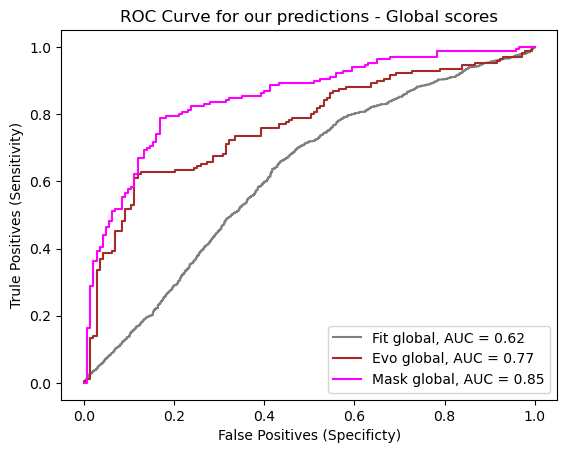

Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions - Local scores')

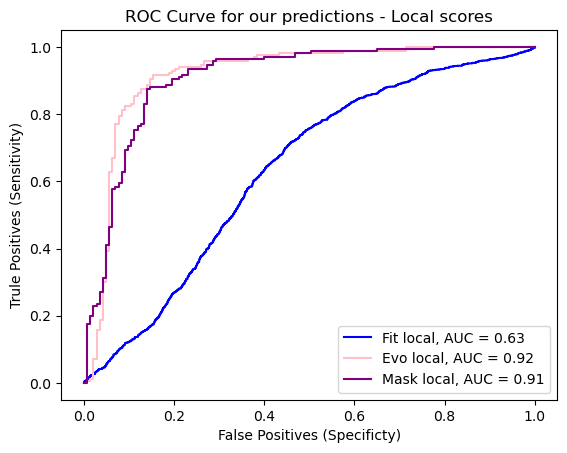

Text(0.5, 0, 'False Positives (Specificty)')

Text(0, 0.5, 'Trule Positives (Sensitivity)')

Text(0.5, 1.0, 'ROC Curve for our predictions - Cleaned scores')

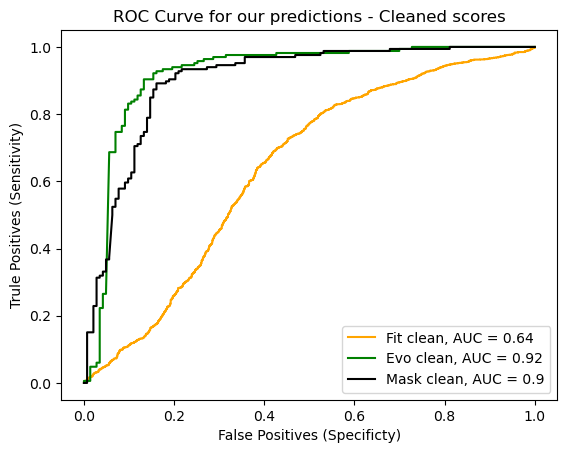

In [9]:
#Calculate F1 and ROC

pred_Fit_global = Fit_filtered['dif_global'].values
pred_Fit_local = Fit_filtered['dif_local'].values
pred_Fit_clean = Fit_filtered['dif_clean'].values
pred_Evo_global = Evo_filtered['dif_global'].values
pred_Evo_local = Evo_filtered['dif_local'].values
pred_Evo_clean = Evo_filtered['dif_clean'].values
pred_Mask_global = Mask_filtered['dif_global'].values
pred_Mask_local = Mask_filtered['dif_local'].values
pred_Mask_clean = Mask_filtered['dif_clean'].values

truelabels_Fit = Fit_filtered['labels_binary'].values
truelabels_Evo = Evo_filtered['labels_binary'].values
truelabels_Mask = Mask_filtered['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_Fit_global, tpr_Fit_global, thersholds_Fit_global = metrics.roc_curve(truelabels_Fit, pred_Fit_global)
fpr_Fit_local, tpr_Fit_local, thersholds_Fit_local = metrics.roc_curve(truelabels_Fit, pred_Fit_local)
fpr_Fit_clean, tpr_Fit_clean, thersholds_Fit_clean = metrics.roc_curve(truelabels_Fit, pred_Fit_clean)
fpr_Evo_global, tpr_Evo_global, thersholds_Evo_global = metrics.roc_curve(truelabels_Evo, pred_Evo_global)
fpr_Evo_local, tpr_Evo_local, thersholds_Evo_local = metrics.roc_curve(truelabels_Evo, pred_Evo_local)
fpr_Evo_clean, tpr_Evo_clean, thersholds_Evo_clean = metrics.roc_curve(truelabels_Evo, pred_Evo_clean)
fpr_Mask_global, tpr_Mask_global, thersholds_Mask_global = metrics.roc_curve(truelabels_Mask, pred_Mask_global)
fpr_Mask_local, tpr_Mask_local, thersholds_Mask_local = metrics.roc_curve(truelabels_Mask, pred_Mask_local)
fpr_Mask_clean, tpr_Mask_clean, thersholds_Mask_clean = metrics.roc_curve(truelabels_Mask, pred_Mask_clean)


roc_auc_Fit_global = round(metrics.auc(fpr_Fit_global, tpr_Fit_global), 2)
roc_auc_Fit_local = round(metrics.auc(fpr_Fit_local, tpr_Fit_local), 2)
roc_auc_Fit_clean = round(metrics.auc(fpr_Fit_clean, tpr_Fit_clean), 2)
roc_auc_Evo_global = round(metrics.auc(fpr_Evo_global, tpr_Evo_global), 2)
roc_auc_Evo_local = round(metrics.auc(fpr_Evo_local, tpr_Evo_local), 2)
roc_auc_Evo_clean = round(metrics.auc(fpr_Evo_clean, tpr_Evo_clean), 2)
roc_auc_Mask_global = round(metrics.auc(fpr_Mask_global, tpr_Mask_global), 2)
roc_auc_Mask_local = round(metrics.auc(fpr_Mask_local, tpr_Mask_local), 2)
roc_auc_Mask_clean = round(metrics.auc(fpr_Mask_clean, tpr_Mask_clean), 2)


#Calculating F1 score
tresh_Fit_global = thersholds_Fit_global[np.argmax(tpr_Fit_global - fpr_Fit_global)]
tresh_Fit_local = thersholds_Fit_local[np.argmax(tpr_Fit_local - fpr_Fit_local)]
tresh_Fit_clean = thersholds_Fit_clean[np.argmax(tpr_Fit_clean - fpr_Fit_clean)]
tresh_Evo_global = thersholds_Evo_global[np.argmax(tpr_Evo_global - fpr_Evo_global)]
tresh_Evo_local = thersholds_Evo_local[np.argmax(tpr_Evo_local - fpr_Evo_local)]
tresh_Evo_clean = thersholds_Evo_clean[np.argmax(tpr_Evo_clean - fpr_Evo_clean)]
tresh_Mask_global = thersholds_Mask_global[np.argmax(tpr_Mask_global - fpr_Mask_global)]
tresh_Mask_local = thersholds_Mask_local[np.argmax(tpr_Mask_local - fpr_Mask_local)]
tresh_Mask_clean = thersholds_Mask_clean[np.argmax(tpr_Mask_clean - fpr_Mask_clean)]

pred_Fit_global_bin = [1 if x >= tresh_Fit_global else 0 for x in pred_Fit_global]
pred_Fit_local_bin = [1 if x >= tresh_Fit_local else 0 for x in pred_Fit_local]
pred_Fit_clean_bin = [1 if x >= tresh_Fit_clean else 0 for x in pred_Fit_clean]
pred_Evo_global_bin = [1 if x >= tresh_Evo_global else 0 for x in pred_Evo_global]
pred_Evo_local_bin = [1 if x >= tresh_Evo_local else 0 for x in pred_Evo_local]
pred_Evo_clean_bin = [1 if x >= tresh_Evo_clean else 0 for x in pred_Evo_clean]
pred_Mask_global_bin = [1 if x >= tresh_Mask_global else 0 for x in pred_Mask_global]
pred_Mask_local_bin = [1 if x >= tresh_Mask_local else 0 for x in pred_Mask_local]
pred_Mask_clean_bin = [1 if x >= tresh_Mask_clean else 0 for x in pred_Mask_clean]

f1_Fit_global = f1_score(truelabels_Fit, pred_Fit_global_bin, average = 'binary')
f1_Fit_local = f1_score(truelabels_Fit, pred_Fit_local_bin, average = 'binary')
f1_Fit_clean = f1_score(truelabels_Fit, pred_Fit_clean_bin, average = 'binary')
f1_Evo_global = f1_score(truelabels_Evo, pred_Evo_global_bin, average = 'binary')
f1_Evo_local = f1_score(truelabels_Evo, pred_Evo_local_bin, average = 'binary')
f1_Evo_clean = f1_score(truelabels_Evo, pred_Evo_clean_bin, average = 'binary')
f1_Mask_global = f1_score(truelabels_Mask, pred_Mask_global_bin, average = 'binary')
f1_Mask_local = f1_score(truelabels_Mask, pred_Mask_local_bin, average = 'binary')
f1_Mask_clean = f1_score(truelabels_Mask, pred_Mask_clean_bin, average = 'binary')

'''
pred_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_ESM3_global = ESM3_filtered['dif_global'].values
pred_ESM3_local = ESM3_filtered['dif_local'].values
pred_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_ESM3 = ESM3_filtered['labels_binary'].values

fpr_ProstT5_global, tpr_ProstT5_global, thersholds_ProstT5_global = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_global)
fpr_ProstT5_local, tpr_ProstT5_local, thersholds_ProstT5_local = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_local)
fpr_ProstT5_clean, tpr_ProstT5_clean, thersholds_ProstT5_clean = metrics.roc_curve(truelabels_ProstT5, pred_ProstT5_clean)
fpr_ESM3_global, tpr_ESM3_global, thersholds_ESM3_global = metrics.roc_curve(truelabels_ESM3, pred_ESM3_global)
fpr_ESM3_local, tpr_ESM3_local, thersholds_ESM3_local = metrics.roc_curve(truelabels_ESM3, pred_ESM3_local)
fpr_ESM3_clean, tpr_ESM3_clean, thersholds_ESM3_clean = metrics.roc_curve(truelabels_ESM3, pred_ESM3_clean)

roc_auc_ProstT5_global = round(metrics.auc(fpr_ProstT5_global, tpr_ProstT5_global), 2)
roc_auc_ProstT5_local = round(metrics.auc(fpr_ProstT5_local, tpr_ProstT5_local), 2)
roc_auc_ProstT5_clean = round(metrics.auc(fpr_ProstT5_clean, tpr_ProstT5_clean), 2)
roc_auc_ESM3_global = round(metrics.auc(fpr_ESM3_global, tpr_ESM3_global), 2)
roc_auc_ESM3_local = round(metrics.auc(fpr_ESM3_local, tpr_ESM3_local), 2)
roc_auc_ESM3_clean = round(metrics.auc(fpr_ESM3_clean, tpr_ESM3_clean), 2)

tresh_ProstT5_global = thersholds_ProstT5_global[np.argmax(tpr_ProstT5_global - fpr_ProstT5_global)]
tresh_ProstT5_local = thersholds_ProstT5_local[np.argmax(tpr_ProstT5_local - fpr_ProstT5_local)]
tresh_ProstT5_clean = thersholds_ProstT5_clean[np.argmax(tpr_ProstT5_clean - fpr_ProstT5_clean)]
tresh_ESM3_global = thersholds_ESM3_global[np.argmax(tpr_ESM3_global - fpr_ESM3_global)]
tresh_ESM3_local = thersholds_ESM3_local[np.argmax(tpr_ESM3_local - fpr_ESM3_local)]
tresh_ESM3_clean = thersholds_ESM3_clean[np.argmax(tpr_ESM3_clean - fpr_ESM3_clean)]

pred_ProstT5_global_bin = [1 if x >= tresh_ProstT5_global else 0 for x in pred_ProstT5_global]
pred_ProstT5_local_bin = [1 if x >= tresh_ProstT5_local else 0 for x in pred_ProstT5_local]
pred_ProstT5_clean_bin = [1 if x >= tresh_ProstT5_clean else 0 for x in pred_ProstT5_clean]
pred_ESM3_global_bin = [1 if x >= tresh_ESM3_global else 0 for x in pred_ESM3_global]
pred_ESM3_local_bin = [1 if x >= tresh_ESM3_local else 0 for x in pred_ESM3_local]
pred_ESM3_clean_bin = [1 if x >= tresh_ESM3_clean else 0 for x in pred_ESM3_clean]

f1_ProstT5_global = f1_score(truelabels_ProstT5, pred_ProstT5_global_bin, average = 'binary')
f1_ProstT5_local = f1_score(truelabels_ProstT5, pred_ProstT5_local_bin, average = 'binary')
f1_ProstT5_clean = f1_score(truelabels_ProstT5, pred_ProstT5_clean_bin, average = 'binary')
f1_ESM3_global = f1_score(truelabels_ESM3, pred_ESM3_global_bin, average = 'binary')
f1_ESM3_local = f1_score(truelabels_ESM3, pred_ESM3_local_bin, average = 'binary')
f1_ESM3_clean = f1_score(truelabels_ESM3, pred_ESM3_clean_bin, average = 'binary')
'''

#Plotting AUC 
plt.plot(fpr_Fit_global, tpr_Fit_global, label = "Fit global, AUC = "+str(roc_auc_Fit_global), color = "grey")
plt.plot(fpr_Evo_global, tpr_Evo_global, label = "Evo global, AUC = "+str(roc_auc_Evo_global), color = "brown")
plt.plot(fpr_Mask_global, tpr_Mask_global, label = "Mask global, AUC = "+str(roc_auc_Mask_global), color = "magenta")
#plt.plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "ProstT5 global, AUC = "+str(roc_auc_ProstT5_global), color = "blue")
#plt.plot(fpr_ESM3_global, tpr_ESM3_global, label = "ESM3 global, AUC = "+str(roc_auc_ESM3_global), color = "green")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions - Global scores")
plt.legend(loc = 'best')
plt.show()

plt.plot(fpr_Fit_local, tpr_Fit_local, label = "Fit local, AUC = "+str(roc_auc_Fit_local), color = "blue")
plt.plot(fpr_Evo_local, tpr_Evo_local, label = "Evo local, AUC = "+str(roc_auc_Evo_local), color = "pink")
plt.plot(fpr_Mask_local, tpr_Mask_local, label = "Mask local, AUC = "+str(roc_auc_Mask_local), color = "purple")
#plt.plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "ProstT5 local, AUC = "+str(roc_auc_ProstT5_local), color = "blue")
#plt.plot(fpr_ESM3_local, tpr_ESM3_local, label = "ESM3 local, AUC = "+str(roc_auc_ESM3_local), color = "green")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions - Local scores")
plt.legend(loc = 'best')
plt.show()

plt.plot(fpr_Fit_clean, tpr_Fit_clean, label = "Fit clean, AUC = "+str(roc_auc_Fit_clean), color = "orange")
plt.plot(fpr_Evo_clean, tpr_Evo_clean, label = "Evo clean, AUC = "+str(roc_auc_Evo_clean), color = "green")
plt.plot(fpr_Mask_clean, tpr_Mask_clean, label = "Mask clean, AUC = "+str(roc_auc_Mask_clean), color = "black")
#plt.plot(fpr_ProstT5_clean, tpr_ProstT5_clean, label = "ProstT5 clean, AUC = "+str(roc_auc_ProstT5_clean), color = "blue")
#plt.plot(fpr_ESM3_clean, tpr_ESM3_clean, label = "ESM3 clean, AUC = "+str(roc_auc_ESM3_clean), color = "green")
plt.xlabel('False Positives (Specificty)')
plt.ylabel('Trule Positives (Sensitivity)')
plt.title("ROC Curve for our predictions - Cleaned scores")
plt.legend(loc = 'best')
plt.show()




Text(0.5, 1.0, 'Fit global')

Text(0.5, 1.0, 'Fit local')

Text(0.5, 1.0, 'Fit clean')

Text(0.5, 1.0, 'Evo global')

Text(0.5, 1.0, 'Evo local')

Text(0.5, 1.0, 'Evo clean')

Text(0.5, 1.0, 'Mask global')

Text(0.5, 1.0, 'Mask local')

Text(0.5, 1.0, 'Mask clean')

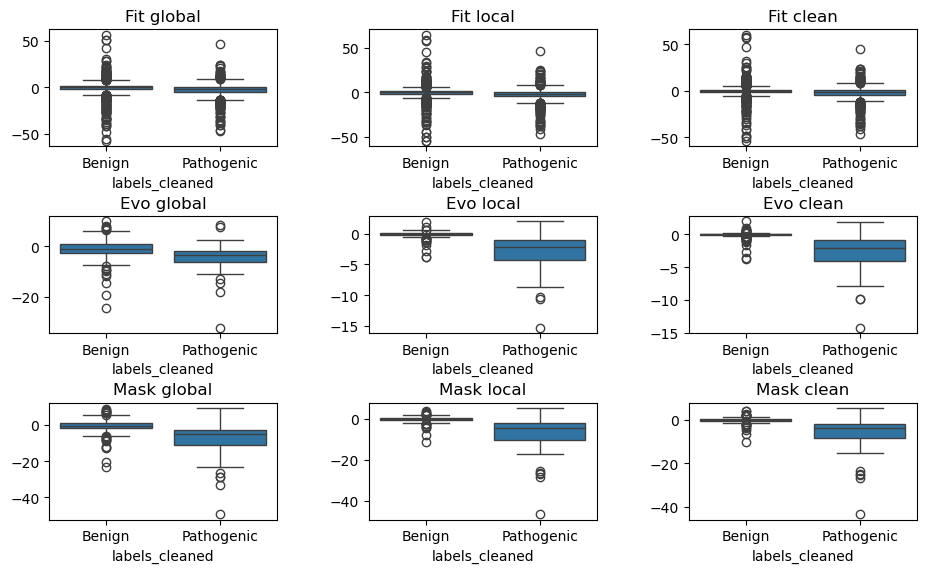

In [10]:
#Boxplots of our methods
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=2.9)
sns.boxplot(x = Fit_filtered['labels_cleaned'], y = pred_Fit_global, ax=axes[0,0]).set_title('Fit global')
sns.boxplot(x = Fit_filtered['labels_cleaned'], y = pred_Fit_local, ax=axes[0,1]).set_title('Fit local')
sns.boxplot(x = Fit_filtered['labels_cleaned'], y = pred_Fit_clean, ax=axes[0,2]).set_title('Fit clean')
sns.boxplot(x = Evo_filtered['labels_cleaned'], y = pred_Evo_global, ax=axes[1,0]).set_title('Evo global')
sns.boxplot(x = Evo_filtered['labels_cleaned'], y = pred_Evo_local, ax=axes[1,1]).set_title('Evo local')
sns.boxplot(x = Evo_filtered['labels_cleaned'], y = pred_Evo_clean, ax=axes[1,2]).set_title('Evo clean')
sns.boxplot(x = Mask_filtered['labels_cleaned'], y = pred_Mask_global, ax=axes[2,0]).set_title('Mask global')
sns.boxplot(x = Mask_filtered['labels_cleaned'], y = pred_Mask_local, ax=axes[2,1]).set_title('Mask local')
sns.boxplot(x = Mask_filtered['labels_cleaned'], y = pred_Mask_clean, ax=axes[2,2]).set_title('Mask clean')
#sns.boxplot(x = ProstT5_filtered['labels_cleaned'], y = pred_ProstT5_global, ax=axes[3,0]).set_title('ProstT5 global')
#sns.boxplot(x = ProstT5_filtered['labels_cleaned'], y = pred_ProstT5_local, ax=axes[3,1]).set_title('ProstT5 local')
#sns.boxplot(x = ProstT5_filtered['labels_cleaned'], y = pred_ProstT5_clean, ax=axes[3,2]).set_title('ProstT5 clean')
#sns.boxplot(x = ESM3_filtered['labels_cleaned'], y = pred_ESM3_global, ax=axes[4,0]).set_title('ESM3 global')
#sns.boxplot(x = ESM3_filtered['labels_cleaned'], y = pred_ESM3_local, ax=axes[4,1]).set_title('ESM3 local')
#sns.boxplot(x = ESM3_filtered['labels_cleaned'], y = pred_ESM3_clean, ax=axes[4,2]).set_title('ESM3 clean')
plt.show()

In [11]:
#Filter dataset by origin
alldata_filtered['Origin'].unique()

alldata_filtered_ClinVar = alldata_filtered[alldata_filtered['Origin'] == 'ClinVar']
alldata_filtered_DDD = alldata_filtered[alldata_filtered['Origin'] == 'DDD']

len(alldata_filtered_ClinVar)
len(alldata_filtered_DDD)

array(['ClinVar', 'gnomAD', 'DDD'], dtype=object)

2577

254

In [12]:
#Calculate F1 and ROC for ClinVar
pred_ClinVar_CADD = alldata_filtered_ClinVar['CADD'].values
pred_ClinVar_CAPICE = alldata_filtered_ClinVar['CAPICE'].values
alldata_filtered_ClinVar['FATHMM-indel'] = pd.to_numeric(alldata_filtered_ClinVar['FATHMM-indel'], errors='coerce')
pred_ClinVar_FATHMM = alldata_filtered_ClinVar['FATHMM-indel'].values
pred_ClinVar_MutPred = alldata_filtered_ClinVar['MutPredIndel'].values
alldata_filtered_ClinVar['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_ClinVar['MutationTaster2021']]
pred_ClinVar_MutT = alldata_filtered_ClinVar['MutationTaster2021_bin'].values
pred_ClinVar_PROVEAN = alldata_filtered_ClinVar['PROVEAN'].values
alldata_filtered_ClinVar['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_ClinVar['SIFT-indel']]
pred_ClinVar_SIFT = alldata_filtered_ClinVar['SIFT_bin'].values
pred_ClinVar_VEST = alldata_filtered_ClinVar['VEST-indel'].values
pred_ClinVar_VVP = alldata_filtered_ClinVar['VVP'].values

truelabels_ClinVar_CADD = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_CAPICE = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_FATHMM = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_MutPred = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_MutT = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_PROVEAN = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_SIFT = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_VEST = alldata_filtered_ClinVar['labels_binary'].values
truelabels_ClinVar_VVP = alldata_filtered_ClinVar['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_ClinVar_CADD = 1 - truelabels_ClinVar_CADD
truelabels_ClinVar_CAPICE = 1 - truelabels_ClinVar_CAPICE
truelabels_ClinVar_FATHMM = 1 - truelabels_ClinVar_FATHMM
truelabels_ClinVar_MutPred = 1 - truelabels_ClinVar_MutPred
truelabels_ClinVar_VEST = 1 - truelabels_ClinVar_VEST
truelabels_ClinVar_VVP = 1 - truelabels_ClinVar_VVP

#Calculating FP, TN and thresholds
fpr_ClinVar_CADD, tpr_ClinVar_CADD, thresholds_ClinVar_CADD = metrics.roc_curve(truelabels_ClinVar_CADD, pred_ClinVar_CADD)
fpr_ClinVar_CAPICE, tpr_ClinVar_CAPICE, thresholds_ClinVar_CAPICE = metrics.roc_curve(truelabels_ClinVar_CAPICE, pred_ClinVar_CAPICE)
fpr_ClinVar_FATHMM, tpr_ClinVar_FATHMM, thresholds_ClinVar_FATHMM = metrics.roc_curve(truelabels_ClinVar_FATHMM, pred_ClinVar_FATHMM)
fpr_ClinVar_MutPred, tpr_ClinVar_MutPred, thresholds_ClinVar_MutPred = metrics.roc_curve(truelabels_ClinVar_MutPred, pred_ClinVar_MutPred)
fpr_ClinVar_MutT, tpr_ClinVar_MutT, thresholds_ClinVar_MutT = metrics.roc_curve(truelabels_ClinVar_MutT, pred_ClinVar_MutT)
fpr_ClinVar_PROVEAN, tpr_ClinVar_PROVEAN, thresholds_ClinVar_PROVEAN = metrics.roc_curve(truelabels_ClinVar_PROVEAN, pred_ClinVar_PROVEAN)
fpr_ClinVar_SIFT, tpr_ClinVar_SIFT, thresholds_ClinVar_SIFT = metrics.roc_curve(truelabels_ClinVar_SIFT, pred_ClinVar_SIFT)
fpr_ClinVar_VEST, tpr_ClinVar_VEST, thresholds_ClinVar_VEST = metrics.roc_curve(truelabels_ClinVar_VEST, pred_ClinVar_VEST)
fpr_ClinVar_VVP, tpr_ClinVar_VVP, thresholds_ClinVar_VVP = metrics.roc_curve(truelabels_ClinVar_VVP, pred_ClinVar_VVP)

roc_auc_ClinVar_CADD = round(metrics.auc(fpr_ClinVar_CADD, tpr_ClinVar_CADD), 2)
roc_auc_ClinVar_CAPICE = round(metrics.auc(fpr_ClinVar_CAPICE, tpr_ClinVar_CAPICE), 2)
roc_auc_ClinVar_FATHMM = round(metrics.auc(fpr_ClinVar_FATHMM, tpr_ClinVar_FATHMM), 2)
roc_auc_ClinVar_MutPred = round(metrics.auc(fpr_ClinVar_MutPred, tpr_ClinVar_MutPred), 2)
roc_auc_ClinVar_MutT = round(metrics.auc(fpr_ClinVar_MutT, tpr_ClinVar_MutT), 2)
roc_auc_ClinVar_PROVEAN = round(metrics.auc(fpr_ClinVar_PROVEAN, tpr_ClinVar_PROVEAN), 2)
roc_auc_ClinVar_SIFT = round(metrics.auc(fpr_ClinVar_SIFT, tpr_ClinVar_SIFT), 2)
roc_auc_ClinVar_VEST = round(metrics.auc(fpr_ClinVar_VEST, tpr_ClinVar_VEST), 2)
roc_auc_ClinVar_VVP = round(metrics.auc(fpr_ClinVar_VVP, tpr_ClinVar_VVP), 2)

#Calculating F1 score
tresh_ClinVar_CADD = thresholds_ClinVar_CADD[np.argmax(tpr_ClinVar_CADD - fpr_ClinVar_CADD)]
tresh_ClinVar_CAPICE = thresholds_ClinVar_CAPICE[np.argmax(tpr_ClinVar_CAPICE - fpr_ClinVar_CAPICE)]
tresh_ClinVar_FATHMM = thresholds_ClinVar_FATHMM[np.argmax(tpr_ClinVar_FATHMM - fpr_ClinVar_FATHMM)]
tresh_ClinVar_MutPred = thresholds_ClinVar_MutPred[np.argmax(tpr_ClinVar_MutPred - fpr_ClinVar_MutPred)]
tresh_ClinVar_MutT = thresholds_ClinVar_MutT[np.argmax(tpr_ClinVar_MutT - fpr_ClinVar_MutT)]
tresh_ClinVar_PROVEAN = thresholds_ClinVar_PROVEAN[np.argmax(tpr_ClinVar_PROVEAN - fpr_ClinVar_PROVEAN)]
tresh_ClinVar_SIFT = thresholds_ClinVar_SIFT[np.argmax(tpr_ClinVar_SIFT - fpr_ClinVar_SIFT)]
tresh_ClinVar_VEST = thresholds_ClinVar_VEST[np.argmax(tpr_ClinVar_VEST - fpr_ClinVar_VEST)]
tresh_ClinVar_VVP = thresholds_ClinVar_VVP[np.argmax(tpr_ClinVar_VVP - fpr_ClinVar_VVP)]

pred_ClinVar_CADD_bin = [1 if x >= tresh_ClinVar_CADD else 0 for x in pred_ClinVar_CADD]
pred_ClinVar_CAPICE_bin = [1 if x >= tresh_ClinVar_CAPICE else 0 for x in pred_ClinVar_CAPICE]
pred_ClinVar_FATHMM_bin = [1 if x >= tresh_ClinVar_FATHMM else 0 for x in pred_ClinVar_FATHMM]
pred_ClinVar_MutPred_bin = [1 if x >= tresh_ClinVar_MutPred else 0 for x in pred_ClinVar_MutPred]
pred_ClinVar_MutT_bin = [1 if x >= tresh_ClinVar_MutT else 0 for x in pred_ClinVar_MutT]
pred_ClinVar_PROVEAN_bin = [1 if x >= tresh_ClinVar_PROVEAN else 0 for x in pred_ClinVar_PROVEAN]
pred_ClinVar_SIFT_bin = [1 if x >= tresh_ClinVar_SIFT else 0 for x in pred_ClinVar_SIFT]
pred_ClinVar_VEST_bin = [1 if x >= tresh_ClinVar_VEST else 0 for x in pred_ClinVar_VEST]
pred_ClinVar_VVP_bin = [1 if x >= tresh_ClinVar_VVP else 0 for x in pred_ClinVar_VVP]

f1_ClinVar_CADD = f1_score(truelabels_ClinVar_CADD, pred_ClinVar_CADD_bin, average = 'binary')
f1_ClinVar_CAPICE = f1_score(truelabels_ClinVar_CAPICE, pred_ClinVar_CAPICE_bin, average = 'binary')
f1_ClinVar_FATHMM = f1_score(truelabels_ClinVar_FATHMM, pred_ClinVar_FATHMM_bin, average = 'binary')
f1_ClinVar_MutPred = f1_score(truelabels_ClinVar_MutPred, pred_ClinVar_MutPred_bin, average = 'binary')
f1_ClinVar_MutT = f1_score(truelabels_ClinVar_MutT, pred_ClinVar_MutT_bin, average = 'binary')
f1_ClinVar_PROVEAN = f1_score(truelabels_ClinVar_PROVEAN, pred_ClinVar_PROVEAN_bin, average = 'binary')
f1_ClinVar_SIFT = f1_score(truelabels_ClinVar_SIFT, pred_ClinVar_SIFT_bin, average = 'binary')
f1_ClinVar_VEST = f1_score(truelabels_ClinVar_VEST, pred_ClinVar_VEST_bin, average = 'binary')
f1_ClinVar_VVP = f1_score(truelabels_ClinVar_VVP, pred_ClinVar_VVP_bin, average = 'binary')


/tmp/ipykernel_3043747/4189972691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_ClinVar['FATHMM-indel'] = pd.to_numeric(alldata_filtered_ClinVar['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/4189972691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_ClinVar['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_ClinVar['MutationTaster2021']]
/tmp/ipykernel_3043747/4189972691.py:10: SettingWithCopyWarning: 
A value is trying to

In [13]:
#Calculate F1 and ROC for DDD
pred_DDD_CADD = alldata_filtered_DDD['CADD'].values
pred_DDD_CAPICE = alldata_filtered_DDD['CAPICE'].values
alldata_filtered_DDD['FATHMM-indel'] = pd.to_numeric(alldata_filtered_DDD['FATHMM-indel'], errors='coerce')
pred_DDD_FATHMM = alldata_filtered_DDD['FATHMM-indel'].values
pred_DDD_MutPred = alldata_filtered_DDD['MutPredIndel'].values
alldata_filtered_DDD['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_DDD['MutationTaster2021']]
pred_DDD_MutT = alldata_filtered_DDD['MutationTaster2021_bin'].values
pred_DDD_PROVEAN = alldata_filtered_DDD['PROVEAN'].values
alldata_filtered_DDD['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_DDD['SIFT-indel']]
pred_DDD_SIFT = alldata_filtered_DDD['SIFT_bin'].values
pred_DDD_VEST = alldata_filtered_DDD['VEST-indel'].values
pred_DDD_VVP = alldata_filtered_DDD['VVP'].values

truelabels_DDD_CADD = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_CAPICE = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_FATHMM = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_MutPred = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_MutT = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_PROVEAN = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_SIFT = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_VEST = alldata_filtered_DDD['labels_binary'].values
truelabels_DDD_VVP = alldata_filtered_DDD['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_DDD_CADD = 1 - truelabels_DDD_CADD
truelabels_DDD_CAPICE = 1 - truelabels_DDD_CAPICE
truelabels_DDD_FATHMM = 1 - truelabels_DDD_FATHMM
truelabels_DDD_MutPred = 1 - truelabels_DDD_MutPred
truelabels_DDD_VEST = 1 - truelabels_DDD_VEST
truelabels_DDD_VVP = 1 - truelabels_DDD_VVP

#Calculating FP, TN and thresholds
fpr_DDD_CADD, tpr_DDD_CADD, thresholds_DDD_CADD = metrics.roc_curve(truelabels_DDD_CADD, pred_DDD_CADD)
fpr_DDD_CAPICE, tpr_DDD_CAPICE, thresholds_DDD_CAPICE = metrics.roc_curve(truelabels_DDD_CAPICE, pred_DDD_CAPICE)
fpr_DDD_FATHMM, tpr_DDD_FATHMM, thresholds_DDD_FATHMM = metrics.roc_curve(truelabels_DDD_FATHMM, pred_DDD_FATHMM)
fpr_DDD_MutPred, tpr_DDD_MutPred, thresholds_DDD_MutPred = metrics.roc_curve(truelabels_DDD_MutPred, pred_DDD_MutPred)
fpr_DDD_MutT, tpr_DDD_MutT, thresholds_DDD_MutT = metrics.roc_curve(truelabels_DDD_MutT, pred_DDD_MutT)
fpr_DDD_PROVEAN, tpr_DDD_PROVEAN, thresholds_DDD_PROVEAN = metrics.roc_curve(truelabels_DDD_PROVEAN, pred_DDD_PROVEAN)
fpr_DDD_SIFT, tpr_DDD_SIFT, thresholds_DDD_SIFT = metrics.roc_curve(truelabels_DDD_SIFT, pred_DDD_SIFT)
fpr_DDD_VEST, tpr_DDD_VEST, thresholds_DDD_VEST = metrics.roc_curve(truelabels_DDD_VEST, pred_DDD_VEST)
fpr_DDD_VVP, tpr_DDD_VVP, thresholds_DDD_VVP = metrics.roc_curve(truelabels_DDD_VVP, pred_DDD_VVP)

roc_auc_DDD_CADD = round(metrics.auc(fpr_DDD_CADD, tpr_DDD_CADD), 2)
roc_auc_DDD_CAPICE = round(metrics.auc(fpr_DDD_CAPICE, tpr_DDD_CAPICE), 2)
roc_auc_DDD_FATHMM = round(metrics.auc(fpr_DDD_FATHMM, tpr_DDD_FATHMM), 2)
roc_auc_DDD_MutPred = round(metrics.auc(fpr_DDD_MutPred, tpr_DDD_MutPred), 2)
roc_auc_DDD_MutT = round(metrics.auc(fpr_DDD_MutT, tpr_DDD_MutT), 2)
roc_auc_DDD_PROVEAN = round(metrics.auc(fpr_DDD_PROVEAN, tpr_DDD_PROVEAN), 2)
roc_auc_DDD_SIFT = round(metrics.auc(fpr_DDD_SIFT, tpr_DDD_SIFT), 2)
roc_auc_DDD_VEST = round(metrics.auc(fpr_DDD_VEST, tpr_DDD_VEST), 2)
roc_auc_DDD_VVP = round(metrics.auc(fpr_DDD_VVP, tpr_DDD_VVP), 2)

#Calculating F1 score
tresh_DDD_CADD = thresholds_DDD_CADD[np.argmax(tpr_DDD_CADD - fpr_DDD_CADD)]
tresh_DDD_CAPICE = thresholds_DDD_CAPICE[np.argmax(tpr_DDD_CAPICE - fpr_DDD_CAPICE)]
tresh_DDD_FATHMM = thresholds_DDD_FATHMM[np.argmax(tpr_DDD_FATHMM - fpr_DDD_FATHMM)]
tresh_DDD_MutPred = thresholds_DDD_MutPred[np.argmax(tpr_DDD_MutPred - fpr_DDD_MutPred)]
tresh_DDD_MutT = thresholds_DDD_MutT[np.argmax(tpr_DDD_MutT - fpr_DDD_MutT)]
tresh_DDD_PROVEAN = thresholds_DDD_PROVEAN[np.argmax(tpr_DDD_PROVEAN - fpr_DDD_PROVEAN)]
tresh_DDD_SIFT = thresholds_DDD_SIFT[np.argmax(tpr_DDD_SIFT - fpr_DDD_SIFT)]
tresh_DDD_VEST = thresholds_DDD_VEST[np.argmax(tpr_DDD_VEST - fpr_DDD_VEST)]
tresh_DDD_VVP = thresholds_DDD_VVP[np.argmax(tpr_DDD_VVP - fpr_DDD_VVP)]

pred_DDD_CADD_bin = [1 if x >= tresh_DDD_CADD else 0 for x in pred_DDD_CADD]
pred_DDD_CAPICE_bin = [1 if x >= tresh_DDD_CAPICE else 0 for x in pred_DDD_CAPICE]
pred_DDD_FATHMM_bin = [1 if x >= tresh_DDD_FATHMM else 0 for x in pred_DDD_FATHMM]
pred_DDD_MutPred_bin = [1 if x >= tresh_DDD_MutPred else 0 for x in pred_DDD_MutPred]
pred_DDD_MutT_bin = [1 if x >= tresh_DDD_MutT else 0 for x in pred_DDD_MutT]
pred_DDD_PROVEAN_bin = [1 if x >= tresh_DDD_PROVEAN else 0 for x in pred_DDD_PROVEAN]
pred_DDD_SIFT_bin = [1 if x >= tresh_DDD_SIFT else 0 for x in pred_DDD_SIFT]
pred_DDD_VEST_bin = [1 if x >= tresh_DDD_VEST else 0 for x in pred_DDD_VEST]
pred_DDD_VVP_bin = [1 if x >= tresh_DDD_VVP else 0 for x in pred_DDD_VVP]

f1_DDD_CADD = f1_score(truelabels_DDD_CADD, pred_DDD_CADD_bin, average = 'binary')
f1_DDD_CAPICE = f1_score(truelabels_DDD_CAPICE, pred_DDD_CAPICE_bin, average = 'binary')
f1_DDD_FATHMM = f1_score(truelabels_DDD_FATHMM, pred_DDD_FATHMM_bin, average = 'binary')
f1_DDD_MutPred = f1_score(truelabels_DDD_MutPred, pred_DDD_MutPred_bin, average = 'binary')
f1_DDD_MutT = f1_score(truelabels_DDD_MutT, pred_DDD_MutT_bin, average = 'binary')
f1_DDD_PROVEAN = f1_score(truelabels_DDD_PROVEAN, pred_DDD_PROVEAN_bin, average = 'binary')
f1_DDD_SIFT = f1_score(truelabels_DDD_SIFT, pred_DDD_SIFT_bin, average = 'binary')
f1_DDD_VEST = f1_score(truelabels_DDD_VEST, pred_DDD_VEST_bin, average = 'binary')
f1_DDD_VVP = f1_score(truelabels_DDD_VVP, pred_DDD_VVP_bin, average = 'binary')

/tmp/ipykernel_3043747/1642952312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_DDD['FATHMM-indel'] = pd.to_numeric(alldata_filtered_DDD['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/1642952312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_DDD['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_DDD['MutationTaster2021']]
/tmp/ipykernel_3043747/1642952312.py:10: SettingWithCopyWarning: 
A value is trying to be set on a cop

Text(0.5, 1.0, 'CADD')

Text(0.5, 1.0, 'CAPICE')

Text(0.5, 1.0, 'FATHMM')

Text(0.5, 1.0, 'MutPred')

Text(0.5, 1.0, 'MutTaster2021')

Text(0.5, 1.0, 'PROVEAN')

Text(0.5, 1.0, 'SIFT')

Text(0.5, 1.0, 'VEST')

Text(0.5, 1.0, 'VVP')

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

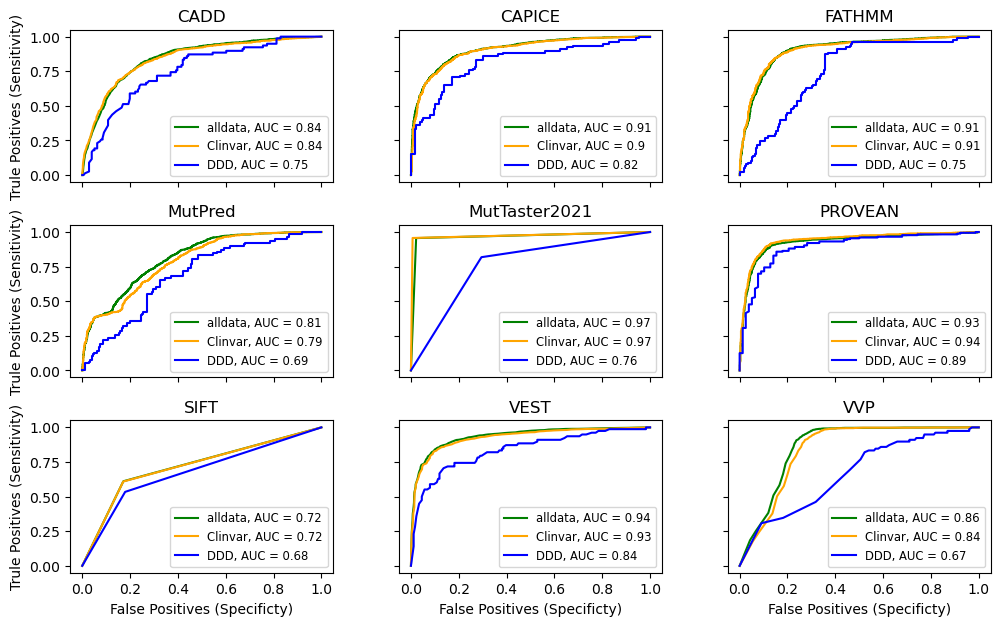

In [14]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_CADD, tpr_CADD, label = "alldata, AUC = "+str(roc_auc_CADD), color = "green")
axes[0,0].plot(fpr_ClinVar_CADD, tpr_ClinVar_CADD, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_CADD), color = "orange")
axes[0,0].plot(fpr_DDD_CADD, tpr_DDD_CADD, label = "DDD, AUC = "+str(roc_auc_DDD_CADD), color = "blue")
axes[0,0].set_title('CADD')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_CAPICE, tpr_CAPICE, label = "alldata, AUC = "+str(roc_auc_CAPICE), color = "green")
axes[0,1].plot(fpr_ClinVar_CAPICE, tpr_ClinVar_CAPICE, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_CAPICE), color = "orange")
axes[0,1].plot(fpr_DDD_CAPICE, tpr_DDD_CAPICE, label = "DDD, AUC = "+str(roc_auc_DDD_CAPICE), color = "blue")
axes[0,1].set_title('CAPICE')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_FATHMM, tpr_FATHMM, label = "alldata, AUC = "+str(roc_auc_FATHMM), color = "green")
axes[0,2].plot(fpr_ClinVar_FATHMM, tpr_ClinVar_FATHMM, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_FATHMM), color = "orange")
axes[0,2].plot(fpr_DDD_FATHMM, tpr_DDD_FATHMM, label = "DDD, AUC = "+str(roc_auc_DDD_FATHMM), color = "blue")
axes[0,2].set_title('FATHMM')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_MutPred, tpr_MutPred, label = "alldata, AUC = "+str(roc_auc_MutPred), color = "green")
axes[1,0].plot(fpr_ClinVar_MutPred, tpr_ClinVar_MutPred, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_MutPred), color = "orange")
axes[1,0].plot(fpr_DDD_MutPred, tpr_DDD_MutPred, label = "DDD, AUC = "+str(roc_auc_DDD_MutPred), color = "blue")
axes[1,0].set_title('MutPred')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_MutT, tpr_MutT, label = "alldata, AUC = "+str(roc_auc_MutT), color = "green")
axes[1,1].plot(fpr_ClinVar_MutT, tpr_ClinVar_MutT, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_MutT), color = "orange")
axes[1,1].plot(fpr_DDD_MutT, tpr_DDD_MutT, label = "DDD, AUC = "+str(roc_auc_DDD_MutT), color = "blue")
axes[1,1].set_title('MutTaster2021')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_PROVEAN, tpr_PROVEAN, label = "alldata, AUC = "+str(roc_auc_PROVEAN), color = "green")
axes[1,2].plot(fpr_ClinVar_PROVEAN, tpr_ClinVar_PROVEAN, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_PROVEAN), color = "orange")
axes[1,2].plot(fpr_DDD_PROVEAN, tpr_DDD_PROVEAN, label = "DDD, AUC = "+str(roc_auc_DDD_PROVEAN), color = "blue")
axes[1,2].set_title('PROVEAN')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_SIFT, tpr_SIFT, label = "alldata, AUC = "+str(roc_auc_SIFT), color = "green")
axes[2,0].plot(fpr_ClinVar_SIFT, tpr_ClinVar_SIFT, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_SIFT), color = "orange")
axes[2,0].plot(fpr_DDD_SIFT, tpr_DDD_SIFT, label = "DDD, AUC = "+str(roc_auc_DDD_SIFT), color = "blue")
axes[2,0].set_title('SIFT')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_VEST, tpr_VEST, label = "alldata, AUC = "+str(roc_auc_VEST), color = "green")
axes[2,1].plot(fpr_ClinVar_VEST, tpr_ClinVar_VEST, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_VEST), color = "orange")
axes[2,1].plot(fpr_DDD_VEST, tpr_DDD_VEST, label = "DDD, AUC = "+str(roc_auc_DDD_VEST), color = "blue")
axes[2,1].set_title('VEST')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_VVP, tpr_VVP, label = "alldata, AUC = "+str(roc_auc_VVP), color = "green")
axes[2,2].plot(fpr_ClinVar_VVP, tpr_ClinVar_VVP, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_VVP), color = "orange")
axes[2,2].plot(fpr_DDD_VVP, tpr_DDD_VVP, label = "DDD, AUC = "+str(roc_auc_DDD_VVP), color = "blue")
axes[2,2].set_title('VVP')
axes[2,2].legend(fontsize='small')

for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

In [15]:
#Filter our dataset in the same way 
Fit_ClinVar = newscoreFit[newscoreFit['id'].isin(alldata_filtered_ClinVar['Id_matching'])]
Evo_ClinVar = newscoreEvo[newscoreEvo['id'].isin(alldata_filtered_ClinVar['Id_matching'])]
Mask_ClinVar = newscoreMask[newscoreMask['id'].isin(alldata_filtered_ClinVar['Id_matching'])]
#ProstT5_ClinVar = newscoreProstT5[newscoreProstT5['id'].isin(alldata_filtered_ClinVar['Id_matching'])]
#ESM3_ClinVar = newscoreESM3[newscoreESM3['id'].isin(alldata_filtered_ClinVar['Id_matching'])]
len(Fit_ClinVar) == len(alldata_filtered_ClinVar)
len(Evo_ClinVar) == len(alldata_filtered_ClinVar)
len(Mask_ClinVar) == len(alldata_filtered_ClinVar)
#len(ProstT5_ClinVar) == len(alldata_filtered_ClinVar)
#len(ESM3_ClinVar) == len(alldata_filtered_ClinVar)

Fit_DDD = newscoreFit[newscoreFit['id'].isin(alldata_filtered_DDD['Id_matching'])]
Evo_DDD = newscoreEvo[newscoreEvo['id'].isin(alldata_filtered_DDD['Id_matching'])]
Mask_DDD = newscoreMask[newscoreMask['id'].isin(alldata_filtered_DDD['Id_matching'])]
#ProstT5_DDD = newscoreProstT5[newscoreProstT5['id'].isin(alldata_filtered_DDD['Id_matching'])]
#ESM3_DDD = newscoreESM3[newscoreESM3['id'].isin(alldata_filtered_DDD['Id_matching'])]
len(Fit_DDD) == len(alldata_filtered_DDD)
len(Evo_DDD) == len(alldata_filtered_DDD)
len(Mask_DDD) == len(alldata_filtered_DDD)
#len(ProstT5_DDD) == len(alldata_filtered_DDD)
#len(ESM3_DDD) == len(alldata_filtered_DDD)


True

False

False

True

False

False

In [16]:
pred_ClinVar_Fit_global = Fit_ClinVar['dif_global'].values
pred_ClinVar_Fit_local = Fit_ClinVar['dif_local'].values
pred_ClinVar_Fit_clean = Fit_ClinVar['dif_clean'].values
pred_ClinVar_Evo_global = Evo_ClinVar['dif_global'].values
pred_ClinVar_Evo_local = Evo_ClinVar['dif_local'].values
pred_ClinVar_Evo_clean = Evo_ClinVar['dif_clean'].values
pred_ClinVar_Mask_global = Mask_ClinVar['dif_global'].values
pred_ClinVar_Mask_local = Mask_ClinVar['dif_local'].values
pred_ClinVar_Mask_clean = Mask_ClinVar['dif_clean'].values

truelabels_ClinVar_Fit = Fit_ClinVar['labels_binary'].values
truelabels_ClinVar_Evo = Evo_ClinVar['labels_binary'].values
truelabels_ClinVar_Mask = Mask_ClinVar['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_ClinVar_Fit_global, tpr_ClinVar_Fit_global, thresholds_ClinVar_Fit_global = metrics.roc_curve(truelabels_ClinVar_Fit, pred_ClinVar_Fit_global)
fpr_ClinVar_Fit_local, tpr_ClinVar_Fit_local, thresholds_ClinVar_Fit_local = metrics.roc_curve(truelabels_ClinVar_Fit, pred_ClinVar_Fit_local)
fpr_ClinVar_Fit_clean, tpr_ClinVar_Fit_clean, thresholds_ClinVar_Fit_clean = metrics.roc_curve(truelabels_ClinVar_Fit, pred_ClinVar_Fit_clean)
fpr_ClinVar_Evo_global, tpr_ClinVar_Evo_global, thresholds_ClinVar_Evo_global = metrics.roc_curve(truelabels_ClinVar_Evo, pred_ClinVar_Evo_global)
fpr_ClinVar_Evo_local, tpr_ClinVar_Evo_local, thresholds_ClinVar_Evo_local = metrics.roc_curve(truelabels_ClinVar_Evo, pred_ClinVar_Evo_local)
fpr_ClinVar_Evo_clean, tpr_ClinVar_Evo_clean, thresholds_ClinVar_Evo_clean = metrics.roc_curve(truelabels_ClinVar_Evo, pred_ClinVar_Evo_clean)
fpr_ClinVar_Mask_global, tpr_ClinVar_Mask_global, thresholds_ClinVar_Mask_global = metrics.roc_curve(truelabels_ClinVar_Mask, pred_ClinVar_Mask_global)
fpr_ClinVar_Mask_local, tpr_ClinVar_Mask_local, thresholds_ClinVar_Mask_local = metrics.roc_curve(truelabels_ClinVar_Mask, pred_ClinVar_Mask_local)
fpr_ClinVar_Mask_clean, tpr_ClinVar_Mask_clean, thresholds_ClinVar_Mask_clean = metrics.roc_curve(truelabels_ClinVar_Mask, pred_ClinVar_Mask_clean)

roc_auc_ClinVar_Fit_global = round(metrics.auc(fpr_ClinVar_Fit_global, tpr_ClinVar_Fit_global), 2)
roc_auc_ClinVar_Fit_local = round(metrics.auc(fpr_ClinVar_Fit_local, tpr_ClinVar_Fit_local), 2)
roc_auc_ClinVar_Fit_clean = round(metrics.auc(fpr_ClinVar_Fit_clean, tpr_ClinVar_Fit_clean), 2)
roc_auc_ClinVar_Evo_global = round(metrics.auc(fpr_ClinVar_Evo_global, tpr_ClinVar_Evo_global), 2)
roc_auc_ClinVar_Evo_local = round(metrics.auc(fpr_ClinVar_Evo_local, tpr_ClinVar_Evo_local), 2)
roc_auc_ClinVar_Evo_clean = round(metrics.auc(fpr_ClinVar_Evo_clean, tpr_ClinVar_Evo_clean), 2)
roc_auc_ClinVar_Mask_global = round(metrics.auc(fpr_ClinVar_Mask_global, tpr_ClinVar_Mask_global), 2)
roc_auc_ClinVar_Mask_local = round(metrics.auc(fpr_ClinVar_Mask_local, tpr_ClinVar_Mask_local), 2)
roc_auc_ClinVar_Mask_clean = round(metrics.auc(fpr_ClinVar_Mask_clean, tpr_ClinVar_Mask_clean), 2)

#Calculating F1 score
tresh_ClinVar_Fit_global = thresholds_ClinVar_Fit_global[np.argmax(tpr_ClinVar_Fit_global - fpr_ClinVar_Fit_global)]
tresh_ClinVar_Fit_local = thresholds_ClinVar_Fit_local[np.argmax(tpr_ClinVar_Fit_local - fpr_ClinVar_Fit_local)]
tresh_ClinVar_Fit_clean = thresholds_ClinVar_Fit_clean[np.argmax(tpr_ClinVar_Fit_clean - fpr_ClinVar_Fit_clean)]
tresh_ClinVar_Evo_global = thresholds_ClinVar_Evo_global[np.argmax(tpr_ClinVar_Evo_global - fpr_ClinVar_Evo_global)]
tresh_ClinVar_Evo_local = thresholds_ClinVar_Evo_local[np.argmax(tpr_ClinVar_Evo_local - fpr_ClinVar_Evo_local)]
tresh_ClinVar_Evo_clean = thresholds_ClinVar_Evo_clean[np.argmax(tpr_ClinVar_Evo_clean - fpr_ClinVar_Evo_clean)]
tresh_ClinVar_Mask_global = thresholds_ClinVar_Mask_global[np.argmax(tpr_ClinVar_Mask_global - fpr_ClinVar_Mask_global)]
tresh_ClinVar_Mask_local = thresholds_ClinVar_Mask_local[np.argmax(tpr_ClinVar_Mask_local - fpr_ClinVar_Mask_local)]
tresh_ClinVar_Mask_clean = thresholds_ClinVar_Mask_clean[np.argmax(tpr_ClinVar_Mask_clean - fpr_ClinVar_Mask_clean)]

pred_ClinVar_Fit_global_bin = [1 if x >= tresh_ClinVar_Fit_global else 0 for x in pred_ClinVar_Fit_global]
pred_ClinVar_Fit_local_bin = [1 if x >= tresh_ClinVar_Fit_local else 0 for x in pred_ClinVar_Fit_local]
pred_ClinVar_Fit_clean_bin = [1 if x >= tresh_ClinVar_Fit_clean else 0 for x in pred_ClinVar_Fit_clean]
pred_ClinVar_Evo_global_bin = [1 if x >= tresh_ClinVar_Evo_global else 0 for x in pred_ClinVar_Evo_global]
pred_ClinVar_Evo_local_bin = [1 if x >= tresh_ClinVar_Evo_local else 0 for x in pred_ClinVar_Evo_local]
pred_ClinVar_Evo_clean_bin = [1 if x >= tresh_ClinVar_Evo_clean else 0 for x in pred_ClinVar_Evo_clean]
pred_ClinVar_Mask_global_bin = [1 if x >= tresh_ClinVar_Mask_global else 0 for x in pred_ClinVar_Mask_global]
pred_ClinVar_Mask_local_bin = [1 if x >= tresh_ClinVar_Mask_local else 0 for x in pred_ClinVar_Mask_local]
pred_ClinVar_Mask_clean_bin = [1 if x >= tresh_ClinVar_Mask_clean else 0 for x in pred_ClinVar_Mask_clean]

f1_ClinVar_Fit_global = f1_score(truelabels_ClinVar_Fit, pred_ClinVar_Fit_global_bin, average = 'binary')
f1_ClinVar_Fit_local = f1_score(truelabels_ClinVar_Fit, pred_ClinVar_Fit_local_bin, average = 'binary')
f1_ClinVar_Fit_clean = f1_score(truelabels_ClinVar_Fit, pred_ClinVar_Fit_clean_bin, average = 'binary')
f1_ClinVar_Evo_global = f1_score(truelabels_ClinVar_Evo, pred_ClinVar_Evo_global_bin, average = 'binary')
f1_ClinVar_Evo_local = f1_score(truelabels_ClinVar_Evo, pred_ClinVar_Evo_local_bin, average = 'binary')
f1_ClinVar_Evo_clean = f1_score(truelabels_ClinVar_Evo, pred_ClinVar_Evo_clean_bin, average = 'binary')
f1_ClinVar_Mask_global = f1_score(truelabels_ClinVar_Mask, pred_ClinVar_Mask_global_bin, average = 'binary')
f1_ClinVar_Mask_local = f1_score(truelabels_ClinVar_Mask, pred_ClinVar_Mask_local_bin, average = 'binary')
f1_ClinVar_Mask_clean = f1_score(truelabels_ClinVar_Mask, pred_ClinVar_Mask_clean_bin, average = 'binary')

'''
pred_ClinVar_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_ClinVar_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_ClinVar_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_ClinVar_ESM3_global = ESM3_filtered['dif_global'].values
pred_ClinVar_ESM3_local = ESM3_filtered['dif_local'].values
pred_ClinVar_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_ClinVar_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_ClinVar_ESM3 = ESM3_filtered['labels_binary'].values

fpr_ClinVar_ProstT5_global, tpr_ClinVar_ProstT5_global, thresholds_ClinVar_ProstT5_global = metrics.roc_curve(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_global)
fpr_ClinVar_ProstT5_local, tpr_ClinVar_ProstT5_local, thresholds_ClinVar_ProstT5_local = metrics.roc_curve(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_local)
fpr_ClinVar_ProstT5_clean, tpr_ClinVar_ProstT5_clean, thresholds_ClinVar_ProstT5_clean = metrics.roc_curve(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_clean)
fpr_ClinVar_ESM3_global, tpr_ClinVar_ESM3_global, thresholds_ClinVar_ESM3_global = metrics.roc_curve(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_global)
fpr_ClinVar_ESM3_local, tpr_ClinVar_ESM3_local, thresholds_ClinVar_ESM3_local = metrics.roc_curve(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_local)
fpr_ClinVar_ESM3_clean, tpr_ClinVar_ESM3_clean, thresholds_ClinVar_ESM3_clean = metrics.roc_curve(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_clean)

roc_auc_ClinVar_ProstT5_global = round(metrics.auc(fpr_ClinVar_ProstT5_global, tpr_ClinVar_ProstT5_global), 2)
roc_auc_ClinVar_ProstT5_local = round(metrics.auc(fpr_ClinVar_ProstT5_local, tpr_ClinVar_ProstT5_local), 2)
roc_auc_ClinVar_ProstT5_clean = round(metrics.auc(fpr_ClinVar_ProstT5_clean, tpr_ClinVar_ProstT5_clean), 2)
roc_auc_ClinVar_ESM3_global = round(metrics.auc(fpr_ClinVar_ESM3_global, tpr_ClinVar_ESM3_global), 2)
roc_auc_ClinVar_ESM3_local = round(metrics.auc(fpr_ClinVar_ESM3_local, tpr_ClinVar_ESM3_local), 2)
roc_auc_ClinVar_ESM3_clean = round(metrics.auc(fpr_ClinVar_ESM3_clean, tpr_ClinVar_ESM3_clean), 2)

tresh_ClinVar_ProstT5_global = thresholds_ClinVar_ProstT5_global[np.argmax(tpr_ClinVar_ProstT5_global - fpr_ClinVar_ProstT5_global)]
tresh_ClinVar_ProstT5_local = thresholds_ClinVar_ProstT5_local[np.argmax(tpr_ClinVar_ProstT5_local - fpr_ClinVar_ProstT5_local)]
tresh_ClinVar_ProstT5_clean = thresholds_ClinVar_ProstT5_clean[np.argmax(tpr_ClinVar_ProstT5_clean - fpr_ClinVar_ProstT5_clean)]
tresh_ClinVar_ESM3_global = thresholds_ClinVar_ESM3_global[np.argmax(tpr_ClinVar_ESM3_global - fpr_ClinVar_ESM3_global)]
tresh_ClinVar_ESM3_local = thresholds_ClinVar_ESM3_local[np.argmax(tpr_ClinVar_ESM3_local - fpr_ClinVar_ESM3_local)]
tresh_ClinVar_ESM3_clean = thresholds_ClinVar_ESM3_clean[np.argmax(tpr_ClinVar_ESM3_clean - fpr_ClinVar_ESM3_clean)]

pred_ClinVar_ProstT5_global_bin = [1 if x >= tresh_ClinVar_ProstT5_global else 0 for x in pred_ClinVar_ProstT5_global]
pred_ClinVar_ProstT5_local_bin = [1 if x >= tresh_ClinVar_ProstT5_local else 0 for x in pred_ClinVar_ProstT5_local]
pred_ClinVar_ProstT5_clean_bin = [1 if x >= tresh_ClinVar_ProstT5_clean else 0 for x in pred_ClinVar_ProstT5_clean]
pred_ClinVar_ESM3_global_bin = [1 if x >= tresh_ClinVar_ESM3_global else 0 for x in pred_ClinVar_ESM3_global]
pred_ClinVar_ESM3_local_bin = [1 if x >= tresh_ClinVar_ESM3_local else 0 for x in pred_ClinVar_ESM3_local]
pred_ClinVar_ESM3_clean_bin = [1 if x >= tresh_ClinVar_ESM3_clean else 0 for x in pred_ClinVar_ESM3_clean]

f1_ClinVar_ProstT5_global = f1_ClinVar_score(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_global_bin, average = 'binary')
f1_ClinVar_ProstT5_local = f1_ClinVar_score(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_local_bin, average = 'binary')
f1_ClinVar_ProstT5_clean = f1_ClinVar_score(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_clean_bin, average = 'binary')
f1_ClinVar_ESM3_global = f1_ClinVar_score(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_global_bin, average = 'binary')
f1_ClinVar_ESM3_local = f1_ClinVar_score(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_local_bin, average = 'binary')
f1_ClinVar_ESM3_clean = f1_ClinVar_score(truelabels_ClinVar_ESM3, pred_ClinVar_ESM3_clean_bin, average = 'binary')
'''


"\npred_ClinVar_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_ClinVar_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_ClinVar_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_ClinVar_ESM3_global = ESM3_filtered['dif_global'].values\npred_ClinVar_ESM3_local = ESM3_filtered['dif_local'].values\npred_ClinVar_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_ClinVar_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_ClinVar_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_ClinVar_ProstT5_global, tpr_ClinVar_ProstT5_global, thresholds_ClinVar_ProstT5_global = metrics.roc_curve(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_global)\nfpr_ClinVar_ProstT5_local, tpr_ClinVar_ProstT5_local, thresholds_ClinVar_ProstT5_local = metrics.roc_curve(truelabels_ClinVar_ProstT5, pred_ClinVar_ProstT5_local)\nfpr_ClinVar_ProstT5_clean, tpr_ClinVar_ProstT5_clean, thresholds_ClinVar_ProstT5_clean = metrics.roc_curve(truelabels_ClinVar_ProstT5, pr

In [17]:
pred_DDD_Fit_global = Fit_DDD['dif_global'].values
pred_DDD_Fit_local = Fit_DDD['dif_local'].values
pred_DDD_Fit_clean = Fit_DDD['dif_clean'].values
pred_DDD_Evo_global = Evo_DDD['dif_global'].values
pred_DDD_Evo_local = Evo_DDD['dif_local'].values
pred_DDD_Evo_clean = Evo_DDD['dif_clean'].values
pred_DDD_Mask_global = Mask_DDD['dif_global'].values
pred_DDD_Mask_local = Mask_DDD['dif_local'].values
pred_DDD_Mask_clean = Mask_DDD['dif_clean'].values

truelabels_DDD_Fit = Fit_DDD['labels_binary'].values
truelabels_DDD_Evo = Evo_DDD['labels_binary'].values
truelabels_DDD_Mask = Mask_DDD['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_DDD_Fit_global, tpr_DDD_Fit_global, thresholds_DDD_Fit_global = metrics.roc_curve(truelabels_DDD_Fit, pred_DDD_Fit_global)
fpr_DDD_Fit_local, tpr_DDD_Fit_local, thresholds_DDD_Fit_local = metrics.roc_curve(truelabels_DDD_Fit, pred_DDD_Fit_local)
fpr_DDD_Fit_clean, tpr_DDD_Fit_clean, thresholds_DDD_Fit_clean = metrics.roc_curve(truelabels_DDD_Fit, pred_DDD_Fit_clean)
fpr_DDD_Evo_global, tpr_DDD_Evo_global, thresholds_DDD_Evo_global = metrics.roc_curve(truelabels_DDD_Evo, pred_DDD_Evo_global)
fpr_DDD_Evo_local, tpr_DDD_Evo_local, thresholds_DDD_Evo_local = metrics.roc_curve(truelabels_DDD_Evo, pred_DDD_Evo_local)
fpr_DDD_Evo_clean, tpr_DDD_Evo_clean, thresholds_DDD_Evo_clean = metrics.roc_curve(truelabels_DDD_Evo, pred_DDD_Evo_clean)
fpr_DDD_Mask_global, tpr_DDD_Mask_global, thresholds_DDD_Mask_global = metrics.roc_curve(truelabels_DDD_Mask, pred_DDD_Mask_global)
fpr_DDD_Mask_local, tpr_DDD_Mask_local, thresholds_DDD_Mask_local = metrics.roc_curve(truelabels_DDD_Mask, pred_DDD_Mask_local)
fpr_DDD_Mask_clean, tpr_DDD_Mask_clean, thresholds_DDD_Mask_clean = metrics.roc_curve(truelabels_DDD_Mask, pred_DDD_Mask_clean)

roc_auc_DDD_Fit_global = round(metrics.auc(fpr_DDD_Fit_global, tpr_DDD_Fit_global), 2)
roc_auc_DDD_Fit_local = round(metrics.auc(fpr_DDD_Fit_local, tpr_DDD_Fit_local), 2)
roc_auc_DDD_Fit_clean = round(metrics.auc(fpr_DDD_Fit_clean, tpr_DDD_Fit_clean), 2)
roc_auc_DDD_Evo_global = round(metrics.auc(fpr_DDD_Evo_global, tpr_DDD_Evo_global), 2)
roc_auc_DDD_Evo_local = round(metrics.auc(fpr_DDD_Evo_local, tpr_DDD_Evo_local), 2)
roc_auc_DDD_Evo_clean = round(metrics.auc(fpr_DDD_Evo_clean, tpr_DDD_Evo_clean), 2)
roc_auc_DDD_Mask_global = round(metrics.auc(fpr_DDD_Mask_global, tpr_DDD_Mask_global), 2)
roc_auc_DDD_Mask_local = round(metrics.auc(fpr_DDD_Mask_local, tpr_DDD_Mask_local), 2)
roc_auc_DDD_Mask_clean = round(metrics.auc(fpr_DDD_Mask_clean, tpr_DDD_Mask_clean), 2)

#Calculating F1 score
tresh_DDD_Fit_global = thresholds_DDD_Fit_global[np.argmax(tpr_DDD_Fit_global - fpr_DDD_Fit_global)]
tresh_DDD_Fit_local = thresholds_DDD_Fit_local[np.argmax(tpr_DDD_Fit_local - fpr_DDD_Fit_local)]
tresh_DDD_Fit_clean = thresholds_DDD_Fit_clean[np.argmax(tpr_DDD_Fit_clean - fpr_DDD_Fit_clean)]
tresh_DDD_Evo_global = thresholds_DDD_Evo_global[np.argmax(tpr_DDD_Evo_global - fpr_DDD_Evo_global)]
tresh_DDD_Evo_local = thresholds_DDD_Evo_local[np.argmax(tpr_DDD_Evo_local - fpr_DDD_Evo_local)]
tresh_DDD_Evo_clean = thresholds_DDD_Evo_clean[np.argmax(tpr_DDD_Evo_clean - fpr_DDD_Evo_clean)]
tresh_DDD_Mask_global = thresholds_DDD_Mask_global[np.argmax(tpr_DDD_Mask_global - fpr_DDD_Mask_global)]
tresh_DDD_Mask_local = thresholds_DDD_Mask_local[np.argmax(tpr_DDD_Mask_local - fpr_DDD_Mask_local)]
tresh_DDD_Mask_clean = thresholds_DDD_Mask_clean[np.argmax(tpr_DDD_Mask_clean - fpr_DDD_Mask_clean)]

pred_DDD_Fit_global_bin = [1 if x >= tresh_DDD_Fit_global else 0 for x in pred_DDD_Fit_global]
pred_DDD_Fit_local_bin = [1 if x >= tresh_DDD_Fit_local else 0 for x in pred_DDD_Fit_local]
pred_DDD_Fit_clean_bin = [1 if x >= tresh_DDD_Fit_clean else 0 for x in pred_DDD_Fit_clean]
pred_DDD_Evo_global_bin = [1 if x >= tresh_DDD_Evo_global else 0 for x in pred_DDD_Evo_global]
pred_DDD_Evo_local_bin = [1 if x >= tresh_DDD_Evo_local else 0 for x in pred_DDD_Evo_local]
pred_DDD_Evo_clean_bin = [1 if x >= tresh_DDD_Evo_clean else 0 for x in pred_DDD_Evo_clean]
pred_DDD_Mask_global_bin = [1 if x >= tresh_DDD_Mask_global else 0 for x in pred_DDD_Mask_global]
pred_DDD_Mask_local_bin = [1 if x >= tresh_DDD_Mask_local else 0 for x in pred_DDD_Mask_local]
pred_DDD_Mask_clean_bin = [1 if x >= tresh_DDD_Mask_clean else 0 for x in pred_DDD_Mask_clean]

f1_DDD_Fit_global = f1_score(truelabels_DDD_Fit, pred_DDD_Fit_global_bin, average = 'binary')
f1_DDD_Fit_local = f1_score(truelabels_DDD_Fit, pred_DDD_Fit_local_bin, average = 'binary')
f1_DDD_Fit_clean = f1_score(truelabels_DDD_Fit, pred_DDD_Fit_clean_bin, average = 'binary')
f1_DDD_Evo_global = f1_score(truelabels_DDD_Evo, pred_DDD_Evo_global_bin, average = 'binary')
f1_DDD_Evo_local = f1_score(truelabels_DDD_Evo, pred_DDD_Evo_local_bin, average = 'binary')
f1_DDD_Evo_clean = f1_score(truelabels_DDD_Evo, pred_DDD_Evo_clean_bin, average = 'binary')
f1_DDD_Mask_global = f1_score(truelabels_DDD_Mask, pred_DDD_Mask_global_bin, average = 'binary')
f1_DDD_Mask_local = f1_score(truelabels_DDD_Mask, pred_DDD_Mask_local_bin, average = 'binary')
f1_DDD_Mask_clean = f1_score(truelabels_DDD_Mask, pred_DDD_Mask_clean_bin, average = 'binary')

'''
pred_DDD_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_DDD_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_DDD_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_DDD_ESM3_global = ESM3_filtered['dif_global'].values
pred_DDD_ESM3_local = ESM3_filtered['dif_local'].values
pred_DDD_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_DDD_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_DDD_ESM3 = ESM3_filtered['labels_binary'].values

fpr_DDD_ProstT5_global, tpr_DDD_ProstT5_global, thresholds_DDD_ProstT5_global = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_global)
fpr_DDD_ProstT5_local, tpr_DDD_ProstT5_local, thresholds_DDD_ProstT5_local = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_local)
fpr_DDD_ProstT5_clean, tpr_DDD_ProstT5_clean, thresholds_DDD_ProstT5_clean = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_clean)
fpr_DDD_ESM3_global, tpr_DDD_ESM3_global, thresholds_DDD_ESM3_global = metrics.roc_curve(truelabels_DDD_ESM3, pred_DDD_ESM3_global)
fpr_DDD_ESM3_local, tpr_DDD_ESM3_local, thresholds_DDD_ESM3_local = metrics.roc_curve(truelabels_DDD_ESM3, pred_DDD_ESM3_local)
fpr_DDD_ESM3_clean, tpr_DDD_ESM3_clean, thresholds_DDD_ESM3_clean = metrics.roc_curve(truelabels_DDD_ESM3, pred_DDD_ESM3_clean)

roc_auc_DDD_ProstT5_global = round(metrics.auc(fpr_DDD_ProstT5_global, tpr_DDD_ProstT5_global), 2)
roc_auc_DDD_ProstT5_local = round(metrics.auc(fpr_DDD_ProstT5_local, tpr_DDD_ProstT5_local), 2)
roc_auc_DDD_ProstT5_clean = round(metrics.auc(fpr_DDD_ProstT5_clean, tpr_DDD_ProstT5_clean), 2)
roc_auc_DDD_ESM3_global = round(metrics.auc(fpr_DDD_ESM3_global, tpr_DDD_ESM3_global), 2)
roc_auc_DDD_ESM3_local = round(metrics.auc(fpr_DDD_ESM3_local, tpr_DDD_ESM3_local), 2)
roc_auc_DDD_ESM3_clean = round(metrics.auc(fpr_DDD_ESM3_clean, tpr_DDD_ESM3_clean), 2)

tresh_DDD_ProstT5_global = thresholds_DDD_ProstT5_global[np.argmax(tpr_DDD_ProstT5_global - fpr_DDD_ProstT5_global)]
tresh_DDD_ProstT5_local = thresholds_DDD_ProstT5_local[np.argmax(tpr_DDD_ProstT5_local - fpr_DDD_ProstT5_local)]
tresh_DDD_ProstT5_clean = thresholds_DDD_ProstT5_clean[np.argmax(tpr_DDD_ProstT5_clean - fpr_DDD_ProstT5_clean)]
tresh_DDD_ESM3_global = thresholds_DDD_ESM3_global[np.argmax(tpr_DDD_ESM3_global - fpr_DDD_ESM3_global)]
tresh_DDD_ESM3_local = thresholds_DDD_ESM3_local[np.argmax(tpr_DDD_ESM3_local - fpr_DDD_ESM3_local)]
tresh_DDD_ESM3_clean = thresholds_DDD_ESM3_clean[np.argmax(tpr_DDD_ESM3_clean - fpr_DDD_ESM3_clean)]

pred_DDD_ProstT5_global_bin = [1 if x >= tresh_DDD_ProstT5_global else 0 for x in pred_DDD_ProstT5_global]
pred_DDD_ProstT5_local_bin = [1 if x >= tresh_DDD_ProstT5_local else 0 for x in pred_DDD_ProstT5_local]
pred_DDD_ProstT5_clean_bin = [1 if x >= tresh_DDD_ProstT5_clean else 0 for x in pred_DDD_ProstT5_clean]
pred_DDD_ESM3_global_bin = [1 if x >= tresh_DDD_ESM3_global else 0 for x in pred_DDD_ESM3_global]
pred_DDD_ESM3_local_bin = [1 if x >= tresh_DDD_ESM3_local else 0 for x in pred_DDD_ESM3_local]
pred_DDD_ESM3_clean_bin = [1 if x >= tresh_DDD_ESM3_clean else 0 for x in pred_DDD_ESM3_clean]

f1_DDD_ProstT5_global = f1_DDD_score(truelabels_DDD_ProstT5, pred_DDD_ProstT5_global_bin, average = 'binary')
f1_DDD_ProstT5_local = f1_DDD_score(truelabels_DDD_ProstT5, pred_DDD_ProstT5_local_bin, average = 'binary')
f1_DDD_ProstT5_clean = f1_DDD_score(truelabels_DDD_ProstT5, pred_DDD_ProstT5_clean_bin, average = 'binary')
f1_DDD_ESM3_global = f1_DDD_score(truelabels_DDD_ESM3, pred_DDD_ESM3_global_bin, average = 'binary')
f1_DDD_ESM3_local = f1_DDD_score(truelabels_DDD_ESM3, pred_DDD_ESM3_local_bin, average = 'binary')
f1_DDD_ESM3_clean = f1_DDD_score(truelabels_DDD_ESM3, pred_DDD_ESM3_clean_bin, average = 'binary')
'''

"\npred_DDD_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_DDD_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_DDD_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_DDD_ESM3_global = ESM3_filtered['dif_global'].values\npred_DDD_ESM3_local = ESM3_filtered['dif_local'].values\npred_DDD_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_DDD_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_DDD_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_DDD_ProstT5_global, tpr_DDD_ProstT5_global, thresholds_DDD_ProstT5_global = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_global)\nfpr_DDD_ProstT5_local, tpr_DDD_ProstT5_local, thresholds_DDD_ProstT5_local = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_local)\nfpr_DDD_ProstT5_clean, tpr_DDD_ProstT5_clean, thresholds_DDD_ProstT5_clean = metrics.roc_curve(truelabels_DDD_ProstT5, pred_DDD_ProstT5_clean)\nfpr_DDD_ESM3_global, tpr_DDD_ESM3_global, thresholds_DDD_ESM3_glo

Text(0.5, 1.0, 'Fit_global')

Text(0.5, 1.0, 'Fit_local')

Text(0.5, 1.0, 'Fit_clean')

Text(0.5, 1.0, 'Evo_global')

Text(0.5, 1.0, 'Evo_local')

Text(0.5, 1.0, 'Evo_clean')

Text(0.5, 1.0, 'Mask_global')

Text(0.5, 1.0, 'Mask_local')

Text(0.5, 1.0, 'Mask_clean')

'\naxes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")\naxes[3,0].plot(fpr_ClinVar_ProstT5_global, tpr_ClinVar_ProstT5_global, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ProstT5_global), color = "orange")\naxes[3,0].plot(fpr_DDD_ProstT5_global, tpr_DDD_ProstT5_global, label = "DDD, AUC = "+str(roc_auc_DDD_ProstT5_global), color = "blue")\naxes[3,0].set_title(\'ProstT5_global\')\naxes[3,0].legend(fontsize=\'small\')\naxes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")\naxes[3,1].plot(fpr_ClinVar_ProstT5_local, tpr_ClinVar_ProstT5_local, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ProstT5_local), color = "orange")\naxes[3,1].plot(fpr_DDD_ProstT5_local, tpr_DDD_ProstT5_local, label = "DDD, AUC = "+str(roc_auc_DDD_ProstT5_local), color = "blue")\naxes[3,1].set_title(\'ProstT5_local\')\naxes[3,1].legend(fontsize=\'small\')\naxes[3,2].plot(fp

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

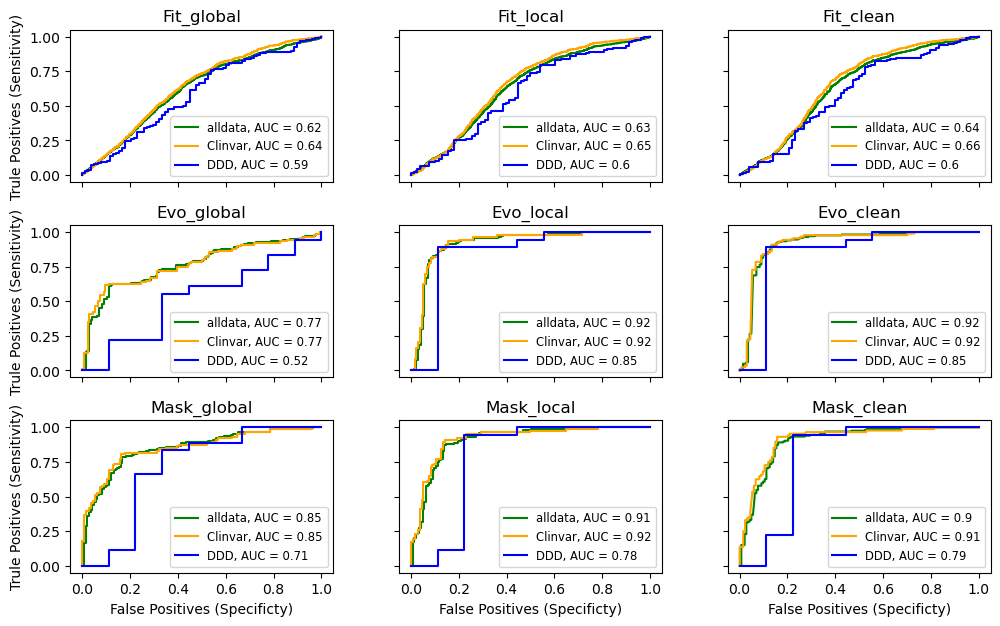

In [18]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_Fit_global, tpr_Fit_global, label = "alldata, AUC = "+str(roc_auc_Fit_global), color = "green")
axes[0,0].plot(fpr_ClinVar_Fit_global, tpr_ClinVar_Fit_global, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Fit_global), color = "orange")
axes[0,0].plot(fpr_DDD_Fit_global, tpr_DDD_Fit_global, label = "DDD, AUC = "+str(roc_auc_DDD_Fit_global), color = "blue")
axes[0,0].set_title('Fit_global')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_Fit_local, tpr_Fit_local, label = "alldata, AUC = "+str(roc_auc_Fit_local), color = "green")
axes[0,1].plot(fpr_ClinVar_Fit_local, tpr_ClinVar_Fit_local, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Fit_local), color = "orange")
axes[0,1].plot(fpr_DDD_Fit_local, tpr_DDD_Fit_local, label = "DDD, AUC = "+str(roc_auc_DDD_Fit_local), color = "blue")
axes[0,1].set_title('Fit_local')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_Fit_clean, tpr_Fit_clean, label = "alldata, AUC = "+str(roc_auc_Fit_clean), color = "green")
axes[0,2].plot(fpr_ClinVar_Fit_clean, tpr_ClinVar_Fit_clean, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Fit_clean), color = "orange")
axes[0,2].plot(fpr_DDD_Fit_clean, tpr_DDD_Fit_clean, label = "DDD, AUC = "+str(roc_auc_DDD_Fit_clean), color = "blue")
axes[0,2].set_title('Fit_clean')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_Evo_global, tpr_Evo_global, label = "alldata, AUC = "+str(roc_auc_Evo_global), color = "green")
axes[1,0].plot(fpr_ClinVar_Evo_global, tpr_ClinVar_Evo_global, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Evo_global), color = "orange")
axes[1,0].plot(fpr_DDD_Evo_global, tpr_DDD_Evo_global, label = "DDD, AUC = "+str(roc_auc_DDD_Evo_global), color = "blue")
axes[1,0].set_title('Evo_global')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_Evo_local, tpr_Evo_local, label = "alldata, AUC = "+str(roc_auc_Evo_local), color = "green")
axes[1,1].plot(fpr_ClinVar_Evo_local, tpr_ClinVar_Evo_local, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Evo_local), color = "orange")
axes[1,1].plot(fpr_DDD_Evo_local, tpr_DDD_Evo_local, label = "DDD, AUC = "+str(roc_auc_DDD_Evo_local), color = "blue")
axes[1,1].set_title('Evo_local')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_Evo_clean, tpr_Evo_clean, label = "alldata, AUC = "+str(roc_auc_Evo_clean), color = "green")
axes[1,2].plot(fpr_ClinVar_Evo_clean, tpr_ClinVar_Evo_clean, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Evo_clean), color = "orange")
axes[1,2].plot(fpr_DDD_Evo_clean, tpr_DDD_Evo_clean, label = "DDD, AUC = "+str(roc_auc_DDD_Evo_clean), color = "blue")
axes[1,2].set_title('Evo_clean')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_Mask_global, tpr_Mask_global, label = "alldata, AUC = "+str(roc_auc_Mask_global), color = "green")
axes[2,0].plot(fpr_ClinVar_Mask_global, tpr_ClinVar_Mask_global, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Mask_global), color = "orange")
axes[2,0].plot(fpr_DDD_Mask_global, tpr_DDD_Mask_global, label = "DDD, AUC = "+str(roc_auc_DDD_Mask_global), color = "blue")
axes[2,0].set_title('Mask_global')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_Mask_local, tpr_Mask_local, label = "alldata, AUC = "+str(roc_auc_Mask_local), color = "green")
axes[2,1].plot(fpr_ClinVar_Mask_local, tpr_ClinVar_Mask_local, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Mask_local), color = "orange")
axes[2,1].plot(fpr_DDD_Mask_local, tpr_DDD_Mask_local, label = "DDD, AUC = "+str(roc_auc_DDD_Mask_local), color = "blue")
axes[2,1].set_title('Mask_local')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_Mask_clean, tpr_Mask_clean, label = "alldata, AUC = "+str(roc_auc_Mask_clean), color = "green")
axes[2,2].plot(fpr_ClinVar_Mask_clean, tpr_ClinVar_Mask_clean, label = "Clinvar, AUC = "+str(roc_auc_ClinVar_Mask_clean), color = "orange")
axes[2,2].plot(fpr_DDD_Mask_clean, tpr_DDD_Mask_clean, label = "DDD, AUC = "+str(roc_auc_DDD_Mask_clean), color = "blue")
axes[2,2].set_title('Mask_clean')
axes[2,2].legend(fontsize='small')
'''
axes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")
axes[3,0].plot(fpr_ClinVar_ProstT5_global, tpr_ClinVar_ProstT5_global, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ProstT5_global), color = "orange")
axes[3,0].plot(fpr_DDD_ProstT5_global, tpr_DDD_ProstT5_global, label = "DDD, AUC = "+str(roc_auc_DDD_ProstT5_global), color = "blue")
axes[3,0].set_title('ProstT5_global')
axes[3,0].legend(fontsize='small')
axes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")
axes[3,1].plot(fpr_ClinVar_ProstT5_local, tpr_ClinVar_ProstT5_local, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ProstT5_local), color = "orange")
axes[3,1].plot(fpr_DDD_ProstT5_local, tpr_DDD_ProstT5_local, label = "DDD, AUC = "+str(roc_auc_DDD_ProstT5_local), color = "blue")
axes[3,1].set_title('ProstT5_local')
axes[3,1].legend(fontsize='small')
axes[3,2].plot(fpr_ProstT5_clean, tpr_ProstT5_clean, label = "alldata, AUC = "+str(roc_auc_ProstT5_clean), color = "green")
axes[3,2].plot(fpr_ClinVar_ProstT5_clean, tpr_ClinVar_ProstT5_clean, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ProstT5_clean), color = "orange")
axes[3,2].plot(fpr_DDD_ProstT5_clean, tpr_DDD_ProstT5_clean, label = "DDD, AUC = "+str(roc_auc_DDD_ProstT5_clean), color = "blue")
axes[3,2].set_title('ProstT5_clean')
axes[3,2].legend(fontsize='small')
axes[4,0].plot(fpr_ESM3_global, tpr_ESM3_global, label = "alldata, AUC = "+str(roc_auc_ESM3_global), color = "green")
axes[4,0].plot(fpr_ClinVar_ESM3_global, tpr_ClinVar_ESM3_global, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ESM3_global), color = "orange")
axes[4,0].plot(fpr_DDD_ESM3_global, tpr_DDD_ESM3_global, label = "DDD, AUC = "+str(roc_auc_DDD_ESM3_global), color = "blue")
axes[4,0].set_title('ESM3_global')
axes[4,0].legend(fontsize='small')
axes[4,1].plot(fpr_ESM3_local, tpr_ESM3_local, label = "alldata, AUC = "+str(roc_auc_ESM3_local), color = "green")
axes[4,1].plot(fpr_ClinVar_ESM3_local, tpr_ClinVar_ESM3_local, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ESM3_local), color = "orange")
axes[4,1].plot(fpr_DDD_ESM3_local, tpr_DDD_ESM3_local, label = "DDD, AUC = "+str(roc_auc_DDD_ESM3_local), color = "blue")
axes[4,1].set_title('ESM3_local')
axes[4,1].legend(fontsize='small')
axes[4,2].plot(fpr_ESM3_clean, tpr_ESM3_clean, label = "alldata, AUC = "+str(roc_auc_ESM3_clean), color = "green")
axes[4,2].plot(fpr_ClinVar_ESM3_clean, tpr_ClinVar_ESM3_clean, label = "ClinVar, AUC = "+str(roc_auc_ClinVar_ESM3_clean), color = "orange")
axes[4,2].plot(fpr_DDD_ESM3_clean, tpr_DDD_ESM3_clean, label = "DDD, AUC = "+str(roc_auc_DDD_ESM3_clean), color = "blue")
axes[4,2].set_title('ESM3_clean')
axes[4,2].legend(fontsize='small')
'''
for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

In [19]:
#Indel type, positive value is deletion, negative value is insertions

Fit_del = Fit_filtered[Fit_filtered['LengthDiff'] > 0]
Fit_ins = Fit_filtered[Fit_filtered['LengthDiff'] < 0]
Evo_del = Evo_filtered[Evo_filtered['LengthDiff'] > 0]
Evo_ins = Evo_filtered[Evo_filtered['LengthDiff'] < 0]
Mask_del = Mask_filtered[Mask_filtered['LengthDiff'] > 0]
Mask_ins = Mask_filtered[Mask_filtered['LengthDiff'] < 0]

#ProstT5_del = ProstT5_filtered[ProstT5_filtered['LengthDiff'] > 0]
#ProstT5_ins = ProstT5_filtered[ProstT5_filtered['LengthDiff'] < 0]
#EMS3_del = ESM3_filtered[ESM3_filtered['LengthDiff'] > 0]
#EMS3_ins = ESM3_filtered[ESM3_filtered['LengthDiff'] < 0]

len(Fit_del)
len(Fit_ins)
len(Evo_del)
len(Evo_ins)
len(Mask_del)
len(Mask_ins)

#len(ProstT5_del)
#len(ProstT5_ins)
#len(ESM3_del)
#len(ESM3_ins)


len(Fit_del) + len(Fit_ins) == len(Fit_filtered)
len(Evo_del) + len(Evo_ins) == len(Evo_filtered)
len(Mask_del) + len(Mask_ins) == len(Mask_filtered)
#len(ProstT5_del) + len(ProstT5_ins) == len(ProstT5_filtered)
#len(ESM3_del) + len(ESM3_ins) == len(ESM3_filtered)

alldata_filtered_del = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_del['id'])]
alldata_filtered_ins = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_ins['id'])]

len(alldata_filtered_del) == len(Fit_del)
len(alldata_filtered_ins) == len(Fit_ins)

2363

1115

223

86

223

86

True

True

True

True

True

In [20]:
#Indel type Deletions
#Calculate F1 and ROC for del
pred_del_CADD = alldata_filtered_del['CADD'].values
pred_del_CAPICE = alldata_filtered_del['CAPICE'].values
alldata_filtered_del['FATHMM-indel'] = pd.to_numeric(alldata_filtered_del['FATHMM-indel'], errors='coerce')
pred_del_FATHMM = alldata_filtered_del['FATHMM-indel'].values
pred_del_MutPred = alldata_filtered_del['MutPredIndel'].values
alldata_filtered_del['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_del['MutationTaster2021']]
pred_del_MutT = alldata_filtered_del['MutationTaster2021_bin'].values
pred_del_PROVEAN = alldata_filtered_del['PROVEAN'].values
alldata_filtered_del['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_del['SIFT-indel']]
pred_del_SIFT = alldata_filtered_del['SIFT_bin'].values
pred_del_VEST = alldata_filtered_del['VEST-indel'].values
pred_del_VVP = alldata_filtered_del['VVP'].values

truelabels_del_CADD = alldata_filtered_del['labels_binary'].values
truelabels_del_CAPICE = alldata_filtered_del['labels_binary'].values
truelabels_del_FATHMM = alldata_filtered_del['labels_binary'].values
truelabels_del_MutPred = alldata_filtered_del['labels_binary'].values
truelabels_del_MutT = alldata_filtered_del['labels_binary'].values
truelabels_del_PROVEAN = alldata_filtered_del['labels_binary'].values
truelabels_del_SIFT = alldata_filtered_del['labels_binary'].values
truelabels_del_VEST = alldata_filtered_del['labels_binary'].values
truelabels_del_VVP = alldata_filtered_del['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_del_CADD = 1 - truelabels_del_CADD
truelabels_del_CAPICE = 1 - truelabels_del_CAPICE
truelabels_del_FATHMM = 1 - truelabels_del_FATHMM
truelabels_del_MutPred = 1 - truelabels_del_MutPred
truelabels_del_VEST = 1 - truelabels_del_VEST
truelabels_del_VVP = 1 - truelabels_del_VVP

#Calculating FP, TN and thresholds
fpr_del_CADD, tpr_del_CADD, thresholds_del_CADD = metrics.roc_curve(truelabels_del_CADD, pred_del_CADD)
fpr_del_CAPICE, tpr_del_CAPICE, thresholds_del_CAPICE = metrics.roc_curve(truelabels_del_CAPICE, pred_del_CAPICE)
fpr_del_FATHMM, tpr_del_FATHMM, thresholds_del_FATHMM = metrics.roc_curve(truelabels_del_FATHMM, pred_del_FATHMM)
fpr_del_MutPred, tpr_del_MutPred, thresholds_del_MutPred = metrics.roc_curve(truelabels_del_MutPred, pred_del_MutPred)
fpr_del_MutT, tpr_del_MutT, thresholds_del_MutT = metrics.roc_curve(truelabels_del_MutT, pred_del_MutT)
fpr_del_PROVEAN, tpr_del_PROVEAN, thresholds_del_PROVEAN = metrics.roc_curve(truelabels_del_PROVEAN, pred_del_PROVEAN)
fpr_del_SIFT, tpr_del_SIFT, thresholds_del_SIFT = metrics.roc_curve(truelabels_del_SIFT, pred_del_SIFT)
fpr_del_VEST, tpr_del_VEST, thresholds_del_VEST = metrics.roc_curve(truelabels_del_VEST, pred_del_VEST)
fpr_del_VVP, tpr_del_VVP, thresholds_del_VVP = metrics.roc_curve(truelabels_del_VVP, pred_del_VVP)

roc_auc_del_CADD = round(metrics.auc(fpr_del_CADD, tpr_del_CADD), 2)
roc_auc_del_CAPICE = round(metrics.auc(fpr_del_CAPICE, tpr_del_CAPICE), 2)
roc_auc_del_FATHMM = round(metrics.auc(fpr_del_FATHMM, tpr_del_FATHMM), 2)
roc_auc_del_MutPred = round(metrics.auc(fpr_del_MutPred, tpr_del_MutPred), 2)
roc_auc_del_MutT = round(metrics.auc(fpr_del_MutT, tpr_del_MutT), 2)
roc_auc_del_PROVEAN = round(metrics.auc(fpr_del_PROVEAN, tpr_del_PROVEAN), 2)
roc_auc_del_SIFT = round(metrics.auc(fpr_del_SIFT, tpr_del_SIFT), 2)
roc_auc_del_VEST = round(metrics.auc(fpr_del_VEST, tpr_del_VEST), 2)
roc_auc_del_VVP = round(metrics.auc(fpr_del_VVP, tpr_del_VVP), 2)

#Calculating F1 score
tresh_del_CADD = thresholds_del_CADD[np.argmax(tpr_del_CADD - fpr_del_CADD)]
tresh_del_CAPICE = thresholds_del_CAPICE[np.argmax(tpr_del_CAPICE - fpr_del_CAPICE)]
tresh_del_FATHMM = thresholds_del_FATHMM[np.argmax(tpr_del_FATHMM - fpr_del_FATHMM)]
tresh_del_MutPred = thresholds_del_MutPred[np.argmax(tpr_del_MutPred - fpr_del_MutPred)]
tresh_del_MutT = thresholds_del_MutT[np.argmax(tpr_del_MutT - fpr_del_MutT)]
tresh_del_PROVEAN = thresholds_del_PROVEAN[np.argmax(tpr_del_PROVEAN - fpr_del_PROVEAN)]
tresh_del_SIFT = thresholds_del_SIFT[np.argmax(tpr_del_SIFT - fpr_del_SIFT)]
tresh_del_VEST = thresholds_del_VEST[np.argmax(tpr_del_VEST - fpr_del_VEST)]
tresh_del_VVP = thresholds_del_VVP[np.argmax(tpr_del_VVP - fpr_del_VVP)]

pred_del_CADD_bin = [1 if x >= tresh_del_CADD else 0 for x in pred_del_CADD]
pred_del_CAPICE_bin = [1 if x >= tresh_del_CAPICE else 0 for x in pred_del_CAPICE]
pred_del_FATHMM_bin = [1 if x >= tresh_del_FATHMM else 0 for x in pred_del_FATHMM]
pred_del_MutPred_bin = [1 if x >= tresh_del_MutPred else 0 for x in pred_del_MutPred]
pred_del_MutT_bin = [1 if x >= tresh_del_MutT else 0 for x in pred_del_MutT]
pred_del_PROVEAN_bin = [1 if x >= tresh_del_PROVEAN else 0 for x in pred_del_PROVEAN]
pred_del_SIFT_bin = [1 if x >= tresh_del_SIFT else 0 for x in pred_del_SIFT]
pred_del_VEST_bin = [1 if x >= tresh_del_VEST else 0 for x in pred_del_VEST]
pred_del_VVP_bin = [1 if x >= tresh_del_VVP else 0 for x in pred_del_VVP]

f1_del_CADD = f1_score(truelabels_del_CADD, pred_del_CADD_bin, average = 'binary')
f1_del_CAPICE = f1_score(truelabels_del_CAPICE, pred_del_CAPICE_bin, average = 'binary')
f1_del_FATHMM = f1_score(truelabels_del_FATHMM, pred_del_FATHMM_bin, average = 'binary')
f1_del_MutPred = f1_score(truelabels_del_MutPred, pred_del_MutPred_bin, average = 'binary')
f1_del_MutT = f1_score(truelabels_del_MutT, pred_del_MutT_bin, average = 'binary')
f1_del_PROVEAN = f1_score(truelabels_del_PROVEAN, pred_del_PROVEAN_bin, average = 'binary')
f1_del_SIFT = f1_score(truelabels_del_SIFT, pred_del_SIFT_bin, average = 'binary')
f1_del_VEST = f1_score(truelabels_del_VEST, pred_del_VEST_bin, average = 'binary')
f1_del_VVP = f1_score(truelabels_del_VVP, pred_del_VVP_bin, average = 'binary')

/tmp/ipykernel_3043747/23333743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_del['FATHMM-indel'] = pd.to_numeric(alldata_filtered_del['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/23333743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_del['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_del['MutationTaster2021']]
/tmp/ipykernel_3043747/23333743.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [21]:
#Indel type insertions
#Calculate F1 and ROC for ins
pred_ins_CADD = alldata_filtered_ins['CADD'].values
pred_ins_CAPICE = alldata_filtered_ins['CAPICE'].values
alldata_filtered_ins['FATHMM-indel'] = pd.to_numeric(alldata_filtered_ins['FATHMM-indel'], errors='coerce')
pred_ins_FATHMM = alldata_filtered_ins['FATHMM-indel'].values
pred_ins_MutPred = alldata_filtered_ins['MutPredIndel'].values
alldata_filtered_ins['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_ins['MutationTaster2021']]
pred_ins_MutT = alldata_filtered_ins['MutationTaster2021_bin'].values
pred_ins_PROVEAN = alldata_filtered_ins['PROVEAN'].values
alldata_filtered_ins['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_ins['SIFT-indel']]
pred_ins_SIFT = alldata_filtered_ins['SIFT_bin'].values
pred_ins_VEST = alldata_filtered_ins['VEST-indel'].values
pred_ins_VVP = alldata_filtered_ins['VVP'].values

truelabels_ins_CADD = alldata_filtered_ins['labels_binary'].values
truelabels_ins_CAPICE = alldata_filtered_ins['labels_binary'].values
truelabels_ins_FATHMM = alldata_filtered_ins['labels_binary'].values
truelabels_ins_MutPred = alldata_filtered_ins['labels_binary'].values
truelabels_ins_MutT = alldata_filtered_ins['labels_binary'].values
truelabels_ins_PROVEAN = alldata_filtered_ins['labels_binary'].values
truelabels_ins_SIFT = alldata_filtered_ins['labels_binary'].values
truelabels_ins_VEST = alldata_filtered_ins['labels_binary'].values
truelabels_ins_VVP = alldata_filtered_ins['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_ins_CADD = 1 - truelabels_ins_CADD
truelabels_ins_CAPICE = 1 - truelabels_ins_CAPICE
truelabels_ins_FATHMM = 1 - truelabels_ins_FATHMM
truelabels_ins_MutPred = 1 - truelabels_ins_MutPred
truelabels_ins_VEST = 1 - truelabels_ins_VEST
truelabels_ins_VVP = 1 - truelabels_ins_VVP

#Calculating FP, TN and thresholds
fpr_ins_CADD, tpr_ins_CADD, thresholds_ins_CADD = metrics.roc_curve(truelabels_ins_CADD, pred_ins_CADD)
fpr_ins_CAPICE, tpr_ins_CAPICE, thresholds_ins_CAPICE = metrics.roc_curve(truelabels_ins_CAPICE, pred_ins_CAPICE)
fpr_ins_FATHMM, tpr_ins_FATHMM, thresholds_ins_FATHMM = metrics.roc_curve(truelabels_ins_FATHMM, pred_ins_FATHMM)
fpr_ins_MutPred, tpr_ins_MutPred, thresholds_ins_MutPred = metrics.roc_curve(truelabels_ins_MutPred, pred_ins_MutPred)
fpr_ins_MutT, tpr_ins_MutT, thresholds_ins_MutT = metrics.roc_curve(truelabels_ins_MutT, pred_ins_MutT)
fpr_ins_PROVEAN, tpr_ins_PROVEAN, thresholds_ins_PROVEAN = metrics.roc_curve(truelabels_ins_PROVEAN, pred_ins_PROVEAN)
fpr_ins_SIFT, tpr_ins_SIFT, thresholds_ins_SIFT = metrics.roc_curve(truelabels_ins_SIFT, pred_ins_SIFT)
fpr_ins_VEST, tpr_ins_VEST, thresholds_ins_VEST = metrics.roc_curve(truelabels_ins_VEST, pred_ins_VEST)
fpr_ins_VVP, tpr_ins_VVP, thresholds_ins_VVP = metrics.roc_curve(truelabels_ins_VVP, pred_ins_VVP)

roc_auc_ins_CADD = round(metrics.auc(fpr_ins_CADD, tpr_ins_CADD), 2)
roc_auc_ins_CAPICE = round(metrics.auc(fpr_ins_CAPICE, tpr_ins_CAPICE), 2)
roc_auc_ins_FATHMM = round(metrics.auc(fpr_ins_FATHMM, tpr_ins_FATHMM), 2)
roc_auc_ins_MutPred = round(metrics.auc(fpr_ins_MutPred, tpr_ins_MutPred), 2)
roc_auc_ins_MutT = round(metrics.auc(fpr_ins_MutT, tpr_ins_MutT), 2)
roc_auc_ins_PROVEAN = round(metrics.auc(fpr_ins_PROVEAN, tpr_ins_PROVEAN), 2)
roc_auc_ins_SIFT = round(metrics.auc(fpr_ins_SIFT, tpr_ins_SIFT), 2)
roc_auc_ins_VEST = round(metrics.auc(fpr_ins_VEST, tpr_ins_VEST), 2)
roc_auc_ins_VVP = round(metrics.auc(fpr_ins_VVP, tpr_ins_VVP), 2)

#Calculating F1 score
tresh_ins_CADD = thresholds_ins_CADD[np.argmax(tpr_ins_CADD - fpr_ins_CADD)]
tresh_ins_CAPICE = thresholds_ins_CAPICE[np.argmax(tpr_ins_CAPICE - fpr_ins_CAPICE)]
tresh_ins_FATHMM = thresholds_ins_FATHMM[np.argmax(tpr_ins_FATHMM - fpr_ins_FATHMM)]
tresh_ins_MutPred = thresholds_ins_MutPred[np.argmax(tpr_ins_MutPred - fpr_ins_MutPred)]
tresh_ins_MutT = thresholds_ins_MutT[np.argmax(tpr_ins_MutT - fpr_ins_MutT)]
tresh_ins_PROVEAN = thresholds_ins_PROVEAN[np.argmax(tpr_ins_PROVEAN - fpr_ins_PROVEAN)]
tresh_ins_SIFT = thresholds_ins_SIFT[np.argmax(tpr_ins_SIFT - fpr_ins_SIFT)]
tresh_ins_VEST = thresholds_ins_VEST[np.argmax(tpr_ins_VEST - fpr_ins_VEST)]
tresh_ins_VVP = thresholds_ins_VVP[np.argmax(tpr_ins_VVP - fpr_ins_VVP)]

pred_ins_CADD_bin = [1 if x >= tresh_ins_CADD else 0 for x in pred_ins_CADD]
pred_ins_CAPICE_bin = [1 if x >= tresh_ins_CAPICE else 0 for x in pred_ins_CAPICE]
pred_ins_FATHMM_bin = [1 if x >= tresh_ins_FATHMM else 0 for x in pred_ins_FATHMM]
pred_ins_MutPred_bin = [1 if x >= tresh_ins_MutPred else 0 for x in pred_ins_MutPred]
pred_ins_MutT_bin = [1 if x >= tresh_ins_MutT else 0 for x in pred_ins_MutT]
pred_ins_PROVEAN_bin = [1 if x >= tresh_ins_PROVEAN else 0 for x in pred_ins_PROVEAN]
pred_ins_SIFT_bin = [1 if x >= tresh_ins_SIFT else 0 for x in pred_ins_SIFT]
pred_ins_VEST_bin = [1 if x >= tresh_ins_VEST else 0 for x in pred_ins_VEST]
pred_ins_VVP_bin = [1 if x >= tresh_ins_VVP else 0 for x in pred_ins_VVP]

f1_ins_CADD = f1_score(truelabels_ins_CADD, pred_ins_CADD_bin, average = 'binary')
f1_ins_CAPICE = f1_score(truelabels_ins_CAPICE, pred_ins_CAPICE_bin, average = 'binary')
f1_ins_FATHMM = f1_score(truelabels_ins_FATHMM, pred_ins_FATHMM_bin, average = 'binary')
f1_ins_MutPred = f1_score(truelabels_ins_MutPred, pred_ins_MutPred_bin, average = 'binary')
f1_ins_MutT = f1_score(truelabels_ins_MutT, pred_ins_MutT_bin, average = 'binary')
f1_ins_PROVEAN = f1_score(truelabels_ins_PROVEAN, pred_ins_PROVEAN_bin, average = 'binary')
f1_ins_SIFT = f1_score(truelabels_ins_SIFT, pred_ins_SIFT_bin, average = 'binary')
f1_ins_VEST = f1_score(truelabels_ins_VEST, pred_ins_VEST_bin, average = 'binary')
f1_ins_VVP = f1_score(truelabels_ins_VVP, pred_ins_VVP_bin, average = 'binary')

/tmp/ipykernel_3043747/599993508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_ins['FATHMM-indel'] = pd.to_numeric(alldata_filtered_ins['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/599993508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_ins['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_ins['MutationTaster2021']]
/tmp/ipykernel_3043747/599993508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Text(0.5, 1.0, 'CADD')

Text(0.5, 1.0, 'CAPICE')

Text(0.5, 1.0, 'FATHMM')

Text(0.5, 1.0, 'MutPred')

Text(0.5, 1.0, 'MutTaster2021')

Text(0.5, 1.0, 'PROVEAN')

Text(0.5, 1.0, 'SIFT')

Text(0.5, 1.0, 'VEST')

Text(0.5, 1.0, 'VVP')

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

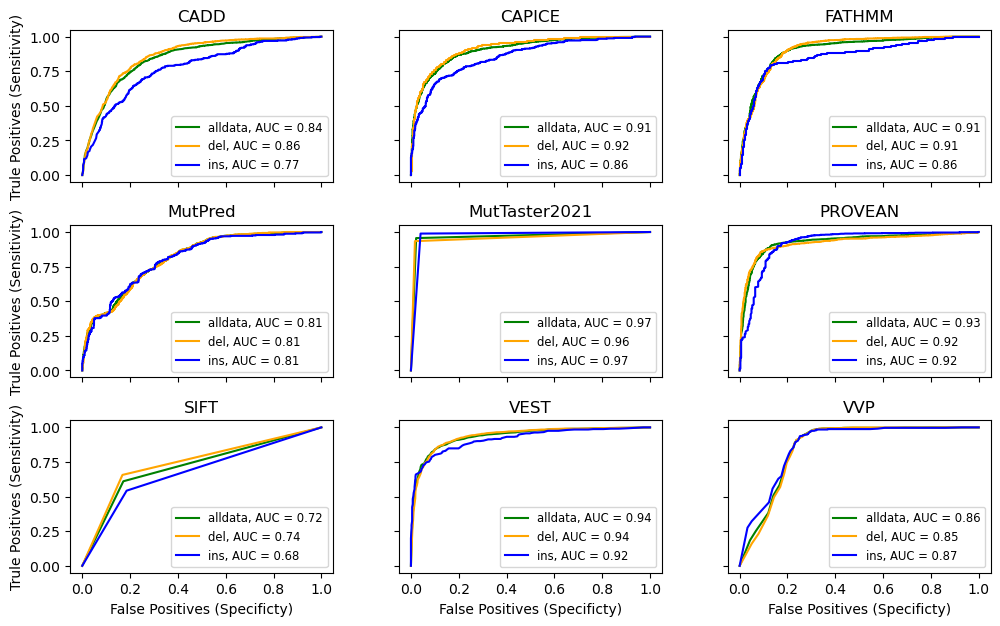

In [22]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_CADD, tpr_CADD, label = "alldata, AUC = "+str(roc_auc_CADD), color = "green")
axes[0,0].plot(fpr_del_CADD, tpr_del_CADD, label = "del, AUC = "+str(roc_auc_del_CADD), color = "orange")
axes[0,0].plot(fpr_ins_CADD, tpr_ins_CADD, label = "ins, AUC = "+str(roc_auc_ins_CADD), color = "blue")
axes[0,0].set_title('CADD')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_CAPICE, tpr_CAPICE, label = "alldata, AUC = "+str(roc_auc_CAPICE), color = "green")
axes[0,1].plot(fpr_del_CAPICE, tpr_del_CAPICE, label = "del, AUC = "+str(roc_auc_del_CAPICE), color = "orange")
axes[0,1].plot(fpr_ins_CAPICE, tpr_ins_CAPICE, label = "ins, AUC = "+str(roc_auc_ins_CAPICE), color = "blue")
axes[0,1].set_title('CAPICE')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_FATHMM, tpr_FATHMM, label = "alldata, AUC = "+str(roc_auc_FATHMM), color = "green")
axes[0,2].plot(fpr_del_FATHMM, tpr_del_FATHMM, label = "del, AUC = "+str(roc_auc_del_FATHMM), color = "orange")
axes[0,2].plot(fpr_ins_FATHMM, tpr_ins_FATHMM, label = "ins, AUC = "+str(roc_auc_ins_FATHMM), color = "blue")
axes[0,2].set_title('FATHMM')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_MutPred, tpr_MutPred, label = "alldata, AUC = "+str(roc_auc_MutPred), color = "green")
axes[1,0].plot(fpr_del_MutPred, tpr_del_MutPred, label = "del, AUC = "+str(roc_auc_del_MutPred), color = "orange")
axes[1,0].plot(fpr_ins_MutPred, tpr_ins_MutPred, label = "ins, AUC = "+str(roc_auc_ins_MutPred), color = "blue")
axes[1,0].set_title('MutPred')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_MutT, tpr_MutT, label = "alldata, AUC = "+str(roc_auc_MutT), color = "green")
axes[1,1].plot(fpr_del_MutT, tpr_del_MutT, label = "del, AUC = "+str(roc_auc_del_MutT), color = "orange")
axes[1,1].plot(fpr_ins_MutT, tpr_ins_MutT, label = "ins, AUC = "+str(roc_auc_ins_MutT), color = "blue")
axes[1,1].set_title('MutTaster2021')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_PROVEAN, tpr_PROVEAN, label = "alldata, AUC = "+str(roc_auc_PROVEAN), color = "green")
axes[1,2].plot(fpr_del_PROVEAN, tpr_del_PROVEAN, label = "del, AUC = "+str(roc_auc_del_PROVEAN), color = "orange")
axes[1,2].plot(fpr_ins_PROVEAN, tpr_ins_PROVEAN, label = "ins, AUC = "+str(roc_auc_ins_PROVEAN), color = "blue")
axes[1,2].set_title('PROVEAN')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_SIFT, tpr_SIFT, label = "alldata, AUC = "+str(roc_auc_SIFT), color = "green")
axes[2,0].plot(fpr_del_SIFT, tpr_del_SIFT, label = "del, AUC = "+str(roc_auc_del_SIFT), color = "orange")
axes[2,0].plot(fpr_ins_SIFT, tpr_ins_SIFT, label = "ins, AUC = "+str(roc_auc_ins_SIFT), color = "blue")
axes[2,0].set_title('SIFT')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_VEST, tpr_VEST, label = "alldata, AUC = "+str(roc_auc_VEST), color = "green")
axes[2,1].plot(fpr_del_VEST, tpr_del_VEST, label = "del, AUC = "+str(roc_auc_del_VEST), color = "orange")
axes[2,1].plot(fpr_ins_VEST, tpr_ins_VEST, label = "ins, AUC = "+str(roc_auc_ins_VEST), color = "blue")
axes[2,1].set_title('VEST')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_VVP, tpr_VVP, label = "alldata, AUC = "+str(roc_auc_VVP), color = "green")
axes[2,2].plot(fpr_del_VVP, tpr_del_VVP, label = "del, AUC = "+str(roc_auc_del_VVP), color = "orange")
axes[2,2].plot(fpr_ins_VVP, tpr_ins_VVP, label = "ins, AUC = "+str(roc_auc_ins_VVP), color = "blue")
axes[2,2].set_title('VVP')
axes[2,2].legend(fontsize='small')

for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

In [23]:
pred_del_Fit_global = Fit_del['dif_global'].values
pred_del_Fit_local = Fit_del['dif_local'].values
pred_del_Fit_clean = Fit_del['dif_clean'].values
pred_del_Evo_global = Evo_del['dif_global'].values
pred_del_Evo_local = Evo_del['dif_local'].values
pred_del_Evo_clean = Evo_del['dif_clean'].values
pred_del_Mask_global = Mask_del['dif_global'].values
pred_del_Mask_local = Mask_del['dif_local'].values
pred_del_Mask_clean = Mask_del['dif_clean'].values

truelabels_del_Fit = Fit_del['labels_binary'].values
truelabels_del_Evo = Evo_del['labels_binary'].values
truelabels_del_Mask = Mask_del['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_del_Fit_global, tpr_del_Fit_global, thresholds_del_Fit_global = metrics.roc_curve(truelabels_del_Fit, pred_del_Fit_global)
fpr_del_Fit_local, tpr_del_Fit_local, thresholds_del_Fit_local = metrics.roc_curve(truelabels_del_Fit, pred_del_Fit_local)
fpr_del_Fit_clean, tpr_del_Fit_clean, thresholds_del_Fit_clean = metrics.roc_curve(truelabels_del_Fit, pred_del_Fit_clean)
fpr_del_Evo_global, tpr_del_Evo_global, thresholds_del_Evo_global = metrics.roc_curve(truelabels_del_Evo, pred_del_Evo_global)
fpr_del_Evo_local, tpr_del_Evo_local, thresholds_del_Evo_local = metrics.roc_curve(truelabels_del_Evo, pred_del_Evo_local)
fpr_del_Evo_clean, tpr_del_Evo_clean, thresholds_del_Evo_clean = metrics.roc_curve(truelabels_del_Evo, pred_del_Evo_clean)
fpr_del_Mask_global, tpr_del_Mask_global, thresholds_del_Mask_global = metrics.roc_curve(truelabels_del_Mask, pred_del_Mask_global)
fpr_del_Mask_local, tpr_del_Mask_local, thresholds_del_Mask_local = metrics.roc_curve(truelabels_del_Mask, pred_del_Mask_local)
fpr_del_Mask_clean, tpr_del_Mask_clean, thresholds_del_Mask_clean = metrics.roc_curve(truelabels_del_Mask, pred_del_Mask_clean)

roc_auc_del_Fit_global = round(metrics.auc(fpr_del_Fit_global, tpr_del_Fit_global), 2)
roc_auc_del_Fit_local = round(metrics.auc(fpr_del_Fit_local, tpr_del_Fit_local), 2)
roc_auc_del_Fit_clean = round(metrics.auc(fpr_del_Fit_clean, tpr_del_Fit_clean), 2)
roc_auc_del_Evo_global = round(metrics.auc(fpr_del_Evo_global, tpr_del_Evo_global), 2)
roc_auc_del_Evo_local = round(metrics.auc(fpr_del_Evo_local, tpr_del_Evo_local), 2)
roc_auc_del_Evo_clean = round(metrics.auc(fpr_del_Evo_clean, tpr_del_Evo_clean), 2)
roc_auc_del_Mask_global = round(metrics.auc(fpr_del_Mask_global, tpr_del_Mask_global), 2)
roc_auc_del_Mask_local = round(metrics.auc(fpr_del_Mask_local, tpr_del_Mask_local), 2)
roc_auc_del_Mask_clean = round(metrics.auc(fpr_del_Mask_clean, tpr_del_Mask_clean), 2)

#Calculating F1 score
tresh_del_Fit_global = thresholds_del_Fit_global[np.argmax(tpr_del_Fit_global - fpr_del_Fit_global)]
tresh_del_Fit_local = thresholds_del_Fit_local[np.argmax(tpr_del_Fit_local - fpr_del_Fit_local)]
tresh_del_Fit_clean = thresholds_del_Fit_clean[np.argmax(tpr_del_Fit_clean - fpr_del_Fit_clean)]
tresh_del_Evo_global = thresholds_del_Evo_global[np.argmax(tpr_del_Evo_global - fpr_del_Evo_global)]
tresh_del_Evo_local = thresholds_del_Evo_local[np.argmax(tpr_del_Evo_local - fpr_del_Evo_local)]
tresh_del_Evo_clean = thresholds_del_Evo_clean[np.argmax(tpr_del_Evo_clean - fpr_del_Evo_clean)]
tresh_del_Mask_global = thresholds_del_Mask_global[np.argmax(tpr_del_Mask_global - fpr_del_Mask_global)]
tresh_del_Mask_local = thresholds_del_Mask_local[np.argmax(tpr_del_Mask_local - fpr_del_Mask_local)]
tresh_del_Mask_clean = thresholds_del_Mask_clean[np.argmax(tpr_del_Mask_clean - fpr_del_Mask_clean)]

pred_del_Fit_global_bin = [1 if x >= tresh_del_Fit_global else 0 for x in pred_del_Fit_global]
pred_del_Fit_local_bin = [1 if x >= tresh_del_Fit_local else 0 for x in pred_del_Fit_local]
pred_del_Fit_clean_bin = [1 if x >= tresh_del_Fit_clean else 0 for x in pred_del_Fit_clean]
pred_del_Evo_global_bin = [1 if x >= tresh_del_Evo_global else 0 for x in pred_del_Evo_global]
pred_del_Evo_local_bin = [1 if x >= tresh_del_Evo_local else 0 for x in pred_del_Evo_local]
pred_del_Evo_clean_bin = [1 if x >= tresh_del_Evo_clean else 0 for x in pred_del_Evo_clean]
pred_del_Mask_global_bin = [1 if x >= tresh_del_Mask_global else 0 for x in pred_del_Mask_global]
pred_del_Mask_local_bin = [1 if x >= tresh_del_Mask_local else 0 for x in pred_del_Mask_local]
pred_del_Mask_clean_bin = [1 if x >= tresh_del_Mask_clean else 0 for x in pred_del_Mask_clean]

f1_del_Fit_global = f1_score(truelabels_del_Fit, pred_del_Fit_global_bin, average = 'binary')
f1_del_Fit_local = f1_score(truelabels_del_Fit, pred_del_Fit_local_bin, average = 'binary')
f1_del_Fit_clean = f1_score(truelabels_del_Fit, pred_del_Fit_clean_bin, average = 'binary')
f1_del_Evo_global = f1_score(truelabels_del_Evo, pred_del_Evo_global_bin, average = 'binary')
f1_del_Evo_local = f1_score(truelabels_del_Evo, pred_del_Evo_local_bin, average = 'binary')
f1_del_Evo_clean = f1_score(truelabels_del_Evo, pred_del_Evo_clean_bin, average = 'binary')
f1_del_Mask_global = f1_score(truelabels_del_Mask, pred_del_Mask_global_bin, average = 'binary')
f1_del_Mask_local = f1_score(truelabels_del_Mask, pred_del_Mask_local_bin, average = 'binary')
f1_del_Mask_clean = f1_score(truelabels_del_Mask, pred_del_Mask_clean_bin, average = 'binary')


'''
pred_del_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_del_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_del_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_del_ESM3_global = ESM3_filtered['dif_global'].values
pred_del_ESM3_local = ESM3_filtered['dif_local'].values
pred_del_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_del_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_del_ESM3 = ESM3_filtered['labels_binary'].values

fpr_del_ProstT5_global, tpr_del_ProstT5_global, thresholds_del_ProstT5_global = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_global)
fpr_del_ProstT5_local, tpr_del_ProstT5_local, thresholds_del_ProstT5_local = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_local)
fpr_del_ProstT5_clean, tpr_del_ProstT5_clean, thresholds_del_ProstT5_clean = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_clean)
fpr_del_ESM3_global, tpr_del_ESM3_global, thresholds_del_ESM3_global = metrics.roc_curve(truelabels_del_ESM3, pred_del_ESM3_global)
fpr_del_ESM3_local, tpr_del_ESM3_local, thresholds_del_ESM3_local = metrics.roc_curve(truelabels_del_ESM3, pred_del_ESM3_local)
fpr_del_ESM3_clean, tpr_del_ESM3_clean, thresholds_del_ESM3_clean = metrics.roc_curve(truelabels_del_ESM3, pred_del_ESM3_clean)

roc_auc_del_ProstT5_global = round(metrics.auc(fpr_del_ProstT5_global, tpr_del_ProstT5_global), 2)
roc_auc_del_ProstT5_local = round(metrics.auc(fpr_del_ProstT5_local, tpr_del_ProstT5_local), 2)
roc_auc_del_ProstT5_clean = round(metrics.auc(fpr_del_ProstT5_clean, tpr_del_ProstT5_clean), 2)
roc_auc_del_ESM3_global = round(metrics.auc(fpr_del_ESM3_global, tpr_del_ESM3_global), 2)
roc_auc_del_ESM3_local = round(metrics.auc(fpr_del_ESM3_local, tpr_del_ESM3_local), 2)
roc_auc_del_ESM3_clean = round(metrics.auc(fpr_del_ESM3_clean, tpr_del_ESM3_clean), 2)

tresh_del_ProstT5_global = thresholds_del_ProstT5_global[np.argmax(tpr_del_ProstT5_global - fpr_del_ProstT5_global)]
tresh_del_ProstT5_local = thresholds_del_ProstT5_local[np.argmax(tpr_del_ProstT5_local - fpr_del_ProstT5_local)]
tresh_del_ProstT5_clean = thresholds_del_ProstT5_clean[np.argmax(tpr_del_ProstT5_clean - fpr_del_ProstT5_clean)]
tresh_del_ESM3_global = thresholds_del_ESM3_global[np.argmax(tpr_del_ESM3_global - fpr_del_ESM3_global)]
tresh_del_ESM3_local = thresholds_del_ESM3_local[np.argmax(tpr_del_ESM3_local - fpr_del_ESM3_local)]
tresh_del_ESM3_clean = thresholds_del_ESM3_clean[np.argmax(tpr_del_ESM3_clean - fpr_del_ESM3_clean)]

pred_del_ProstT5_global_bin = [1 if x >= tresh_del_ProstT5_global else 0 for x in pred_del_ProstT5_global]
pred_del_ProstT5_local_bin = [1 if x >= tresh_del_ProstT5_local else 0 for x in pred_del_ProstT5_local]
pred_del_ProstT5_clean_bin = [1 if x >= tresh_del_ProstT5_clean else 0 for x in pred_del_ProstT5_clean]
pred_del_ESM3_global_bin = [1 if x >= tresh_del_ESM3_global else 0 for x in pred_del_ESM3_global]
pred_del_ESM3_local_bin = [1 if x >= tresh_del_ESM3_local else 0 for x in pred_del_ESM3_local]
pred_del_ESM3_clean_bin = [1 if x >= tresh_del_ESM3_clean else 0 for x in pred_del_ESM3_clean]

f1_del_ProstT5_global = f1_del_score(truelabels_del_ProstT5, pred_del_ProstT5_global_bin, average = 'binary')
f1_del_ProstT5_local = f1_del_score(truelabels_del_ProstT5, pred_del_ProstT5_local_bin, average = 'binary')
f1_del_ProstT5_clean = f1_del_score(truelabels_del_ProstT5, pred_del_ProstT5_clean_bin, average = 'binary')
f1_del_ESM3_global = f1_del_score(truelabels_del_ESM3, pred_del_ESM3_global_bin, average = 'binary')
f1_del_ESM3_local = f1_del_score(truelabels_del_ESM3, pred_del_ESM3_local_bin, average = 'binary')
f1_del_ESM3_clean = f1_del_score(truelabels_del_ESM3, pred_del_ESM3_clean_bin, average = 'binary')
'''

"\npred_del_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_del_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_del_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_del_ESM3_global = ESM3_filtered['dif_global'].values\npred_del_ESM3_local = ESM3_filtered['dif_local'].values\npred_del_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_del_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_del_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_del_ProstT5_global, tpr_del_ProstT5_global, thresholds_del_ProstT5_global = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_global)\nfpr_del_ProstT5_local, tpr_del_ProstT5_local, thresholds_del_ProstT5_local = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_local)\nfpr_del_ProstT5_clean, tpr_del_ProstT5_clean, thresholds_del_ProstT5_clean = metrics.roc_curve(truelabels_del_ProstT5, pred_del_ProstT5_clean)\nfpr_del_ESM3_global, tpr_del_ESM3_global, thresholds_del_ESM3_glo

In [24]:
pred_ins_Fit_global = Fit_ins['dif_global'].values
pred_ins_Fit_local = Fit_ins['dif_local'].values
pred_ins_Fit_clean = Fit_ins['dif_clean'].values
pred_ins_Evo_global = Evo_ins['dif_global'].values
pred_ins_Evo_local = Evo_ins['dif_local'].values
pred_ins_Evo_clean = Evo_ins['dif_clean'].values
pred_ins_Mask_global = Mask_ins['dif_global'].values
pred_ins_Mask_local = Mask_ins['dif_local'].values
pred_ins_Mask_clean = Mask_ins['dif_clean'].values

truelabels_ins_Fit = Fit_ins['labels_binary'].values
truelabels_ins_Evo = Evo_ins['labels_binary'].values
truelabels_ins_Mask = Mask_ins['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_ins_Fit_global, tpr_ins_Fit_global, thresholds_ins_Fit_global = metrics.roc_curve(truelabels_ins_Fit, pred_ins_Fit_global)
fpr_ins_Fit_local, tpr_ins_Fit_local, thresholds_ins_Fit_local = metrics.roc_curve(truelabels_ins_Fit, pred_ins_Fit_local)
fpr_ins_Fit_clean, tpr_ins_Fit_clean, thresholds_ins_Fit_clean = metrics.roc_curve(truelabels_ins_Fit, pred_ins_Fit_clean)
fpr_ins_Evo_global, tpr_ins_Evo_global, thresholds_ins_Evo_global = metrics.roc_curve(truelabels_ins_Evo, pred_ins_Evo_global)
fpr_ins_Evo_local, tpr_ins_Evo_local, thresholds_ins_Evo_local = metrics.roc_curve(truelabels_ins_Evo, pred_ins_Evo_local)
fpr_ins_Evo_clean, tpr_ins_Evo_clean, thresholds_ins_Evo_clean = metrics.roc_curve(truelabels_ins_Evo, pred_ins_Evo_clean)
fpr_ins_Mask_global, tpr_ins_Mask_global, thresholds_ins_Mask_global = metrics.roc_curve(truelabels_ins_Mask, pred_ins_Mask_global)
fpr_ins_Mask_local, tpr_ins_Mask_local, thresholds_ins_Mask_local = metrics.roc_curve(truelabels_ins_Mask, pred_ins_Mask_local)
fpr_ins_Mask_clean, tpr_ins_Mask_clean, thresholds_ins_Mask_clean = metrics.roc_curve(truelabels_ins_Mask, pred_ins_Mask_clean)

roc_auc_ins_Fit_global = round(metrics.auc(fpr_ins_Fit_global, tpr_ins_Fit_global), 2)
roc_auc_ins_Fit_local = round(metrics.auc(fpr_ins_Fit_local, tpr_ins_Fit_local), 2)
roc_auc_ins_Fit_clean = round(metrics.auc(fpr_ins_Fit_clean, tpr_ins_Fit_clean), 2)
roc_auc_ins_Evo_global = round(metrics.auc(fpr_ins_Evo_global, tpr_ins_Evo_global), 2)
roc_auc_ins_Evo_local = round(metrics.auc(fpr_ins_Evo_local, tpr_ins_Evo_local), 2)
roc_auc_ins_Evo_clean = round(metrics.auc(fpr_ins_Evo_clean, tpr_ins_Evo_clean), 2)
roc_auc_ins_Mask_global = round(metrics.auc(fpr_ins_Mask_global, tpr_ins_Mask_global), 2)
roc_auc_ins_Mask_local = round(metrics.auc(fpr_ins_Mask_local, tpr_ins_Mask_local), 2)
roc_auc_ins_Mask_clean = round(metrics.auc(fpr_ins_Mask_clean, tpr_ins_Mask_clean), 2)

#Calculating F1 score
tresh_ins_Fit_global = thresholds_ins_Fit_global[np.argmax(tpr_ins_Fit_global - fpr_ins_Fit_global)]
tresh_ins_Fit_local = thresholds_ins_Fit_local[np.argmax(tpr_ins_Fit_local - fpr_ins_Fit_local)]
tresh_ins_Fit_clean = thresholds_ins_Fit_clean[np.argmax(tpr_ins_Fit_clean - fpr_ins_Fit_clean)]
tresh_ins_Evo_global = thresholds_ins_Evo_global[np.argmax(tpr_ins_Evo_global - fpr_ins_Evo_global)]
tresh_ins_Evo_local = thresholds_ins_Evo_local[np.argmax(tpr_ins_Evo_local - fpr_ins_Evo_local)]
tresh_ins_Evo_clean = thresholds_ins_Evo_clean[np.argmax(tpr_ins_Evo_clean - fpr_ins_Evo_clean)]
tresh_ins_Mask_global = thresholds_ins_Mask_global[np.argmax(tpr_ins_Mask_global - fpr_ins_Mask_global)]
tresh_ins_Mask_local = thresholds_ins_Mask_local[np.argmax(tpr_ins_Mask_local - fpr_ins_Mask_local)]
tresh_ins_Mask_clean = thresholds_ins_Mask_clean[np.argmax(tpr_ins_Mask_clean - fpr_ins_Mask_clean)]

pred_ins_Fit_global_bin = [1 if x >= tresh_ins_Fit_global else 0 for x in pred_ins_Fit_global]
pred_ins_Fit_local_bin = [1 if x >= tresh_ins_Fit_local else 0 for x in pred_ins_Fit_local]
pred_ins_Fit_clean_bin = [1 if x >= tresh_ins_Fit_clean else 0 for x in pred_ins_Fit_clean]
pred_ins_Evo_global_bin = [1 if x >= tresh_ins_Evo_global else 0 for x in pred_ins_Evo_global]
pred_ins_Evo_local_bin = [1 if x >= tresh_ins_Evo_local else 0 for x in pred_ins_Evo_local]
pred_ins_Evo_clean_bin = [1 if x >= tresh_ins_Evo_clean else 0 for x in pred_ins_Evo_clean]
pred_ins_Mask_global_bin = [1 if x >= tresh_ins_Mask_global else 0 for x in pred_ins_Mask_global]
pred_ins_Mask_local_bin = [1 if x >= tresh_ins_Mask_local else 0 for x in pred_ins_Mask_local]
pred_ins_Mask_clean_bin = [1 if x >= tresh_ins_Mask_clean else 0 for x in pred_ins_Mask_clean]

f1_ins_Fit_global = f1_score(truelabels_ins_Fit, pred_ins_Fit_global_bin, average = 'binary')
f1_ins_Fit_local = f1_score(truelabels_ins_Fit, pred_ins_Fit_local_bin, average = 'binary')
f1_ins_Fit_clean = f1_score(truelabels_ins_Fit, pred_ins_Fit_clean_bin, average = 'binary')
f1_ins_Evo_global = f1_score(truelabels_ins_Evo, pred_ins_Evo_global_bin, average = 'binary')
f1_ins_Evo_local = f1_score(truelabels_ins_Evo, pred_ins_Evo_local_bin, average = 'binary')
f1_ins_Evo_clean = f1_score(truelabels_ins_Evo, pred_ins_Evo_clean_bin, average = 'binary')
f1_ins_Mask_global = f1_score(truelabels_ins_Mask, pred_ins_Mask_global_bin, average = 'binary')
f1_ins_Mask_local = f1_score(truelabels_ins_Mask, pred_ins_Mask_local_bin, average = 'binary')
f1_ins_Mask_clean = f1_score(truelabels_ins_Mask, pred_ins_Mask_clean_bin, average = 'binary')


'''
pred_ins_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_ins_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_ins_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_ins_ESM3_global = ESM3_filtered['dif_global'].values
pred_ins_ESM3_local = ESM3_filtered['dif_local'].values
pred_ins_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_ins_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_ins_ESM3 = ESM3_filtered['labels_binary'].values

fpr_ins_ProstT5_global, tpr_ins_ProstT5_global, thresholds_ins_ProstT5_global = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_global)
fpr_ins_ProstT5_local, tpr_ins_ProstT5_local, thresholds_ins_ProstT5_local = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_local)
fpr_ins_ProstT5_clean, tpr_ins_ProstT5_clean, thresholds_ins_ProstT5_clean = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_clean)
fpr_ins_ESM3_global, tpr_ins_ESM3_global, thresholds_ins_ESM3_global = metrics.roc_curve(truelabels_ins_ESM3, pred_ins_ESM3_global)
fpr_ins_ESM3_local, tpr_ins_ESM3_local, thresholds_ins_ESM3_local = metrics.roc_curve(truelabels_ins_ESM3, pred_ins_ESM3_local)
fpr_ins_ESM3_clean, tpr_ins_ESM3_clean, thresholds_ins_ESM3_clean = metrics.roc_curve(truelabels_ins_ESM3, pred_ins_ESM3_clean)

roc_auc_ins_ProstT5_global = round(metrics.auc(fpr_ins_ProstT5_global, tpr_ins_ProstT5_global), 2)
roc_auc_ins_ProstT5_local = round(metrics.auc(fpr_ins_ProstT5_local, tpr_ins_ProstT5_local), 2)
roc_auc_ins_ProstT5_clean = round(metrics.auc(fpr_ins_ProstT5_clean, tpr_ins_ProstT5_clean), 2)
roc_auc_ins_ESM3_global = round(metrics.auc(fpr_ins_ESM3_global, tpr_ins_ESM3_global), 2)
roc_auc_ins_ESM3_local = round(metrics.auc(fpr_ins_ESM3_local, tpr_ins_ESM3_local), 2)
roc_auc_ins_ESM3_clean = round(metrics.auc(fpr_ins_ESM3_clean, tpr_ins_ESM3_clean), 2)

tresh_ins_ProstT5_global = thresholds_ins_ProstT5_global[np.argmax(tpr_ins_ProstT5_global - fpr_ins_ProstT5_global)]
tresh_ins_ProstT5_local = thresholds_ins_ProstT5_local[np.argmax(tpr_ins_ProstT5_local - fpr_ins_ProstT5_local)]
tresh_ins_ProstT5_clean = thresholds_ins_ProstT5_clean[np.argmax(tpr_ins_ProstT5_clean - fpr_ins_ProstT5_clean)]
tresh_ins_ESM3_global = thresholds_ins_ESM3_global[np.argmax(tpr_ins_ESM3_global - fpr_ins_ESM3_global)]
tresh_ins_ESM3_local = thresholds_ins_ESM3_local[np.argmax(tpr_ins_ESM3_local - fpr_ins_ESM3_local)]
tresh_ins_ESM3_clean = thresholds_ins_ESM3_clean[np.argmax(tpr_ins_ESM3_clean - fpr_ins_ESM3_clean)]

pred_ins_ProstT5_global_bin = [1 if x >= tresh_ins_ProstT5_global else 0 for x in pred_ins_ProstT5_global]
pred_ins_ProstT5_local_bin = [1 if x >= tresh_ins_ProstT5_local else 0 for x in pred_ins_ProstT5_local]
pred_ins_ProstT5_clean_bin = [1 if x >= tresh_ins_ProstT5_clean else 0 for x in pred_ins_ProstT5_clean]
pred_ins_ESM3_global_bin = [1 if x >= tresh_ins_ESM3_global else 0 for x in pred_ins_ESM3_global]
pred_ins_ESM3_local_bin = [1 if x >= tresh_ins_ESM3_local else 0 for x in pred_ins_ESM3_local]
pred_ins_ESM3_clean_bin = [1 if x >= tresh_ins_ESM3_clean else 0 for x in pred_ins_ESM3_clean]

f1_ins_ProstT5_global = f1_ins_score(truelabels_ins_ProstT5, pred_ins_ProstT5_global_bin, average = 'binary')
f1_ins_ProstT5_local = f1_ins_score(truelabels_ins_ProstT5, pred_ins_ProstT5_local_bin, average = 'binary')
f1_ins_ProstT5_clean = f1_ins_score(truelabels_ins_ProstT5, pred_ins_ProstT5_clean_bin, average = 'binary')
f1_ins_ESM3_global = f1_ins_score(truelabels_ins_ESM3, pred_ins_ESM3_global_bin, average = 'binary')
f1_ins_ESM3_local = f1_ins_score(truelabels_ins_ESM3, pred_ins_ESM3_local_bin, average = 'binary')
f1_ins_ESM3_clean = f1_ins_score(truelabels_ins_ESM3, pred_ins_ESM3_clean_bin, average = 'binary')
'''

"\npred_ins_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_ins_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_ins_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_ins_ESM3_global = ESM3_filtered['dif_global'].values\npred_ins_ESM3_local = ESM3_filtered['dif_local'].values\npred_ins_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_ins_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_ins_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_ins_ProstT5_global, tpr_ins_ProstT5_global, thresholds_ins_ProstT5_global = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_global)\nfpr_ins_ProstT5_local, tpr_ins_ProstT5_local, thresholds_ins_ProstT5_local = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_local)\nfpr_ins_ProstT5_clean, tpr_ins_ProstT5_clean, thresholds_ins_ProstT5_clean = metrics.roc_curve(truelabels_ins_ProstT5, pred_ins_ProstT5_clean)\nfpr_ins_ESM3_global, tpr_ins_ESM3_global, thresholds_ins_ESM3_glo

Text(0.5, 1.0, 'Fit_global')

Text(0.5, 1.0, 'Fit_local')

Text(0.5, 1.0, 'Fit_clean')

Text(0.5, 1.0, 'Evo_global')

Text(0.5, 1.0, 'Evo_local')

Text(0.5, 1.0, 'Evo_clean')

Text(0.5, 1.0, 'Mask_global')

Text(0.5, 1.0, 'Mask_local')

Text(0.5, 1.0, 'Mask_clean')

'\naxes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")\naxes[3,0].plot(fpr_del_ProstT5_global, tpr_del_ProstT5_global, label = "del, AUC = "+str(roc_auc_del_ProstT5_global), color = "orange")\naxes[3,0].plot(fpr_ins_ProstT5_global, tpr_ins_ProstT5_global, label = "ins, AUC = "+str(roc_auc_ins_ProstT5_global), color = "blue")\naxes[3,0].set_title(\'ProstT5_global\')\naxes[3,0].legend(fontsize=\'small\')\naxes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")\naxes[3,1].plot(fpr_del_ProstT5_local, tpr_del_ProstT5_local, label = "del, AUC = "+str(roc_auc_del_ProstT5_local), color = "orange")\naxes[3,1].plot(fpr_ins_ProstT5_local, tpr_ins_ProstT5_local, label = "ins, AUC = "+str(roc_auc_ins_ProstT5_local), color = "blue")\naxes[3,1].set_title(\'ProstT5_local\')\naxes[3,1].legend(fontsize=\'small\')\naxes[3,2].plot(fpr_ProstT5_clean, tpr_ProstT5_cle

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

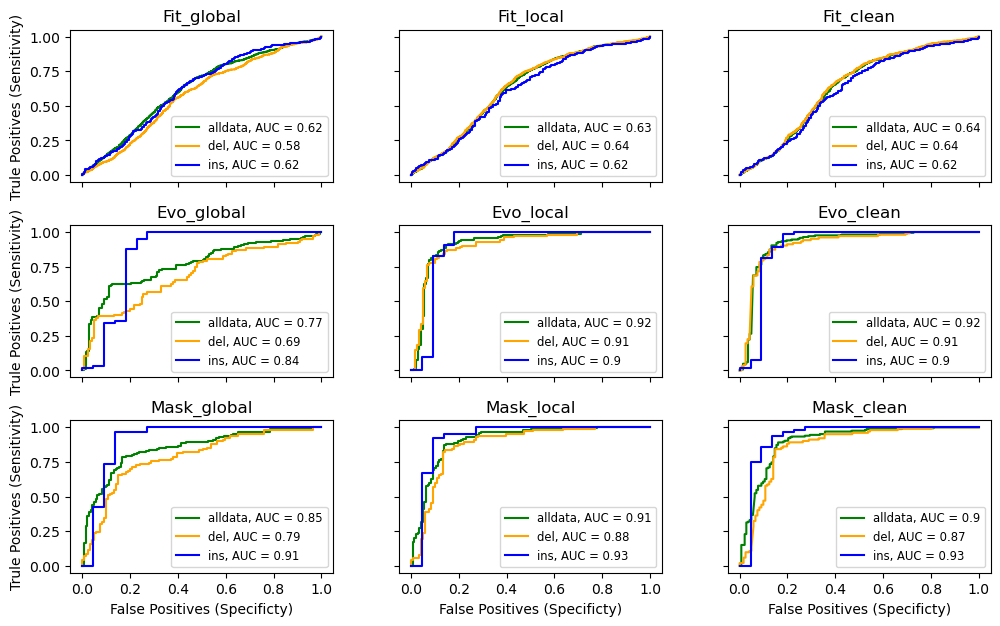

In [25]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_Fit_global, tpr_Fit_global, label = "alldata, AUC = "+str(roc_auc_Fit_global), color = "green")
axes[0,0].plot(fpr_del_Fit_global, tpr_del_Fit_global, label = "del, AUC = "+str(roc_auc_del_Fit_global), color = "orange")
axes[0,0].plot(fpr_ins_Fit_global, tpr_ins_Fit_global, label = "ins, AUC = "+str(roc_auc_ins_Fit_global), color = "blue")
axes[0,0].set_title('Fit_global')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_Fit_local, tpr_Fit_local, label = "alldata, AUC = "+str(roc_auc_Fit_local), color = "green")
axes[0,1].plot(fpr_del_Fit_local, tpr_del_Fit_local, label = "del, AUC = "+str(roc_auc_del_Fit_local), color = "orange")
axes[0,1].plot(fpr_ins_Fit_local, tpr_ins_Fit_local, label = "ins, AUC = "+str(roc_auc_ins_Fit_local), color = "blue")
axes[0,1].set_title('Fit_local')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_Fit_clean, tpr_Fit_clean, label = "alldata, AUC = "+str(roc_auc_Fit_clean), color = "green")
axes[0,2].plot(fpr_del_Fit_clean, tpr_del_Fit_clean, label = "del, AUC = "+str(roc_auc_del_Fit_clean), color = "orange")
axes[0,2].plot(fpr_ins_Fit_clean, tpr_ins_Fit_clean, label = "ins, AUC = "+str(roc_auc_ins_Fit_clean), color = "blue")
axes[0,2].set_title('Fit_clean')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_Evo_global, tpr_Evo_global, label = "alldata, AUC = "+str(roc_auc_Evo_global), color = "green")
axes[1,0].plot(fpr_del_Evo_global, tpr_del_Evo_global, label = "del, AUC = "+str(roc_auc_del_Evo_global), color = "orange")
axes[1,0].plot(fpr_ins_Evo_global, tpr_ins_Evo_global, label = "ins, AUC = "+str(roc_auc_ins_Evo_global), color = "blue")
axes[1,0].set_title('Evo_global')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_Evo_local, tpr_Evo_local, label = "alldata, AUC = "+str(roc_auc_Evo_local), color = "green")
axes[1,1].plot(fpr_del_Evo_local, tpr_del_Evo_local, label = "del, AUC = "+str(roc_auc_del_Evo_local), color = "orange")
axes[1,1].plot(fpr_ins_Evo_local, tpr_ins_Evo_local, label = "ins, AUC = "+str(roc_auc_ins_Evo_local), color = "blue")
axes[1,1].set_title('Evo_local')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_Evo_clean, tpr_Evo_clean, label = "alldata, AUC = "+str(roc_auc_Evo_clean), color = "green")
axes[1,2].plot(fpr_del_Evo_clean, tpr_del_Evo_clean, label = "del, AUC = "+str(roc_auc_del_Evo_clean), color = "orange")
axes[1,2].plot(fpr_ins_Evo_clean, tpr_ins_Evo_clean, label = "ins, AUC = "+str(roc_auc_ins_Evo_clean), color = "blue")
axes[1,2].set_title('Evo_clean')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_Mask_global, tpr_Mask_global, label = "alldata, AUC = "+str(roc_auc_Mask_global), color = "green")
axes[2,0].plot(fpr_del_Mask_global, tpr_del_Mask_global, label = "del, AUC = "+str(roc_auc_del_Mask_global), color = "orange")
axes[2,0].plot(fpr_ins_Mask_global, tpr_ins_Mask_global, label = "ins, AUC = "+str(roc_auc_ins_Mask_global), color = "blue")
axes[2,0].set_title('Mask_global')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_Mask_local, tpr_Mask_local, label = "alldata, AUC = "+str(roc_auc_Mask_local), color = "green")
axes[2,1].plot(fpr_del_Mask_local, tpr_del_Mask_local, label = "del, AUC = "+str(roc_auc_del_Mask_local), color = "orange")
axes[2,1].plot(fpr_ins_Mask_local, tpr_ins_Mask_local, label = "ins, AUC = "+str(roc_auc_ins_Mask_local), color = "blue")
axes[2,1].set_title('Mask_local')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_Mask_clean, tpr_Mask_clean, label = "alldata, AUC = "+str(roc_auc_Mask_clean), color = "green")
axes[2,2].plot(fpr_del_Mask_clean, tpr_del_Mask_clean, label = "del, AUC = "+str(roc_auc_del_Mask_clean), color = "orange")
axes[2,2].plot(fpr_ins_Mask_clean, tpr_ins_Mask_clean, label = "ins, AUC = "+str(roc_auc_ins_Mask_clean), color = "blue")
axes[2,2].set_title('Mask_clean')
axes[2,2].legend(fontsize='small')
'''
axes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")
axes[3,0].plot(fpr_del_ProstT5_global, tpr_del_ProstT5_global, label = "del, AUC = "+str(roc_auc_del_ProstT5_global), color = "orange")
axes[3,0].plot(fpr_ins_ProstT5_global, tpr_ins_ProstT5_global, label = "ins, AUC = "+str(roc_auc_ins_ProstT5_global), color = "blue")
axes[3,0].set_title('ProstT5_global')
axes[3,0].legend(fontsize='small')
axes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")
axes[3,1].plot(fpr_del_ProstT5_local, tpr_del_ProstT5_local, label = "del, AUC = "+str(roc_auc_del_ProstT5_local), color = "orange")
axes[3,1].plot(fpr_ins_ProstT5_local, tpr_ins_ProstT5_local, label = "ins, AUC = "+str(roc_auc_ins_ProstT5_local), color = "blue")
axes[3,1].set_title('ProstT5_local')
axes[3,1].legend(fontsize='small')
axes[3,2].plot(fpr_ProstT5_clean, tpr_ProstT5_clean, label = "alldata, AUC = "+str(roc_auc_ProstT5_clean), color = "green")
axes[3,2].plot(fpr_del_ProstT5_clean, tpr_del_ProstT5_clean, label = "del, AUC = "+str(roc_auc_del_ProstT5_clean), color = "orange")
axes[3,2].plot(fpr_ins_ProstT5_clean, tpr_ins_ProstT5_clean, label = "ins, AUC = "+str(roc_auc_ins_ProstT5_clean), color = "blue")
axes[3,2].set_title('ProstT5_clean')
axes[3,2].legend(fontsize='small')
axes[4,0].plot(fpr_ESM3_global, tpr_ESM3_global, label = "alldata, AUC = "+str(roc_auc_ESM3_global), color = "green")
axes[4,0].plot(fpr_del_ESM3_global, tpr_del_ESM3_global, label = "del, AUC = "+str(roc_auc_del_ESM3_global), color = "orange")
axes[4,0].plot(fpr_ins_ESM3_global, tpr_ins_ESM3_global, label = "ins, AUC = "+str(roc_auc_ins_ESM3_global), color = "blue")
axes[4,0].set_title('ESM3_global')
axes[4,0].legend(fontsize='small')
axes[4,1].plot(fpr_ESM3_local, tpr_ESM3_local, label = "alldata, AUC = "+str(roc_auc_ESM3_local), color = "green")
axes[4,1].plot(fpr_del_ESM3_local, tpr_del_ESM3_local, label = "del, AUC = "+str(roc_auc_del_ESM3_local), color = "orange")
axes[4,1].plot(fpr_ins_ESM3_local, tpr_ins_ESM3_local, label = "ins, AUC = "+str(roc_auc_ins_ESM3_local), color = "blue")
axes[4,1].set_title('ESM3_local')
axes[4,1].legend(fontsize='small')
axes[4,2].plot(fpr_ESM3_clean, tpr_ESM3_clean, label = "alldata, AUC = "+str(roc_auc_ESM3_clean), color = "green")
axes[4,2].plot(fpr_del_ESM3_clean, tpr_del_ESM3_clean, label = "del, AUC = "+str(roc_auc_del_ESM3_clean), color = "orange")
axes[4,2].plot(fpr_ins_ESM3_clean, tpr_ins_ESM3_clean, label = "ins, AUC = "+str(roc_auc_ins_ESM3_clean), color = "blue")
axes[4,2].set_title('ESM3_clean')
axes[4,2].legend(fontsize='small')
'''
for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

In [26]:
#Indel size, absolute numbers not divide by ins or dels 

Fit_1 = Fit_filtered[abs(Fit_filtered['LengthDiff']) == 1]
Fit_2to4 = Fit_filtered[(abs(Fit_filtered['LengthDiff']) >= 2) & (abs(Fit_filtered['LengthDiff']) <= 4)]
Fit_5to10 = Fit_filtered[(abs(Fit_filtered['LengthDiff']) >= 5) & (abs(Fit_filtered['LengthDiff']) <= 10)]
Fit_11pluss = Fit_filtered[abs(Fit_filtered['LengthDiff']) >= 11]

len(Fit_1)
len(Fit_2to4)
len(Fit_5to10)
len(Fit_11pluss)

Evo_1 = Evo_filtered[abs(Evo_filtered['LengthDiff']) == 1]
Evo_2to4 = Evo_filtered[(abs(Evo_filtered['LengthDiff']) >= 2) & (abs(Evo_filtered['LengthDiff']) <= 4)]
Evo_5to10 = Evo_filtered[(abs(Evo_filtered['LengthDiff']) >= 5) & (abs(Evo_filtered['LengthDiff']) <= 10)]
Evo_11pluss = Evo_filtered[abs(Evo_filtered['LengthDiff']) >= 11]

len(Fit_1) == len(Evo_1)
len(Fit_2to4) == len(Evo_2to4)
len(Fit_5to10) == len(Evo_5to10)
len(Fit_11pluss) == len(Evo_11pluss)

Mask_1 = Mask_filtered[abs(Mask_filtered['LengthDiff']) == 1]
Mask_2to4 = Mask_filtered[(abs(Mask_filtered['LengthDiff']) >= 2) & (abs(Mask_filtered['LengthDiff']) <= 4)]
Mask_5to10 = Mask_filtered[(abs(Mask_filtered['LengthDiff']) >= 5) & (abs(Mask_filtered['LengthDiff']) <= 10)]
Mask_11pluss = Mask_filtered[abs(Mask_filtered['LengthDiff']) >= 11]

len(Fit_1) == len(Mask_1)
len(Fit_2to4) == len(Mask_2to4)
len(Fit_5to10) == len(Mask_5to10)
len(Fit_11pluss) == len(Mask_11pluss)
'''
ProstT5_1 = ProstT5_filtered[abs(ProstT5_filtered['LengthDiff']) == 1]
ProstT5_2to4 = ProstT5_filtered[(abs(ProstT5_filtered['LengthDiff']) >= 2) & (abs(ProstT5_filtered['LengthDiff']) <= 4)]
ProstT5_5to10 = ProstT5_filtered[(abs(ProstT5_filtered['LengthDiff']) >= 5) & (abs(ProstT5_filtered['LengthDiff']) <= 10)]
ProstT5_11pluss = ProstT5_filtered[abs(ProstT5_filtered['LengthDiff']) >= 11]

len(Fit_1) == len(ProstT5_1)
len(Fit_2to4) == len(ProstT5_2to4)
len(Fit_5to10) == len(ProstT5_5to10)
len(Fit_11pluss) == len(ProstT5_11pluss)

ESM3_1 = ESM3_filtered[abs(ESM3_filtered['LengthDiff']) == 1]
ESM3_2to4 = ESM3_filtered[(abs(ESM3_filtered['LengthDiff']) >= 2) & (abs(ESM3_filtered['LengthDiff']) <= 4)]
ESM3_5to10 = ESM3_filtered[(abs(ESM3_filtered['LengthDiff']) >= 5) & (abs(ESM3_filtered['LengthDiff']) <= 10)]
ESM3_11pluss = ESM3_filtered[abs(ESM3_filtered['LengthDiff']) >= 11]

len(Fit_1) == len(ESM3_1)
len(Fit_2to4) == len(ESM3_2to4)
len(Fit_5to10) == len(ESM3_5to10)
len(Fit_11pluss) == len(ESM3_11pluss)
'''

alldata_filtered_1 = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_1['id'])]
alldata_filtered_2to4 = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_2to4['id'])]
alldata_filtered_5to10 = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_5to10['id'])]
alldata_filtered_11pluss = alldata_filtered[alldata_filtered['Id_matching'].isin(Fit_11pluss['id'])]

len(alldata_filtered_1) == len(Fit_1)
len(alldata_filtered_2to4) == len(Fit_2to4)
len(alldata_filtered_5to10) == len(Fit_5to10)
len(alldata_filtered_11pluss) == len(Fit_11pluss)

1677

1031

592

178

False

False

False

False

False

False

False

False

"\nProstT5_1 = ProstT5_filtered[abs(ProstT5_filtered['LengthDiff']) == 1]\nProstT5_2to4 = ProstT5_filtered[(abs(ProstT5_filtered['LengthDiff']) >= 2) & (abs(ProstT5_filtered['LengthDiff']) <= 4)]\nProstT5_5to10 = ProstT5_filtered[(abs(ProstT5_filtered['LengthDiff']) >= 5) & (abs(ProstT5_filtered['LengthDiff']) <= 10)]\nProstT5_11pluss = ProstT5_filtered[abs(ProstT5_filtered['LengthDiff']) >= 11]\n\nlen(Fit_1) == len(ProstT5_1)\nlen(Fit_2to4) == len(ProstT5_2to4)\nlen(Fit_5to10) == len(ProstT5_5to10)\nlen(Fit_11pluss) == len(ProstT5_11pluss)\n\nESM3_1 = ESM3_filtered[abs(ESM3_filtered['LengthDiff']) == 1]\nESM3_2to4 = ESM3_filtered[(abs(ESM3_filtered['LengthDiff']) >= 2) & (abs(ESM3_filtered['LengthDiff']) <= 4)]\nESM3_5to10 = ESM3_filtered[(abs(ESM3_filtered['LengthDiff']) >= 5) & (abs(ESM3_filtered['LengthDiff']) <= 10)]\nESM3_11pluss = ESM3_filtered[abs(ESM3_filtered['LengthDiff']) >= 11]\n\nlen(Fit_1) == len(ESM3_1)\nlen(Fit_2to4) == len(ESM3_2to4)\nlen(Fit_5to10) == len(ESM3_5to10)

True

True

True

True

In [27]:
#Indel size, absolute numbers not divide by ins or dels 
#Calculate F1 and ROC for del
pred_1_CADD = alldata_filtered_1['CADD'].values
pred_1_CAPICE = alldata_filtered_1['CAPICE'].values
alldata_filtered_1['FATHMM-indel'] = pd.to_numeric(alldata_filtered_1['FATHMM-indel'], errors='coerce')
pred_1_FATHMM = alldata_filtered_1['FATHMM-indel'].values
pred_1_MutPred = alldata_filtered_1['MutPredIndel'].values
alldata_filtered_1['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_1['MutationTaster2021']]
pred_1_MutT = alldata_filtered_1['MutationTaster2021_bin'].values
pred_1_PROVEAN = alldata_filtered_1['PROVEAN'].values
alldata_filtered_1['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_1['SIFT-indel']]
pred_1_SIFT = alldata_filtered_1['SIFT_bin'].values
pred_1_VEST = alldata_filtered_1['VEST-indel'].values
pred_1_VVP = alldata_filtered_1['VVP'].values

truelabels_1_CADD = alldata_filtered_1['labels_binary'].values
truelabels_1_CAPICE = alldata_filtered_1['labels_binary'].values
truelabels_1_FATHMM = alldata_filtered_1['labels_binary'].values
truelabels_1_MutPred = alldata_filtered_1['labels_binary'].values
truelabels_1_MutT = alldata_filtered_1['labels_binary'].values
truelabels_1_PROVEAN = alldata_filtered_1['labels_binary'].values
truelabels_1_SIFT = alldata_filtered_1['labels_binary'].values
truelabels_1_VEST = alldata_filtered_1['labels_binary'].values
truelabels_1_VVP = alldata_filtered_1['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_1_CADD = 1 - truelabels_1_CADD
truelabels_1_CAPICE = 1 - truelabels_1_CAPICE
truelabels_1_FATHMM = 1 - truelabels_1_FATHMM
truelabels_1_MutPred = 1 - truelabels_1_MutPred
truelabels_1_VEST = 1 - truelabels_1_VEST
truelabels_1_VVP = 1 - truelabels_1_VVP

#Calculating FP, TN and thresholds
fpr_1_CADD, tpr_1_CADD, thresholds_1_CADD = metrics.roc_curve(truelabels_1_CADD, pred_1_CADD)
fpr_1_CAPICE, tpr_1_CAPICE, thresholds_1_CAPICE = metrics.roc_curve(truelabels_1_CAPICE, pred_1_CAPICE)
fpr_1_FATHMM, tpr_1_FATHMM, thresholds_1_FATHMM = metrics.roc_curve(truelabels_1_FATHMM, pred_1_FATHMM)
fpr_1_MutPred, tpr_1_MutPred, thresholds_1_MutPred = metrics.roc_curve(truelabels_1_MutPred, pred_1_MutPred)
fpr_1_MutT, tpr_1_MutT, thresholds_1_MutT = metrics.roc_curve(truelabels_1_MutT, pred_1_MutT)
fpr_1_PROVEAN, tpr_1_PROVEAN, thresholds_1_PROVEAN = metrics.roc_curve(truelabels_1_PROVEAN, pred_1_PROVEAN)
fpr_1_SIFT, tpr_1_SIFT, thresholds_1_SIFT = metrics.roc_curve(truelabels_1_SIFT, pred_1_SIFT)
fpr_1_VEST, tpr_1_VEST, thresholds_1_VEST = metrics.roc_curve(truelabels_1_VEST, pred_1_VEST)
fpr_1_VVP, tpr_1_VVP, thresholds_1_VVP = metrics.roc_curve(truelabels_1_VVP, pred_1_VVP)

roc_auc_1_CADD = round(metrics.auc(fpr_1_CADD, tpr_1_CADD), 2)
roc_auc_1_CAPICE = round(metrics.auc(fpr_1_CAPICE, tpr_1_CAPICE), 2)
roc_auc_1_FATHMM = round(metrics.auc(fpr_1_FATHMM, tpr_1_FATHMM), 2)
roc_auc_1_MutPred = round(metrics.auc(fpr_1_MutPred, tpr_1_MutPred), 2)
roc_auc_1_MutT = round(metrics.auc(fpr_1_MutT, tpr_1_MutT), 2)
roc_auc_1_PROVEAN = round(metrics.auc(fpr_1_PROVEAN, tpr_1_PROVEAN), 2)
roc_auc_1_SIFT = round(metrics.auc(fpr_1_SIFT, tpr_1_SIFT), 2)
roc_auc_1_VEST = round(metrics.auc(fpr_1_VEST, tpr_1_VEST), 2)
roc_auc_1_VVP = round(metrics.auc(fpr_1_VVP, tpr_1_VVP), 2)

#Calculating F1 score
tresh_1_CADD = thresholds_1_CADD[np.argmax(tpr_1_CADD - fpr_1_CADD)]
tresh_1_CAPICE = thresholds_1_CAPICE[np.argmax(tpr_1_CAPICE - fpr_1_CAPICE)]
tresh_1_FATHMM = thresholds_1_FATHMM[np.argmax(tpr_1_FATHMM - fpr_1_FATHMM)]
tresh_1_MutPred = thresholds_1_MutPred[np.argmax(tpr_1_MutPred - fpr_1_MutPred)]
tresh_1_MutT = thresholds_1_MutT[np.argmax(tpr_1_MutT - fpr_1_MutT)]
tresh_1_PROVEAN = thresholds_1_PROVEAN[np.argmax(tpr_1_PROVEAN - fpr_1_PROVEAN)]
tresh_1_SIFT = thresholds_1_SIFT[np.argmax(tpr_1_SIFT - fpr_1_SIFT)]
tresh_1_VEST = thresholds_1_VEST[np.argmax(tpr_1_VEST - fpr_1_VEST)]
tresh_1_VVP = thresholds_1_VVP[np.argmax(tpr_1_VVP - fpr_1_VVP)]

pred_1_CADD_bin = [1 if x >= tresh_1_CADD else 0 for x in pred_1_CADD]
pred_1_CAPICE_bin = [1 if x >= tresh_1_CAPICE else 0 for x in pred_1_CAPICE]
pred_1_FATHMM_bin = [1 if x >= tresh_1_FATHMM else 0 for x in pred_1_FATHMM]
pred_1_MutPred_bin = [1 if x >= tresh_1_MutPred else 0 for x in pred_1_MutPred]
pred_1_MutT_bin = [1 if x >= tresh_1_MutT else 0 for x in pred_1_MutT]
pred_1_PROVEAN_bin = [1 if x >= tresh_1_PROVEAN else 0 for x in pred_1_PROVEAN]
pred_1_SIFT_bin = [1 if x >= tresh_1_SIFT else 0 for x in pred_1_SIFT]
pred_1_VEST_bin = [1 if x >= tresh_1_VEST else 0 for x in pred_1_VEST]
pred_1_VVP_bin = [1 if x >= tresh_1_VVP else 0 for x in pred_1_VVP]

f1_1_CADD = f1_score(truelabels_1_CADD, pred_1_CADD_bin, average = 'binary')
f1_1_CAPICE = f1_score(truelabels_1_CAPICE, pred_1_CAPICE_bin, average = 'binary')
f1_1_FATHMM = f1_score(truelabels_1_FATHMM, pred_1_FATHMM_bin, average = 'binary')
f1_1_MutPred = f1_score(truelabels_1_MutPred, pred_1_MutPred_bin, average = 'binary')
f1_1_MutT = f1_score(truelabels_1_MutT, pred_1_MutT_bin, average = 'binary')
f1_1_PROVEAN = f1_score(truelabels_1_PROVEAN, pred_1_PROVEAN_bin, average = 'binary')
f1_1_SIFT = f1_score(truelabels_1_SIFT, pred_1_SIFT_bin, average = 'binary')
f1_1_VEST = f1_score(truelabels_1_VEST, pred_1_VEST_bin, average = 'binary')
f1_1_VVP = f1_score(truelabels_1_VVP, pred_1_VVP_bin, average = 'binary')


/tmp/ipykernel_3043747/2854743529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_1['FATHMM-indel'] = pd.to_numeric(alldata_filtered_1['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/2854743529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_1['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_1['MutationTaster2021']]
/tmp/ipykernel_3043747/2854743529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [28]:
#Indel size, absolute numbers not divide by ins or dels 
#Calculate F1 and ROC for del
pred_2to4_CADD = alldata_filtered_2to4['CADD'].values
pred_2to4_CAPICE = alldata_filtered_2to4['CAPICE'].values
alldata_filtered_2to4['FATHMM-indel'] = pd.to_numeric(alldata_filtered_2to4['FATHMM-indel'], errors='coerce')
pred_2to4_FATHMM = alldata_filtered_2to4['FATHMM-indel'].values
pred_2to4_MutPred = alldata_filtered_2to4['MutPredIndel'].values
alldata_filtered_2to4['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_2to4['MutationTaster2021']]
pred_2to4_MutT = alldata_filtered_2to4['MutationTaster2021_bin'].values
pred_2to4_PROVEAN = alldata_filtered_2to4['PROVEAN'].values
alldata_filtered_2to4['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_2to4['SIFT-indel']]
pred_2to4_SIFT = alldata_filtered_2to4['SIFT_bin'].values
pred_2to4_VEST = alldata_filtered_2to4['VEST-indel'].values
pred_2to4_VVP = alldata_filtered_2to4['VVP'].values

truelabels_2to4_CADD = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_CAPICE = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_FATHMM = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_MutPred = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_MutT = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_PROVEAN = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_SIFT = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_VEST = alldata_filtered_2to4['labels_binary'].values
truelabels_2to4_VVP = alldata_filtered_2to4['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_2to4_CADD = 1 - truelabels_2to4_CADD
truelabels_2to4_CAPICE = 1 - truelabels_2to4_CAPICE
truelabels_2to4_FATHMM = 1 - truelabels_2to4_FATHMM
truelabels_2to4_MutPred = 1 - truelabels_2to4_MutPred
truelabels_2to4_VEST = 1 - truelabels_2to4_VEST
truelabels_2to4_VVP = 1 - truelabels_2to4_VVP

#Calculating FP, TN and thresholds
fpr_2to4_CADD, tpr_2to4_CADD, thresholds_2to4_CADD = metrics.roc_curve(truelabels_2to4_CADD, pred_2to4_CADD)
fpr_2to4_CAPICE, tpr_2to4_CAPICE, thresholds_2to4_CAPICE = metrics.roc_curve(truelabels_2to4_CAPICE, pred_2to4_CAPICE)
fpr_2to4_FATHMM, tpr_2to4_FATHMM, thresholds_2to4_FATHMM = metrics.roc_curve(truelabels_2to4_FATHMM, pred_2to4_FATHMM)
fpr_2to4_MutPred, tpr_2to4_MutPred, thresholds_2to4_MutPred = metrics.roc_curve(truelabels_2to4_MutPred, pred_2to4_MutPred)
fpr_2to4_MutT, tpr_2to4_MutT, thresholds_2to4_MutT = metrics.roc_curve(truelabels_2to4_MutT, pred_2to4_MutT)
fpr_2to4_PROVEAN, tpr_2to4_PROVEAN, thresholds_2to4_PROVEAN = metrics.roc_curve(truelabels_2to4_PROVEAN, pred_2to4_PROVEAN)
fpr_2to4_SIFT, tpr_2to4_SIFT, thresholds_2to4_SIFT = metrics.roc_curve(truelabels_2to4_SIFT, pred_2to4_SIFT)
fpr_2to4_VEST, tpr_2to4_VEST, thresholds_2to4_VEST = metrics.roc_curve(truelabels_2to4_VEST, pred_2to4_VEST)
fpr_2to4_VVP, tpr_2to4_VVP, thresholds_2to4_VVP = metrics.roc_curve(truelabels_2to4_VVP, pred_2to4_VVP)

roc_auc_2to4_CADD = round(metrics.auc(fpr_2to4_CADD, tpr_2to4_CADD), 2)
roc_auc_2to4_CAPICE = round(metrics.auc(fpr_2to4_CAPICE, tpr_2to4_CAPICE), 2)
roc_auc_2to4_FATHMM = round(metrics.auc(fpr_2to4_FATHMM, tpr_2to4_FATHMM), 2)
roc_auc_2to4_MutPred = round(metrics.auc(fpr_2to4_MutPred, tpr_2to4_MutPred), 2)
roc_auc_2to4_MutT = round(metrics.auc(fpr_2to4_MutT, tpr_2to4_MutT), 2)
roc_auc_2to4_PROVEAN = round(metrics.auc(fpr_2to4_PROVEAN, tpr_2to4_PROVEAN), 2)
roc_auc_2to4_SIFT = round(metrics.auc(fpr_2to4_SIFT, tpr_2to4_SIFT), 2)
roc_auc_2to4_VEST = round(metrics.auc(fpr_2to4_VEST, tpr_2to4_VEST), 2)
roc_auc_2to4_VVP = round(metrics.auc(fpr_2to4_VVP, tpr_2to4_VVP), 2)

#Calculating F1 score
tresh_2to4_CADD = thresholds_2to4_CADD[np.argmax(tpr_2to4_CADD - fpr_2to4_CADD)]
tresh_2to4_CAPICE = thresholds_2to4_CAPICE[np.argmax(tpr_2to4_CAPICE - fpr_2to4_CAPICE)]
tresh_2to4_FATHMM = thresholds_2to4_FATHMM[np.argmax(tpr_2to4_FATHMM - fpr_2to4_FATHMM)]
tresh_2to4_MutPred = thresholds_2to4_MutPred[np.argmax(tpr_2to4_MutPred - fpr_2to4_MutPred)]
tresh_2to4_MutT = thresholds_2to4_MutT[np.argmax(tpr_2to4_MutT - fpr_2to4_MutT)]
tresh_2to4_PROVEAN = thresholds_2to4_PROVEAN[np.argmax(tpr_2to4_PROVEAN - fpr_2to4_PROVEAN)]
tresh_2to4_SIFT = thresholds_2to4_SIFT[np.argmax(tpr_2to4_SIFT - fpr_2to4_SIFT)]
tresh_2to4_VEST = thresholds_2to4_VEST[np.argmax(tpr_2to4_VEST - fpr_2to4_VEST)]
tresh_2to4_VVP = thresholds_2to4_VVP[np.argmax(tpr_2to4_VVP - fpr_2to4_VVP)]

pred_2to4_CADD_bin = [1 if x >= tresh_2to4_CADD else 0 for x in pred_2to4_CADD]
pred_2to4_CAPICE_bin = [1 if x >= tresh_2to4_CAPICE else 0 for x in pred_2to4_CAPICE]
pred_2to4_FATHMM_bin = [1 if x >= tresh_2to4_FATHMM else 0 for x in pred_2to4_FATHMM]
pred_2to4_MutPred_bin = [1 if x >= tresh_2to4_MutPred else 0 for x in pred_2to4_MutPred]
pred_2to4_MutT_bin = [1 if x >= tresh_2to4_MutT else 0 for x in pred_2to4_MutT]
pred_2to4_PROVEAN_bin = [1 if x >= tresh_2to4_PROVEAN else 0 for x in pred_2to4_PROVEAN]
pred_2to4_SIFT_bin = [1 if x >= tresh_2to4_SIFT else 0 for x in pred_2to4_SIFT]
pred_2to4_VEST_bin = [1 if x >= tresh_2to4_VEST else 0 for x in pred_2to4_VEST]
pred_2to4_VVP_bin = [1 if x >= tresh_2to4_VVP else 0 for x in pred_2to4_VVP]

f1_2to4_CADD = f1_score(truelabels_2to4_CADD, pred_2to4_CADD_bin, average = 'binary')
f1_2to4_CAPICE = f1_score(truelabels_2to4_CAPICE, pred_2to4_CAPICE_bin, average = 'binary')
f1_2to4_FATHMM = f1_score(truelabels_2to4_FATHMM, pred_2to4_FATHMM_bin, average = 'binary')
f1_2to4_MutPred = f1_score(truelabels_2to4_MutPred, pred_2to4_MutPred_bin, average = 'binary')
f1_2to4_MutT = f1_score(truelabels_2to4_MutT, pred_2to4_MutT_bin, average = 'binary')
f1_2to4_PROVEAN = f1_score(truelabels_2to4_PROVEAN, pred_2to4_PROVEAN_bin, average = 'binary')
f1_2to4_SIFT = f1_score(truelabels_2to4_SIFT, pred_2to4_SIFT_bin, average = 'binary')
f1_2to4_VEST = f1_score(truelabels_2to4_VEST, pred_2to4_VEST_bin, average = 'binary')
f1_2to4_VVP = f1_score(truelabels_2to4_VVP, pred_2to4_VVP_bin, average = 'binary')


/tmp/ipykernel_3043747/2194096319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_2to4['FATHMM-indel'] = pd.to_numeric(alldata_filtered_2to4['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/2194096319.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_2to4['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_2to4['MutationTaster2021']]
/tmp/ipykernel_3043747/2194096319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

In [29]:
#Indel size, absolute numbers not divide by ins or dels 
#Calculate F1 and ROC for del
pred_5to10_CADD = alldata_filtered_5to10['CADD'].values
pred_5to10_CAPICE = alldata_filtered_5to10['CAPICE'].values
alldata_filtered_5to10['FATHMM-indel'] = pd.to_numeric(alldata_filtered_5to10['FATHMM-indel'], errors='coerce')
pred_5to10_FATHMM = alldata_filtered_5to10['FATHMM-indel'].values
pred_5to10_MutPred = alldata_filtered_5to10['MutPredIndel'].values
alldata_filtered_5to10['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_5to10['MutationTaster2021']]
pred_5to10_MutT = alldata_filtered_5to10['MutationTaster2021_bin'].values
pred_5to10_PROVEAN = alldata_filtered_5to10['PROVEAN'].values
alldata_filtered_5to10['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_5to10['SIFT-indel']]
pred_5to10_SIFT = alldata_filtered_5to10['SIFT_bin'].values
pred_5to10_VEST = alldata_filtered_5to10['VEST-indel'].values
pred_5to10_VVP = alldata_filtered_5to10['VVP'].values

truelabels_5to10_CADD = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_CAPICE = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_FATHMM = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_MutPred = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_MutT = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_PROVEAN = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_SIFT = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_VEST = alldata_filtered_5to10['labels_binary'].values
truelabels_5to10_VVP = alldata_filtered_5to10['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_5to10_CADD = 1 - truelabels_5to10_CADD
truelabels_5to10_CAPICE = 1 - truelabels_5to10_CAPICE
truelabels_5to10_FATHMM = 1 - truelabels_5to10_FATHMM
truelabels_5to10_MutPred = 1 - truelabels_5to10_MutPred
truelabels_5to10_VEST = 1 - truelabels_5to10_VEST
truelabels_5to10_VVP = 1 - truelabels_5to10_VVP

#Calculating FP, TN and thresholds
fpr_5to10_CADD, tpr_5to10_CADD, thresholds_5to10_CADD = metrics.roc_curve(truelabels_5to10_CADD, pred_5to10_CADD)
fpr_5to10_CAPICE, tpr_5to10_CAPICE, thresholds_5to10_CAPICE = metrics.roc_curve(truelabels_5to10_CAPICE, pred_5to10_CAPICE)
fpr_5to10_FATHMM, tpr_5to10_FATHMM, thresholds_5to10_FATHMM = metrics.roc_curve(truelabels_5to10_FATHMM, pred_5to10_FATHMM)
fpr_5to10_MutPred, tpr_5to10_MutPred, thresholds_5to10_MutPred = metrics.roc_curve(truelabels_5to10_MutPred, pred_5to10_MutPred)
fpr_5to10_MutT, tpr_5to10_MutT, thresholds_5to10_MutT = metrics.roc_curve(truelabels_5to10_MutT, pred_5to10_MutT)
fpr_5to10_PROVEAN, tpr_5to10_PROVEAN, thresholds_5to10_PROVEAN = metrics.roc_curve(truelabels_5to10_PROVEAN, pred_5to10_PROVEAN)
fpr_5to10_SIFT, tpr_5to10_SIFT, thresholds_5to10_SIFT = metrics.roc_curve(truelabels_5to10_SIFT, pred_5to10_SIFT)
fpr_5to10_VEST, tpr_5to10_VEST, thresholds_5to10_VEST = metrics.roc_curve(truelabels_5to10_VEST, pred_5to10_VEST)
fpr_5to10_VVP, tpr_5to10_VVP, thresholds_5to10_VVP = metrics.roc_curve(truelabels_5to10_VVP, pred_5to10_VVP)

roc_auc_5to10_CADD = round(metrics.auc(fpr_5to10_CADD, tpr_5to10_CADD), 2)
roc_auc_5to10_CAPICE = round(metrics.auc(fpr_5to10_CAPICE, tpr_5to10_CAPICE), 2)
roc_auc_5to10_FATHMM = round(metrics.auc(fpr_5to10_FATHMM, tpr_5to10_FATHMM), 2)
roc_auc_5to10_MutPred = round(metrics.auc(fpr_5to10_MutPred, tpr_5to10_MutPred), 2)
roc_auc_5to10_MutT = round(metrics.auc(fpr_5to10_MutT, tpr_5to10_MutT), 2)
roc_auc_5to10_PROVEAN = round(metrics.auc(fpr_5to10_PROVEAN, tpr_5to10_PROVEAN), 2)
roc_auc_5to10_SIFT = round(metrics.auc(fpr_5to10_SIFT, tpr_5to10_SIFT), 2)
roc_auc_5to10_VEST = round(metrics.auc(fpr_5to10_VEST, tpr_5to10_VEST), 2)
roc_auc_5to10_VVP = round(metrics.auc(fpr_5to10_VVP, tpr_5to10_VVP), 2)

#Calculating F1 score
tresh_5to10_CADD = thresholds_5to10_CADD[np.argmax(tpr_5to10_CADD - fpr_5to10_CADD)]
tresh_5to10_CAPICE = thresholds_5to10_CAPICE[np.argmax(tpr_5to10_CAPICE - fpr_5to10_CAPICE)]
tresh_5to10_FATHMM = thresholds_5to10_FATHMM[np.argmax(tpr_5to10_FATHMM - fpr_5to10_FATHMM)]
tresh_5to10_MutPred = thresholds_5to10_MutPred[np.argmax(tpr_5to10_MutPred - fpr_5to10_MutPred)]
tresh_5to10_MutT = thresholds_5to10_MutT[np.argmax(tpr_5to10_MutT - fpr_5to10_MutT)]
tresh_5to10_PROVEAN = thresholds_5to10_PROVEAN[np.argmax(tpr_5to10_PROVEAN - fpr_5to10_PROVEAN)]
tresh_5to10_SIFT = thresholds_5to10_SIFT[np.argmax(tpr_5to10_SIFT - fpr_5to10_SIFT)]
tresh_5to10_VEST = thresholds_5to10_VEST[np.argmax(tpr_5to10_VEST - fpr_5to10_VEST)]
tresh_5to10_VVP = thresholds_5to10_VVP[np.argmax(tpr_5to10_VVP - fpr_5to10_VVP)]

pred_5to10_CADD_bin = [1 if x >= tresh_5to10_CADD else 0 for x in pred_5to10_CADD]
pred_5to10_CAPICE_bin = [1 if x >= tresh_5to10_CAPICE else 0 for x in pred_5to10_CAPICE]
pred_5to10_FATHMM_bin = [1 if x >= tresh_5to10_FATHMM else 0 for x in pred_5to10_FATHMM]
pred_5to10_MutPred_bin = [1 if x >= tresh_5to10_MutPred else 0 for x in pred_5to10_MutPred]
pred_5to10_MutT_bin = [1 if x >= tresh_5to10_MutT else 0 for x in pred_5to10_MutT]
pred_5to10_PROVEAN_bin = [1 if x >= tresh_5to10_PROVEAN else 0 for x in pred_5to10_PROVEAN]
pred_5to10_SIFT_bin = [1 if x >= tresh_5to10_SIFT else 0 for x in pred_5to10_SIFT]
pred_5to10_VEST_bin = [1 if x >= tresh_5to10_VEST else 0 for x in pred_5to10_VEST]
pred_5to10_VVP_bin = [1 if x >= tresh_5to10_VVP else 0 for x in pred_5to10_VVP]

f1_5to10_CADD = f1_score(truelabels_5to10_CADD, pred_5to10_CADD_bin, average = 'binary')
f1_5to10_CAPICE = f1_score(truelabels_5to10_CAPICE, pred_5to10_CAPICE_bin, average = 'binary')
f1_5to10_FATHMM = f1_score(truelabels_5to10_FATHMM, pred_5to10_FATHMM_bin, average = 'binary')
f1_5to10_MutPred = f1_score(truelabels_5to10_MutPred, pred_5to10_MutPred_bin, average = 'binary')
f1_5to10_MutT = f1_score(truelabels_5to10_MutT, pred_5to10_MutT_bin, average = 'binary')
f1_5to10_PROVEAN = f1_score(truelabels_5to10_PROVEAN, pred_5to10_PROVEAN_bin, average = 'binary')
f1_5to10_SIFT = f1_score(truelabels_5to10_SIFT, pred_5to10_SIFT_bin, average = 'binary')
f1_5to10_VEST = f1_score(truelabels_5to10_VEST, pred_5to10_VEST_bin, average = 'binary')
f1_5to10_VVP = f1_score(truelabels_5to10_VVP, pred_5to10_VVP_bin, average = 'binary')


/tmp/ipykernel_3043747/23706193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_5to10['FATHMM-indel'] = pd.to_numeric(alldata_filtered_5to10['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/23706193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_5to10['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_5to10['MutationTaster2021']]
/tmp/ipykernel_3043747/23706193.py:11: SettingWithCopyWarning: 
A value is trying to be set on a c

In [30]:
#Indel size, absolute numbers not divide by ins or dels 
#Calculate F1 and ROC for del
pred_11pluss_CADD = alldata_filtered_11pluss['CADD'].values
pred_11pluss_CAPICE = alldata_filtered_11pluss['CAPICE'].values
alldata_filtered_11pluss['FATHMM-indel'] = pd.to_numeric(alldata_filtered_11pluss['FATHMM-indel'], errors='coerce')
pred_11pluss_FATHMM = alldata_filtered_11pluss['FATHMM-indel'].values
pred_11pluss_MutPred = alldata_filtered_11pluss['MutPredIndel'].values
alldata_filtered_11pluss['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_11pluss['MutationTaster2021']]
pred_11pluss_MutT = alldata_filtered_11pluss['MutationTaster2021_bin'].values
pred_11pluss_PROVEAN = alldata_filtered_11pluss['PROVEAN'].values
alldata_filtered_11pluss['SIFT_bin'] = [ 1 if x == 'neutral' else 0 for x in alldata_filtered_11pluss['SIFT-indel']]
pred_11pluss_SIFT = alldata_filtered_11pluss['SIFT_bin'].values
pred_11pluss_VEST = alldata_filtered_11pluss['VEST-indel'].values
pred_11pluss_VVP = alldata_filtered_11pluss['VVP'].values

truelabels_11pluss_CADD = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_CAPICE = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_FATHMM = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_MutPred = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_MutT = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_PROVEAN = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_SIFT = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_VEST = alldata_filtered_11pluss['labels_binary'].values
truelabels_11pluss_VVP = alldata_filtered_11pluss['labels_binary'].values

#Some predicts benig as 0, while pathogenic as 1. So have to change 0 to 1 and 1 to 0
truelabels_11pluss_CADD = 1 - truelabels_11pluss_CADD
truelabels_11pluss_CAPICE = 1 - truelabels_11pluss_CAPICE
truelabels_11pluss_FATHMM = 1 - truelabels_11pluss_FATHMM
truelabels_11pluss_MutPred = 1 - truelabels_11pluss_MutPred
truelabels_11pluss_VEST = 1 - truelabels_11pluss_VEST
truelabels_11pluss_VVP = 1 - truelabels_11pluss_VVP

#Calculating FP, TN and thresholds
fpr_11pluss_CADD, tpr_11pluss_CADD, thresholds_11pluss_CADD = metrics.roc_curve(truelabels_11pluss_CADD, pred_11pluss_CADD)
fpr_11pluss_CAPICE, tpr_11pluss_CAPICE, thresholds_11pluss_CAPICE = metrics.roc_curve(truelabels_11pluss_CAPICE, pred_11pluss_CAPICE)
fpr_11pluss_FATHMM, tpr_11pluss_FATHMM, thresholds_11pluss_FATHMM = metrics.roc_curve(truelabels_11pluss_FATHMM, pred_11pluss_FATHMM)
fpr_11pluss_MutPred, tpr_11pluss_MutPred, thresholds_11pluss_MutPred = metrics.roc_curve(truelabels_11pluss_MutPred, pred_11pluss_MutPred)
fpr_11pluss_MutT, tpr_11pluss_MutT, thresholds_11pluss_MutT = metrics.roc_curve(truelabels_11pluss_MutT, pred_11pluss_MutT)
fpr_11pluss_PROVEAN, tpr_11pluss_PROVEAN, thresholds_11pluss_PROVEAN = metrics.roc_curve(truelabels_11pluss_PROVEAN, pred_11pluss_PROVEAN)
fpr_11pluss_SIFT, tpr_11pluss_SIFT, thresholds_11pluss_SIFT = metrics.roc_curve(truelabels_11pluss_SIFT, pred_11pluss_SIFT)
fpr_11pluss_VEST, tpr_11pluss_VEST, thresholds_11pluss_VEST = metrics.roc_curve(truelabels_11pluss_VEST, pred_11pluss_VEST)
fpr_11pluss_VVP, tpr_11pluss_VVP, thresholds_11pluss_VVP = metrics.roc_curve(truelabels_11pluss_VVP, pred_11pluss_VVP)

roc_auc_11pluss_CADD = round(metrics.auc(fpr_11pluss_CADD, tpr_11pluss_CADD), 2)
roc_auc_11pluss_CAPICE = round(metrics.auc(fpr_11pluss_CAPICE, tpr_11pluss_CAPICE), 2)
roc_auc_11pluss_FATHMM = round(metrics.auc(fpr_11pluss_FATHMM, tpr_11pluss_FATHMM), 2)
roc_auc_11pluss_MutPred = round(metrics.auc(fpr_11pluss_MutPred, tpr_11pluss_MutPred), 2)
roc_auc_11pluss_MutT = round(metrics.auc(fpr_11pluss_MutT, tpr_11pluss_MutT), 2)
roc_auc_11pluss_PROVEAN = round(metrics.auc(fpr_11pluss_PROVEAN, tpr_11pluss_PROVEAN), 2)
roc_auc_11pluss_SIFT = round(metrics.auc(fpr_11pluss_SIFT, tpr_11pluss_SIFT), 2)
roc_auc_11pluss_VEST = round(metrics.auc(fpr_11pluss_VEST, tpr_11pluss_VEST), 2)
roc_auc_11pluss_VVP = round(metrics.auc(fpr_11pluss_VVP, tpr_11pluss_VVP), 2)

#Calculating F1 score
tresh_11pluss_CADD = thresholds_11pluss_CADD[np.argmax(tpr_11pluss_CADD - fpr_11pluss_CADD)]
tresh_11pluss_CAPICE = thresholds_11pluss_CAPICE[np.argmax(tpr_11pluss_CAPICE - fpr_11pluss_CAPICE)]
tresh_11pluss_FATHMM = thresholds_11pluss_FATHMM[np.argmax(tpr_11pluss_FATHMM - fpr_11pluss_FATHMM)]
tresh_11pluss_MutPred = thresholds_11pluss_MutPred[np.argmax(tpr_11pluss_MutPred - fpr_11pluss_MutPred)]
tresh_11pluss_MutT = thresholds_11pluss_MutT[np.argmax(tpr_11pluss_MutT - fpr_11pluss_MutT)]
tresh_11pluss_PROVEAN = thresholds_11pluss_PROVEAN[np.argmax(tpr_11pluss_PROVEAN - fpr_11pluss_PROVEAN)]
tresh_11pluss_SIFT = thresholds_11pluss_SIFT[np.argmax(tpr_11pluss_SIFT - fpr_11pluss_SIFT)]
tresh_11pluss_VEST = thresholds_11pluss_VEST[np.argmax(tpr_11pluss_VEST - fpr_11pluss_VEST)]
tresh_11pluss_VVP = thresholds_11pluss_VVP[np.argmax(tpr_11pluss_VVP - fpr_11pluss_VVP)]

pred_11pluss_CADD_bin = [1 if x >= tresh_11pluss_CADD else 0 for x in pred_11pluss_CADD]
pred_11pluss_CAPICE_bin = [1 if x >= tresh_11pluss_CAPICE else 0 for x in pred_11pluss_CAPICE]
pred_11pluss_FATHMM_bin = [1 if x >= tresh_11pluss_FATHMM else 0 for x in pred_11pluss_FATHMM]
pred_11pluss_MutPred_bin = [1 if x >= tresh_11pluss_MutPred else 0 for x in pred_11pluss_MutPred]
pred_11pluss_MutT_bin = [1 if x >= tresh_11pluss_MutT else 0 for x in pred_11pluss_MutT]
pred_11pluss_PROVEAN_bin = [1 if x >= tresh_11pluss_PROVEAN else 0 for x in pred_11pluss_PROVEAN]
pred_11pluss_SIFT_bin = [1 if x >= tresh_11pluss_SIFT else 0 for x in pred_11pluss_SIFT]
pred_11pluss_VEST_bin = [1 if x >= tresh_11pluss_VEST else 0 for x in pred_11pluss_VEST]
pred_11pluss_VVP_bin = [1 if x >= tresh_11pluss_VVP else 0 for x in pred_11pluss_VVP]

f1_11pluss_CADD = f1_score(truelabels_11pluss_CADD, pred_11pluss_CADD_bin, average = 'binary')
f1_11pluss_CAPICE = f1_score(truelabels_11pluss_CAPICE, pred_11pluss_CAPICE_bin, average = 'binary')
f1_11pluss_FATHMM = f1_score(truelabels_11pluss_FATHMM, pred_11pluss_FATHMM_bin, average = 'binary')
f1_11pluss_MutPred = f1_score(truelabels_11pluss_MutPred, pred_11pluss_MutPred_bin, average = 'binary')
f1_11pluss_MutT = f1_score(truelabels_11pluss_MutT, pred_11pluss_MutT_bin, average = 'binary')
f1_11pluss_PROVEAN = f1_score(truelabels_11pluss_PROVEAN, pred_11pluss_PROVEAN_bin, average = 'binary')
f1_11pluss_SIFT = f1_score(truelabels_11pluss_SIFT, pred_11pluss_SIFT_bin, average = 'binary')
f1_11pluss_VEST = f1_score(truelabels_11pluss_VEST, pred_11pluss_VEST_bin, average = 'binary')
f1_11pluss_VVP = f1_score(truelabels_11pluss_VVP, pred_11pluss_VVP_bin, average = 'binary')


/tmp/ipykernel_3043747/1584158835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_11pluss['FATHMM-indel'] = pd.to_numeric(alldata_filtered_11pluss['FATHMM-indel'], errors='coerce')
/tmp/ipykernel_3043747/1584158835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata_filtered_11pluss['MutationTaster2021_bin'] = [ 1 if x == 'Benign' else 0 for x in alldata_filtered_11pluss['MutationTaster2021']]
/tmp/ipykernel_3043747/1584158835.py:11: SettingWithCopyWarning: 
A value is trying to

Text(0.5, 1.0, 'CADD')

Text(0.5, 1.0, 'CAPICE')

Text(0.5, 1.0, 'FATHMM')

Text(0.5, 1.0, 'MutPred')

Text(0.5, 1.0, 'MutTaster2021')

Text(0.5, 1.0, 'PROVEAN')

Text(0.5, 1.0, 'SIFT')

Text(0.5, 1.0, 'VEST')

Text(0.5, 1.0, 'VVP')

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

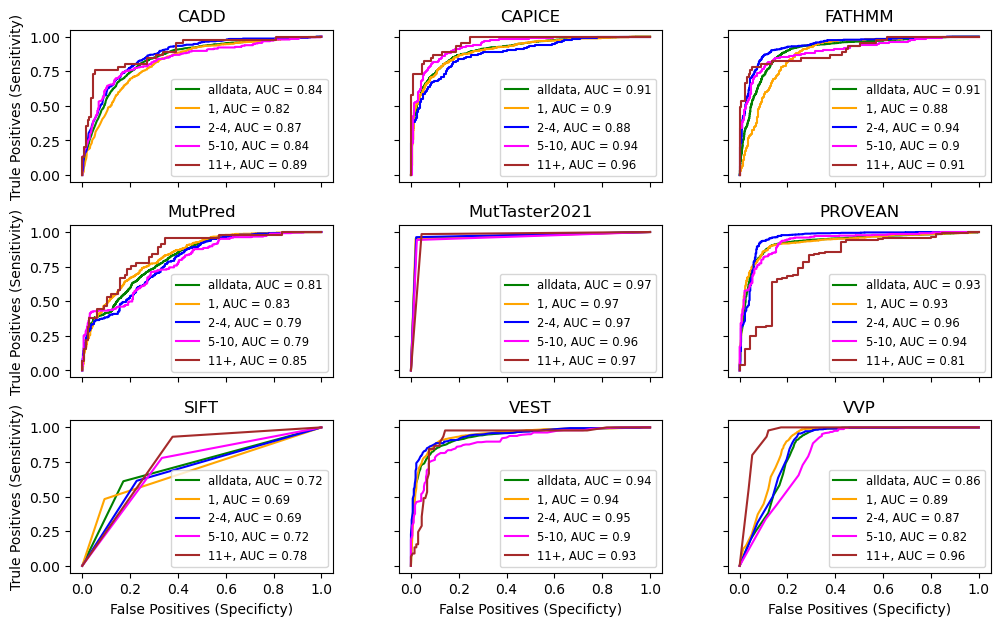

In [31]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_CADD, tpr_CADD, label = "alldata, AUC = "+str(roc_auc_CADD), color = "green")
axes[0,0].plot(fpr_1_CADD, tpr_1_CADD, label = "1, AUC = "+str(roc_auc_1_CADD), color = "orange")
axes[0,0].plot(fpr_2to4_CADD, tpr_2to4_CADD, label = "2-4, AUC = "+str(roc_auc_2to4_CADD), color = "blue")
axes[0,0].plot(fpr_5to10_CADD, tpr_5to10_CADD, label = "5-10, AUC = "+str(roc_auc_5to10_CADD), color = "magenta")
axes[0,0].plot(fpr_11pluss_CADD, tpr_11pluss_CADD, label = "11+, AUC = "+str(roc_auc_11pluss_CADD), color = "brown")
axes[0,0].set_title('CADD')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_CAPICE, tpr_CAPICE, label = "alldata, AUC = "+str(roc_auc_CAPICE), color = "green")
axes[0,1].plot(fpr_1_CAPICE, tpr_1_CAPICE, label = "1, AUC = "+str(roc_auc_1_CAPICE), color = "orange")
axes[0,1].plot(fpr_2to4_CAPICE, tpr_2to4_CAPICE, label = "2-4, AUC = "+str(roc_auc_2to4_CAPICE), color = "blue")
axes[0,1].plot(fpr_5to10_CAPICE, tpr_5to10_CAPICE, label = "5-10, AUC = "+str(roc_auc_5to10_CAPICE), color = "magenta")
axes[0,1].plot(fpr_11pluss_CAPICE, tpr_11pluss_CAPICE, label = "11+, AUC = "+str(roc_auc_11pluss_CAPICE), color = "brown")
axes[0,1].set_title('CAPICE')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_FATHMM, tpr_FATHMM, label = "alldata, AUC = "+str(roc_auc_FATHMM), color = "green")
axes[0,2].plot(fpr_1_FATHMM, tpr_1_FATHMM, label = "1, AUC = "+str(roc_auc_1_FATHMM), color = "orange")
axes[0,2].plot(fpr_2to4_FATHMM, tpr_2to4_FATHMM, label = "2-4, AUC = "+str(roc_auc_2to4_FATHMM), color = "blue")
axes[0,2].plot(fpr_5to10_FATHMM, tpr_5to10_FATHMM, label = "5-10, AUC = "+str(roc_auc_5to10_FATHMM), color = "magenta")
axes[0,2].plot(fpr_11pluss_FATHMM, tpr_11pluss_FATHMM, label = "11+, AUC = "+str(roc_auc_11pluss_FATHMM), color = "brown")
axes[0,2].set_title('FATHMM')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_MutPred, tpr_MutPred, label = "alldata, AUC = "+str(roc_auc_MutPred), color = "green")
axes[1,0].plot(fpr_1_MutPred, tpr_1_MutPred, label = "1, AUC = "+str(roc_auc_1_MutPred), color = "orange")
axes[1,0].plot(fpr_2to4_MutPred, tpr_2to4_MutPred, label = "2-4, AUC = "+str(roc_auc_2to4_MutPred), color = "blue")
axes[1,0].plot(fpr_5to10_MutPred, tpr_5to10_MutPred, label = "5-10, AUC = "+str(roc_auc_5to10_MutPred), color = "magenta")
axes[1,0].plot(fpr_11pluss_MutPred, tpr_11pluss_MutPred, label = "11+, AUC = "+str(roc_auc_11pluss_MutPred), color = "brown")
axes[1,0].set_title('MutPred')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_MutT, tpr_MutT, label = "alldata, AUC = "+str(roc_auc_MutT), color = "green")
axes[1,1].plot(fpr_1_MutT, tpr_1_MutT, label = "1, AUC = "+str(roc_auc_1_MutT), color = "orange")
axes[1,1].plot(fpr_2to4_MutT, tpr_2to4_MutT, label = "2-4, AUC = "+str(roc_auc_2to4_MutT), color = "blue")
axes[1,1].plot(fpr_5to10_MutT, tpr_5to10_MutT, label = "5-10, AUC = "+str(roc_auc_5to10_MutT), color = "magenta")
axes[1,1].plot(fpr_11pluss_MutT, tpr_11pluss_MutT, label = "11+, AUC = "+str(roc_auc_11pluss_MutT), color = "brown")
axes[1,1].set_title('MutTaster2021')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_PROVEAN, tpr_PROVEAN, label = "alldata, AUC = "+str(roc_auc_PROVEAN), color = "green")
axes[1,2].plot(fpr_1_PROVEAN, tpr_1_PROVEAN, label = "1, AUC = "+str(roc_auc_1_PROVEAN), color = "orange")
axes[1,2].plot(fpr_2to4_PROVEAN, tpr_2to4_PROVEAN, label = "2-4, AUC = "+str(roc_auc_2to4_PROVEAN), color = "blue")
axes[1,2].plot(fpr_5to10_PROVEAN, tpr_5to10_PROVEAN, label = "5-10, AUC = "+str(roc_auc_5to10_PROVEAN), color = "magenta")
axes[1,2].plot(fpr_11pluss_PROVEAN, tpr_11pluss_PROVEAN, label = "11+, AUC = "+str(roc_auc_11pluss_PROVEAN), color = "brown")
axes[1,2].set_title('PROVEAN')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_SIFT, tpr_SIFT, label = "alldata, AUC = "+str(roc_auc_SIFT), color = "green")
axes[2,0].plot(fpr_1_SIFT, tpr_1_SIFT, label = "1, AUC = "+str(roc_auc_1_SIFT), color = "orange")
axes[2,0].plot(fpr_2to4_SIFT, tpr_2to4_SIFT, label = "2-4, AUC = "+str(roc_auc_2to4_SIFT), color = "blue")
axes[2,0].plot(fpr_5to10_SIFT, tpr_5to10_SIFT, label = "5-10, AUC = "+str(roc_auc_5to10_SIFT), color = "magenta")
axes[2,0].plot(fpr_11pluss_SIFT, tpr_11pluss_SIFT, label = "11+, AUC = "+str(roc_auc_11pluss_SIFT), color = "brown")
axes[2,0].set_title('SIFT')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_VEST, tpr_VEST, label = "alldata, AUC = "+str(roc_auc_VEST), color = "green")
axes[2,1].plot(fpr_1_VEST, tpr_1_VEST, label = "1, AUC = "+str(roc_auc_1_VEST), color = "orange")
axes[2,1].plot(fpr_2to4_VEST, tpr_2to4_VEST, label = "2-4, AUC = "+str(roc_auc_2to4_VEST), color = "blue")
axes[2,1].plot(fpr_5to10_VEST, tpr_5to10_VEST, label = "5-10, AUC = "+str(roc_auc_5to10_VEST), color = "magenta")
axes[2,1].plot(fpr_11pluss_VEST, tpr_11pluss_VEST, label = "11+, AUC = "+str(roc_auc_11pluss_VEST), color = "brown")
axes[2,1].set_title('VEST')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_VVP, tpr_VVP, label = "alldata, AUC = "+str(roc_auc_VVP), color = "green")
axes[2,2].plot(fpr_1_VVP, tpr_1_VVP, label = "1, AUC = "+str(roc_auc_1_VVP), color = "orange")
axes[2,2].plot(fpr_2to4_VVP, tpr_2to4_VVP, label = "2-4, AUC = "+str(roc_auc_2to4_VVP), color = "blue")
axes[2,2].plot(fpr_5to10_VVP, tpr_5to10_VVP, label = "5-10, AUC = "+str(roc_auc_5to10_VVP), color = "magenta")
axes[2,2].plot(fpr_11pluss_VVP, tpr_11pluss_VVP, label = "11+, AUC = "+str(roc_auc_11pluss_VVP), color = "brown")
axes[2,2].set_title('VVP')
axes[2,2].legend(fontsize='small')

for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

In [32]:
pred_1_Fit_global = Fit_1['dif_global'].values
pred_1_Fit_local = Fit_1['dif_local'].values
pred_1_Fit_clean = Fit_1['dif_clean'].values
pred_1_Evo_global = Evo_1['dif_global'].values
pred_1_Evo_local = Evo_1['dif_local'].values
pred_1_Evo_clean = Evo_1['dif_clean'].values
pred_1_Mask_global = Mask_1['dif_global'].values
pred_1_Mask_local = Mask_1['dif_local'].values
pred_1_Mask_clean = Mask_1['dif_clean'].values

truelabels_1_Fit = Fit_1['labels_binary'].values
truelabels_1_Evo = Evo_1['labels_binary'].values
truelabels_1_Mask = Mask_1['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_1_Fit_global, tpr_1_Fit_global, thresholds_1_Fit_global = metrics.roc_curve(truelabels_1_Fit, pred_1_Fit_global)
fpr_1_Fit_local, tpr_1_Fit_local, thresholds_1_Fit_local = metrics.roc_curve(truelabels_1_Fit, pred_1_Fit_local)
fpr_1_Fit_clean, tpr_1_Fit_clean, thresholds_1_Fit_clean = metrics.roc_curve(truelabels_1_Fit, pred_1_Fit_clean)
fpr_1_Evo_global, tpr_1_Evo_global, thresholds_1_Evo_global = metrics.roc_curve(truelabels_1_Evo, pred_1_Evo_global)
fpr_1_Evo_local, tpr_1_Evo_local, thresholds_1_Evo_local = metrics.roc_curve(truelabels_1_Evo, pred_1_Evo_local)
fpr_1_Evo_clean, tpr_1_Evo_clean, thresholds_1_Evo_clean = metrics.roc_curve(truelabels_1_Evo, pred_1_Evo_clean)
fpr_1_Mask_global, tpr_1_Mask_global, thresholds_1_Mask_global = metrics.roc_curve(truelabels_1_Mask, pred_1_Mask_global)
fpr_1_Mask_local, tpr_1_Mask_local, thresholds_1_Mask_local = metrics.roc_curve(truelabels_1_Mask, pred_1_Mask_local)
fpr_1_Mask_clean, tpr_1_Mask_clean, thresholds_1_Mask_clean = metrics.roc_curve(truelabels_1_Mask, pred_1_Mask_clean)

roc_auc_1_Fit_global = round(metrics.auc(fpr_1_Fit_global, tpr_1_Fit_global), 2)
roc_auc_1_Fit_local = round(metrics.auc(fpr_1_Fit_local, tpr_1_Fit_local), 2)
roc_auc_1_Fit_clean = round(metrics.auc(fpr_1_Fit_clean, tpr_1_Fit_clean), 2)
roc_auc_1_Evo_global = round(metrics.auc(fpr_1_Evo_global, tpr_1_Evo_global), 2)
roc_auc_1_Evo_local = round(metrics.auc(fpr_1_Evo_local, tpr_1_Evo_local), 2)
roc_auc_1_Evo_clean = round(metrics.auc(fpr_1_Evo_clean, tpr_1_Evo_clean), 2)
roc_auc_1_Mask_global = round(metrics.auc(fpr_1_Mask_global, tpr_1_Mask_global), 2)
roc_auc_1_Mask_local = round(metrics.auc(fpr_1_Mask_local, tpr_1_Mask_local), 2)
roc_auc_1_Mask_clean = round(metrics.auc(fpr_1_Mask_clean, tpr_1_Mask_clean), 2)

#Calculating F1 score
tresh_1_Fit_global = thresholds_1_Fit_global[np.argmax(tpr_1_Fit_global - fpr_1_Fit_global)]
tresh_1_Fit_local = thresholds_1_Fit_local[np.argmax(tpr_1_Fit_local - fpr_1_Fit_local)]
tresh_1_Fit_clean = thresholds_1_Fit_clean[np.argmax(tpr_1_Fit_clean - fpr_1_Fit_clean)]
tresh_1_Evo_global = thresholds_1_Evo_global[np.argmax(tpr_1_Evo_global - fpr_1_Evo_global)]
tresh_1_Evo_local = thresholds_1_Evo_local[np.argmax(tpr_1_Evo_local - fpr_1_Evo_local)]
tresh_1_Evo_clean = thresholds_1_Evo_clean[np.argmax(tpr_1_Evo_clean - fpr_1_Evo_clean)]
tresh_1_Mask_global = thresholds_1_Mask_global[np.argmax(tpr_1_Mask_global - fpr_1_Mask_global)]
tresh_1_Mask_local = thresholds_1_Mask_local[np.argmax(tpr_1_Mask_local - fpr_1_Mask_local)]
tresh_1_Mask_clean = thresholds_1_Mask_clean[np.argmax(tpr_1_Mask_clean - fpr_1_Mask_clean)]

pred_1_Fit_global_bin = [1 if x >= tresh_1_Fit_global else 0 for x in pred_1_Fit_global]
pred_1_Fit_local_bin = [1 if x >= tresh_1_Fit_local else 0 for x in pred_1_Fit_local]
pred_1_Fit_clean_bin = [1 if x >= tresh_1_Fit_clean else 0 for x in pred_1_Fit_clean]
pred_1_Evo_global_bin = [1 if x >= tresh_1_Evo_global else 0 for x in pred_1_Evo_global]
pred_1_Evo_local_bin = [1 if x >= tresh_1_Evo_local else 0 for x in pred_1_Evo_local]
pred_1_Evo_clean_bin = [1 if x >= tresh_1_Evo_clean else 0 for x in pred_1_Evo_clean]
pred_1_Mask_global_bin = [1 if x >= tresh_1_Mask_global else 0 for x in pred_1_Mask_global]
pred_1_Mask_local_bin = [1 if x >= tresh_1_Mask_local else 0 for x in pred_1_Mask_local]
pred_1_Mask_clean_bin = [1 if x >= tresh_1_Mask_clean else 0 for x in pred_1_Mask_clean]

f1_1_Fit_global = f1_score(truelabels_1_Fit, pred_1_Fit_global_bin, average = 'binary')
f1_1_Fit_local = f1_score(truelabels_1_Fit, pred_1_Fit_local_bin, average = 'binary')
f1_1_Fit_clean = f1_score(truelabels_1_Fit, pred_1_Fit_clean_bin, average = 'binary')
f1_1_Evo_global = f1_score(truelabels_1_Evo, pred_1_Evo_global_bin, average = 'binary')
f1_1_Evo_local = f1_score(truelabels_1_Evo, pred_1_Evo_local_bin, average = 'binary')
f1_1_Evo_clean = f1_score(truelabels_1_Evo, pred_1_Evo_clean_bin, average = 'binary')
f1_1_Mask_global = f1_score(truelabels_1_Mask, pred_1_Mask_global_bin, average = 'binary')
f1_1_Mask_local = f1_score(truelabels_1_Mask, pred_1_Mask_local_bin, average = 'binary')
f1_1_Mask_clean = f1_score(truelabels_1_Mask, pred_1_Mask_clean_bin, average = 'binary')

'''
pred_1_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_1_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_1_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_1_ESM3_global = ESM3_filtered['dif_global'].values
pred_1_ESM3_local = ESM3_filtered['dif_local'].values
pred_1_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_1_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_1_ESM3 = ESM3_filtered['labels_binary'].values

fpr_1_ProstT5_global, tpr_1_ProstT5_global, thresholds_1_ProstT5_global = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_global)
fpr_1_ProstT5_local, tpr_1_ProstT5_local, thresholds_1_ProstT5_local = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_local)
fpr_1_ProstT5_clean, tpr_1_ProstT5_clean, thresholds_1_ProstT5_clean = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_clean)
fpr_1_ESM3_global, tpr_1_ESM3_global, thresholds_1_ESM3_global = metrics.roc_curve(truelabels_1_ESM3, pred_1_ESM3_global)
fpr_1_ESM3_local, tpr_1_ESM3_local, thresholds_1_ESM3_local = metrics.roc_curve(truelabels_1_ESM3, pred_1_ESM3_local)
fpr_1_ESM3_clean, tpr_1_ESM3_clean, thresholds_1_ESM3_clean = metrics.roc_curve(truelabels_1_ESM3, pred_1_ESM3_clean)

roc_auc_1_ProstT5_global = round(metrics.auc(fpr_1_ProstT5_global, tpr_1_ProstT5_global), 2)
roc_auc_1_ProstT5_local = round(metrics.auc(fpr_1_ProstT5_local, tpr_1_ProstT5_local), 2)
roc_auc_1_ProstT5_clean = round(metrics.auc(fpr_1_ProstT5_clean, tpr_1_ProstT5_clean), 2)
roc_auc_1_ESM3_global = round(metrics.auc(fpr_1_ESM3_global, tpr_1_ESM3_global), 2)
roc_auc_1_ESM3_local = round(metrics.auc(fpr_1_ESM3_local, tpr_1_ESM3_local), 2)
roc_auc_1_ESM3_clean = round(metrics.auc(fpr_1_ESM3_clean, tpr_1_ESM3_clean), 2)

tresh_1_ProstT5_global = thresholds_1_ProstT5_global[np.argmax(tpr_1_ProstT5_global - fpr_1_ProstT5_global)]
tresh_1_ProstT5_local = thresholds_1_ProstT5_local[np.argmax(tpr_1_ProstT5_local - fpr_1_ProstT5_local)]
tresh_1_ProstT5_clean = thresholds_1_ProstT5_clean[np.argmax(tpr_1_ProstT5_clean - fpr_1_ProstT5_clean)]
tresh_1_ESM3_global = thresholds_1_ESM3_global[np.argmax(tpr_1_ESM3_global - fpr_1_ESM3_global)]
tresh_1_ESM3_local = thresholds_1_ESM3_local[np.argmax(tpr_1_ESM3_local - fpr_1_ESM3_local)]
tresh_1_ESM3_clean = thresholds_1_ESM3_clean[np.argmax(tpr_1_ESM3_clean - fpr_1_ESM3_clean)]

pred_1_ProstT5_global_bin = [1 if x >= tresh_1_ProstT5_global else 0 for x in pred_1_ProstT5_global]
pred_1_ProstT5_local_bin = [1 if x >= tresh_1_ProstT5_local else 0 for x in pred_1_ProstT5_local]
pred_1_ProstT5_clean_bin = [1 if x >= tresh_1_ProstT5_clean else 0 for x in pred_1_ProstT5_clean]
pred_1_ESM3_global_bin = [1 if x >= tresh_1_ESM3_global else 0 for x in pred_1_ESM3_global]
pred_1_ESM3_local_bin = [1 if x >= tresh_1_ESM3_local else 0 for x in pred_1_ESM3_local]
pred_1_ESM3_clean_bin = [1 if x >= tresh_1_ESM3_clean else 0 for x in pred_1_ESM3_clean]

f1_1_ProstT5_global = f1_1_score(truelabels_1_ProstT5, pred_1_ProstT5_global_bin, average = 'binary')
f1_1_ProstT5_local = f1_1_score(truelabels_1_ProstT5, pred_1_ProstT5_local_bin, average = 'binary')
f1_1_ProstT5_clean = f1_1_score(truelabels_1_ProstT5, pred_1_ProstT5_clean_bin, average = 'binary')
f1_1_ESM3_global = f1_1_score(truelabels_1_ESM3, pred_1_ESM3_global_bin, average = 'binary')
f1_1_ESM3_local = f1_1_score(truelabels_1_ESM3, pred_1_ESM3_local_bin, average = 'binary')
f1_1_ESM3_clean = f1_1_score(truelabels_1_ESM3, pred_1_ESM3_clean_bin, average = 'binary')
'''

"\npred_1_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_1_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_1_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_1_ESM3_global = ESM3_filtered['dif_global'].values\npred_1_ESM3_local = ESM3_filtered['dif_local'].values\npred_1_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_1_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_1_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_1_ProstT5_global, tpr_1_ProstT5_global, thresholds_1_ProstT5_global = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_global)\nfpr_1_ProstT5_local, tpr_1_ProstT5_local, thresholds_1_ProstT5_local = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_local)\nfpr_1_ProstT5_clean, tpr_1_ProstT5_clean, thresholds_1_ProstT5_clean = metrics.roc_curve(truelabels_1_ProstT5, pred_1_ProstT5_clean)\nfpr_1_ESM3_global, tpr_1_ESM3_global, thresholds_1_ESM3_global = metrics.roc_curve(truelabels_1_ESM3, pred_1_ES

In [33]:
pred_2to4_Fit_global = Fit_2to4['dif_global'].values
pred_2to4_Fit_local = Fit_2to4['dif_local'].values
pred_2to4_Fit_clean = Fit_2to4['dif_clean'].values
pred_2to4_Evo_global = Evo_2to4['dif_global'].values
pred_2to4_Evo_local = Evo_2to4['dif_local'].values
pred_2to4_Evo_clean = Evo_2to4['dif_clean'].values
pred_2to4_Mask_global = Mask_2to4['dif_global'].values
pred_2to4_Mask_local = Mask_2to4['dif_local'].values
pred_2to4_Mask_clean = Mask_2to4['dif_clean'].values

truelabels_2to4_Fit = Fit_2to4['labels_binary'].values
truelabels_2to4_Evo = Evo_2to4['labels_binary'].values
truelabels_2to4_Mask = Mask_2to4['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_2to4_Fit_global, tpr_2to4_Fit_global, thresholds_2to4_Fit_global = metrics.roc_curve(truelabels_2to4_Fit, pred_2to4_Fit_global)
fpr_2to4_Fit_local, tpr_2to4_Fit_local, thresholds_2to4_Fit_local = metrics.roc_curve(truelabels_2to4_Fit, pred_2to4_Fit_local)
fpr_2to4_Fit_clean, tpr_2to4_Fit_clean, thresholds_2to4_Fit_clean = metrics.roc_curve(truelabels_2to4_Fit, pred_2to4_Fit_clean)
fpr_2to4_Evo_global, tpr_2to4_Evo_global, thresholds_2to4_Evo_global = metrics.roc_curve(truelabels_2to4_Evo, pred_2to4_Evo_global)
fpr_2to4_Evo_local, tpr_2to4_Evo_local, thresholds_2to4_Evo_local = metrics.roc_curve(truelabels_2to4_Evo, pred_2to4_Evo_local)
fpr_2to4_Evo_clean, tpr_2to4_Evo_clean, thresholds_2to4_Evo_clean = metrics.roc_curve(truelabels_2to4_Evo, pred_2to4_Evo_clean)
fpr_2to4_Mask_global, tpr_2to4_Mask_global, thresholds_2to4_Mask_global = metrics.roc_curve(truelabels_2to4_Mask, pred_2to4_Mask_global)
fpr_2to4_Mask_local, tpr_2to4_Mask_local, thresholds_2to4_Mask_local = metrics.roc_curve(truelabels_2to4_Mask, pred_2to4_Mask_local)
fpr_2to4_Mask_clean, tpr_2to4_Mask_clean, thresholds_2to4_Mask_clean = metrics.roc_curve(truelabels_2to4_Mask, pred_2to4_Mask_clean)

roc_auc_2to4_Fit_global = round(metrics.auc(fpr_2to4_Fit_global, tpr_2to4_Fit_global), 2)
roc_auc_2to4_Fit_local = round(metrics.auc(fpr_2to4_Fit_local, tpr_2to4_Fit_local), 2)
roc_auc_2to4_Fit_clean = round(metrics.auc(fpr_2to4_Fit_clean, tpr_2to4_Fit_clean), 2)
roc_auc_2to4_Evo_global = round(metrics.auc(fpr_2to4_Evo_global, tpr_2to4_Evo_global), 2)
roc_auc_2to4_Evo_local = round(metrics.auc(fpr_2to4_Evo_local, tpr_2to4_Evo_local), 2)
roc_auc_2to4_Evo_clean = round(metrics.auc(fpr_2to4_Evo_clean, tpr_2to4_Evo_clean), 2)
roc_auc_2to4_Mask_global = round(metrics.auc(fpr_2to4_Mask_global, tpr_2to4_Mask_global), 2)
roc_auc_2to4_Mask_local = round(metrics.auc(fpr_2to4_Mask_local, tpr_2to4_Mask_local), 2)
roc_auc_2to4_Mask_clean = round(metrics.auc(fpr_2to4_Mask_clean, tpr_2to4_Mask_clean), 2)

#Calculating F1 score
tresh_2to4_Fit_global = thresholds_2to4_Fit_global[np.argmax(tpr_2to4_Fit_global - fpr_2to4_Fit_global)]
tresh_2to4_Fit_local = thresholds_2to4_Fit_local[np.argmax(tpr_2to4_Fit_local - fpr_2to4_Fit_local)]
tresh_2to4_Fit_clean = thresholds_2to4_Fit_clean[np.argmax(tpr_2to4_Fit_clean - fpr_2to4_Fit_clean)]
tresh_2to4_Evo_global = thresholds_2to4_Evo_global[np.argmax(tpr_2to4_Evo_global - fpr_2to4_Evo_global)]
tresh_2to4_Evo_local = thresholds_2to4_Evo_local[np.argmax(tpr_2to4_Evo_local - fpr_2to4_Evo_local)]
tresh_2to4_Evo_clean = thresholds_2to4_Evo_clean[np.argmax(tpr_2to4_Evo_clean - fpr_2to4_Evo_clean)]
tresh_2to4_Mask_global = thresholds_2to4_Mask_global[np.argmax(tpr_2to4_Mask_global - fpr_2to4_Mask_global)]
tresh_2to4_Mask_local = thresholds_2to4_Mask_local[np.argmax(tpr_2to4_Mask_local - fpr_2to4_Mask_local)]
tresh_2to4_Mask_clean = thresholds_2to4_Mask_clean[np.argmax(tpr_2to4_Mask_clean - fpr_2to4_Mask_clean)]

pred_2to4_Fit_global_bin = [1 if x >= tresh_2to4_Fit_global else 0 for x in pred_2to4_Fit_global]
pred_2to4_Fit_local_bin = [1 if x >= tresh_2to4_Fit_local else 0 for x in pred_2to4_Fit_local]
pred_2to4_Fit_clean_bin = [1 if x >= tresh_2to4_Fit_clean else 0 for x in pred_2to4_Fit_clean]
pred_2to4_Evo_global_bin = [1 if x >= tresh_2to4_Evo_global else 0 for x in pred_2to4_Evo_global]
pred_2to4_Evo_local_bin = [1 if x >= tresh_2to4_Evo_local else 0 for x in pred_2to4_Evo_local]
pred_2to4_Evo_clean_bin = [1 if x >= tresh_2to4_Evo_clean else 0 for x in pred_2to4_Evo_clean]
pred_2to4_Mask_global_bin = [1 if x >= tresh_2to4_Mask_global else 0 for x in pred_2to4_Mask_global]
pred_2to4_Mask_local_bin = [1 if x >= tresh_2to4_Mask_local else 0 for x in pred_2to4_Mask_local]
pred_2to4_Mask_clean_bin = [1 if x >= tresh_2to4_Mask_clean else 0 for x in pred_2to4_Mask_clean]

f1_2to4_Fit_global = f1_score(truelabels_2to4_Fit, pred_2to4_Fit_global_bin, average = 'binary')
f1_2to4_Fit_local = f1_score(truelabels_2to4_Fit, pred_2to4_Fit_local_bin, average = 'binary')
f1_2to4_Fit_clean = f1_score(truelabels_2to4_Fit, pred_2to4_Fit_clean_bin, average = 'binary')
f1_2to4_Evo_global = f1_score(truelabels_2to4_Evo, pred_2to4_Evo_global_bin, average = 'binary')
f1_2to4_Evo_local = f1_score(truelabels_2to4_Evo, pred_2to4_Evo_local_bin, average = 'binary')
f1_2to4_Evo_clean = f1_score(truelabels_2to4_Evo, pred_2to4_Evo_clean_bin, average = 'binary')
f1_2to4_Mask_global = f1_score(truelabels_2to4_Mask, pred_2to4_Mask_global_bin, average = 'binary')
f1_2to4_Mask_local = f1_score(truelabels_2to4_Mask, pred_2to4_Mask_local_bin, average = 'binary')
f1_2to4_Mask_clean = f1_score(truelabels_2to4_Mask, pred_2to4_Mask_clean_bin, average = 'binary')

'''
pred_2to4_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_2to4_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_2to4_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_2to4_ESM3_global = ESM3_filtered['dif_global'].values
pred_2to4_ESM3_local = ESM3_filtered['dif_local'].values
pred_2to4_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_2to4_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_2to4_ESM3 = ESM3_filtered['labels_binary'].values

fpr_2to4_ProstT5_global, tpr_2to4_ProstT5_global, thresholds_2to4_ProstT5_global = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_global)
fpr_2to4_ProstT5_local, tpr_2to4_ProstT5_local, thresholds_2to4_ProstT5_local = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_local)
fpr_2to4_ProstT5_clean, tpr_2to4_ProstT5_clean, thresholds_2to4_ProstT5_clean = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_clean)
fpr_2to4_ESM3_global, tpr_2to4_ESM3_global, thresholds_2to4_ESM3_global = metrics.roc_curve(truelabels_2to4_ESM3, pred_2to4_ESM3_global)
fpr_2to4_ESM3_local, tpr_2to4_ESM3_local, thresholds_2to4_ESM3_local = metrics.roc_curve(truelabels_2to4_ESM3, pred_2to4_ESM3_local)
fpr_2to4_ESM3_clean, tpr_2to4_ESM3_clean, thresholds_2to4_ESM3_clean = metrics.roc_curve(truelabels_2to4_ESM3, pred_2to4_ESM3_clean)

roc_auc_2to4_ProstT5_global = round(metrics.auc(fpr_2to4_ProstT5_global, tpr_2to4_ProstT5_global), 2)
roc_auc_2to4_ProstT5_local = round(metrics.auc(fpr_2to4_ProstT5_local, tpr_2to4_ProstT5_local), 2)
roc_auc_2to4_ProstT5_clean = round(metrics.auc(fpr_2to4_ProstT5_clean, tpr_2to4_ProstT5_clean), 2)
roc_auc_2to4_ESM3_global = round(metrics.auc(fpr_2to4_ESM3_global, tpr_2to4_ESM3_global), 2)
roc_auc_2to4_ESM3_local = round(metrics.auc(fpr_2to4_ESM3_local, tpr_2to4_ESM3_local), 2)
roc_auc_2to4_ESM3_clean = round(metrics.auc(fpr_2to4_ESM3_clean, tpr_2to4_ESM3_clean), 2)

tresh_2to4_ProstT5_global = thresholds_2to4_ProstT5_global[np.argmax(tpr_2to4_ProstT5_global - fpr_2to4_ProstT5_global)]
tresh_2to4_ProstT5_local = thresholds_2to4_ProstT5_local[np.argmax(tpr_2to4_ProstT5_local - fpr_2to4_ProstT5_local)]
tresh_2to4_ProstT5_clean = thresholds_2to4_ProstT5_clean[np.argmax(tpr_2to4_ProstT5_clean - fpr_2to4_ProstT5_clean)]
tresh_2to4_ESM3_global = thresholds_2to4_ESM3_global[np.argmax(tpr_2to4_ESM3_global - fpr_2to4_ESM3_global)]
tresh_2to4_ESM3_local = thresholds_2to4_ESM3_local[np.argmax(tpr_2to4_ESM3_local - fpr_2to4_ESM3_local)]
tresh_2to4_ESM3_clean = thresholds_2to4_ESM3_clean[np.argmax(tpr_2to4_ESM3_clean - fpr_2to4_ESM3_clean)]

pred_2to4_ProstT5_global_bin = [1 if x >= tresh_2to4_ProstT5_global else 0 for x in pred_2to4_ProstT5_global]
pred_2to4_ProstT5_local_bin = [1 if x >= tresh_2to4_ProstT5_local else 0 for x in pred_2to4_ProstT5_local]
pred_2to4_ProstT5_clean_bin = [1 if x >= tresh_2to4_ProstT5_clean else 0 for x in pred_2to4_ProstT5_clean]
pred_2to4_ESM3_global_bin = [1 if x >= tresh_2to4_ESM3_global else 0 for x in pred_2to4_ESM3_global]
pred_2to4_ESM3_local_bin = [1 if x >= tresh_2to4_ESM3_local else 0 for x in pred_2to4_ESM3_local]
pred_2to4_ESM3_clean_bin = [1 if x >= tresh_2to4_ESM3_clean else 0 for x in pred_2to4_ESM3_clean]

f1_2to4_ProstT5_global = f1_2to4_score(truelabels_2to4_ProstT5, pred_2to4_ProstT5_global_bin, average = 'binary')
f1_2to4_ProstT5_local = f1_2to4_score(truelabels_2to4_ProstT5, pred_2to4_ProstT5_local_bin, average = 'binary')
f1_2to4_ProstT5_clean = f1_2to4_score(truelabels_2to4_ProstT5, pred_2to4_ProstT5_clean_bin, average = 'binary')
f1_2to4_ESM3_global = f1_2to4_score(truelabels_2to4_ESM3, pred_2to4_ESM3_global_bin, average = 'binary')
f1_2to4_ESM3_local = f1_2to4_score(truelabels_2to4_ESM3, pred_2to4_ESM3_local_bin, average = 'binary')
f1_2to4_ESM3_clean = f1_2to4_score(truelabels_2to4_ESM3, pred_2to4_ESM3_clean_bin, average = 'binary')
'''

"\npred_2to4_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_2to4_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_2to4_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_2to4_ESM3_global = ESM3_filtered['dif_global'].values\npred_2to4_ESM3_local = ESM3_filtered['dif_local'].values\npred_2to4_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_2to4_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_2to4_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_2to4_ProstT5_global, tpr_2to4_ProstT5_global, thresholds_2to4_ProstT5_global = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_global)\nfpr_2to4_ProstT5_local, tpr_2to4_ProstT5_local, thresholds_2to4_ProstT5_local = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_local)\nfpr_2to4_ProstT5_clean, tpr_2to4_ProstT5_clean, thresholds_2to4_ProstT5_clean = metrics.roc_curve(truelabels_2to4_ProstT5, pred_2to4_ProstT5_clean)\nfpr_2to4_ESM3_global, tpr_2to4_ESM3_global

In [34]:
pred_5to10_Fit_global = Fit_5to10['dif_global'].values
pred_5to10_Fit_local = Fit_5to10['dif_local'].values
pred_5to10_Fit_clean = Fit_5to10['dif_clean'].values
pred_5to10_Evo_global = Evo_5to10['dif_global'].values
pred_5to10_Evo_local = Evo_5to10['dif_local'].values
pred_5to10_Evo_clean = Evo_5to10['dif_clean'].values
pred_5to10_Mask_global = Mask_5to10['dif_global'].values
pred_5to10_Mask_local = Mask_5to10['dif_local'].values
pred_5to10_Mask_clean = Mask_5to10['dif_clean'].values

truelabels_5to10_Fit = Fit_5to10['labels_binary'].values
truelabels_5to10_Evo = Evo_5to10['labels_binary'].values
truelabels_5to10_Mask = Mask_5to10['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_5to10_Fit_global, tpr_5to10_Fit_global, thresholds_5to10_Fit_global = metrics.roc_curve(truelabels_5to10_Fit, pred_5to10_Fit_global)
fpr_5to10_Fit_local, tpr_5to10_Fit_local, thresholds_5to10_Fit_local = metrics.roc_curve(truelabels_5to10_Fit, pred_5to10_Fit_local)
fpr_5to10_Fit_clean, tpr_5to10_Fit_clean, thresholds_5to10_Fit_clean = metrics.roc_curve(truelabels_5to10_Fit, pred_5to10_Fit_clean)
fpr_5to10_Evo_global, tpr_5to10_Evo_global, thresholds_5to10_Evo_global = metrics.roc_curve(truelabels_5to10_Evo, pred_5to10_Evo_global)
fpr_5to10_Evo_local, tpr_5to10_Evo_local, thresholds_5to10_Evo_local = metrics.roc_curve(truelabels_5to10_Evo, pred_5to10_Evo_local)
fpr_5to10_Evo_clean, tpr_5to10_Evo_clean, thresholds_5to10_Evo_clean = metrics.roc_curve(truelabels_5to10_Evo, pred_5to10_Evo_clean)
fpr_5to10_Mask_global, tpr_5to10_Mask_global, thresholds_5to10_Mask_global = metrics.roc_curve(truelabels_5to10_Mask, pred_5to10_Mask_global)
fpr_5to10_Mask_local, tpr_5to10_Mask_local, thresholds_5to10_Mask_local = metrics.roc_curve(truelabels_5to10_Mask, pred_5to10_Mask_local)
fpr_5to10_Mask_clean, tpr_5to10_Mask_clean, thresholds_5to10_Mask_clean = metrics.roc_curve(truelabels_5to10_Mask, pred_5to10_Mask_clean)

roc_auc_5to10_Fit_global = round(metrics.auc(fpr_5to10_Fit_global, tpr_5to10_Fit_global), 2)
roc_auc_5to10_Fit_local = round(metrics.auc(fpr_5to10_Fit_local, tpr_5to10_Fit_local), 2)
roc_auc_5to10_Fit_clean = round(metrics.auc(fpr_5to10_Fit_clean, tpr_5to10_Fit_clean), 2)
roc_auc_5to10_Evo_global = round(metrics.auc(fpr_5to10_Evo_global, tpr_5to10_Evo_global), 2)
roc_auc_5to10_Evo_local = round(metrics.auc(fpr_5to10_Evo_local, tpr_5to10_Evo_local), 2)
roc_auc_5to10_Evo_clean = round(metrics.auc(fpr_5to10_Evo_clean, tpr_5to10_Evo_clean), 2)
roc_auc_5to10_Mask_global = round(metrics.auc(fpr_5to10_Mask_global, tpr_5to10_Mask_global), 2)
roc_auc_5to10_Mask_local = round(metrics.auc(fpr_5to10_Mask_local, tpr_5to10_Mask_local), 2)
roc_auc_5to10_Mask_clean = round(metrics.auc(fpr_5to10_Mask_clean, tpr_5to10_Mask_clean), 2)

#Calculating F1 score
tresh_5to10_Fit_global = thresholds_5to10_Fit_global[np.argmax(tpr_5to10_Fit_global - fpr_5to10_Fit_global)]
tresh_5to10_Fit_local = thresholds_5to10_Fit_local[np.argmax(tpr_5to10_Fit_local - fpr_5to10_Fit_local)]
tresh_5to10_Fit_clean = thresholds_5to10_Fit_clean[np.argmax(tpr_5to10_Fit_clean - fpr_5to10_Fit_clean)]
tresh_5to10_Evo_global = thresholds_5to10_Evo_global[np.argmax(tpr_5to10_Evo_global - fpr_5to10_Evo_global)]
tresh_5to10_Evo_local = thresholds_5to10_Evo_local[np.argmax(tpr_5to10_Evo_local - fpr_5to10_Evo_local)]
tresh_5to10_Evo_clean = thresholds_5to10_Evo_clean[np.argmax(tpr_5to10_Evo_clean - fpr_5to10_Evo_clean)]
tresh_5to10_Mask_global = thresholds_5to10_Mask_global[np.argmax(tpr_5to10_Mask_global - fpr_5to10_Mask_global)]
tresh_5to10_Mask_local = thresholds_5to10_Mask_local[np.argmax(tpr_5to10_Mask_local - fpr_5to10_Mask_local)]
tresh_5to10_Mask_clean = thresholds_5to10_Mask_clean[np.argmax(tpr_5to10_Mask_clean - fpr_5to10_Mask_clean)]

pred_5to10_Fit_global_bin = [1 if x >= tresh_5to10_Fit_global else 0 for x in pred_5to10_Fit_global]
pred_5to10_Fit_local_bin = [1 if x >= tresh_5to10_Fit_local else 0 for x in pred_5to10_Fit_local]
pred_5to10_Fit_clean_bin = [1 if x >= tresh_5to10_Fit_clean else 0 for x in pred_5to10_Fit_clean]
pred_5to10_Evo_global_bin = [1 if x >= tresh_5to10_Evo_global else 0 for x in pred_5to10_Evo_global]
pred_5to10_Evo_local_bin = [1 if x >= tresh_5to10_Evo_local else 0 for x in pred_5to10_Evo_local]
pred_5to10_Evo_clean_bin = [1 if x >= tresh_5to10_Evo_clean else 0 for x in pred_5to10_Evo_clean]
pred_5to10_Mask_global_bin = [1 if x >= tresh_5to10_Mask_global else 0 for x in pred_5to10_Mask_global]
pred_5to10_Mask_local_bin = [1 if x >= tresh_5to10_Mask_local else 0 for x in pred_5to10_Mask_local]
pred_5to10_Mask_clean_bin = [1 if x >= tresh_5to10_Mask_clean else 0 for x in pred_5to10_Mask_clean]

f1_5to10_Fit_global = f1_score(truelabels_5to10_Fit, pred_5to10_Fit_global_bin, average = 'binary')
f1_5to10_Fit_local = f1_score(truelabels_5to10_Fit, pred_5to10_Fit_local_bin, average = 'binary')
f1_5to10_Fit_clean = f1_score(truelabels_5to10_Fit, pred_5to10_Fit_clean_bin, average = 'binary')
f1_5to10_Evo_global = f1_score(truelabels_5to10_Evo, pred_5to10_Evo_global_bin, average = 'binary')
f1_5to10_Evo_local = f1_score(truelabels_5to10_Evo, pred_5to10_Evo_local_bin, average = 'binary')
f1_5to10_Evo_clean = f1_score(truelabels_5to10_Evo, pred_5to10_Evo_clean_bin, average = 'binary')
f1_5to10_Mask_global = f1_score(truelabels_5to10_Mask, pred_5to10_Mask_global_bin, average = 'binary')
f1_5to10_Mask_local = f1_score(truelabels_5to10_Mask, pred_5to10_Mask_local_bin, average = 'binary')
f1_5to10_Mask_clean = f1_score(truelabels_5to10_Mask, pred_5to10_Mask_clean_bin, average = 'binary')

'''
pred_5to10_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_5to10_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_5to10_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_5to10_ESM3_global = ESM3_filtered['dif_global'].values
pred_5to10_ESM3_local = ESM3_filtered['dif_local'].values
pred_5to10_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_5to10_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_5to10_ESM3 = ESM3_filtered['labels_binary'].values

fpr_5to10_ProstT5_global, tpr_5to10_ProstT5_global, thresholds_5to10_ProstT5_global = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_global)
fpr_5to10_ProstT5_local, tpr_5to10_ProstT5_local, thresholds_5to10_ProstT5_local = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_local)
fpr_5to10_ProstT5_clean, tpr_5to10_ProstT5_clean, thresholds_5to10_ProstT5_clean = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_clean)
fpr_5to10_ESM3_global, tpr_5to10_ESM3_global, thresholds_5to10_ESM3_global = metrics.roc_curve(truelabels_5to10_ESM3, pred_5to10_ESM3_global)
fpr_5to10_ESM3_local, tpr_5to10_ESM3_local, thresholds_5to10_ESM3_local = metrics.roc_curve(truelabels_5to10_ESM3, pred_5to10_ESM3_local)
fpr_5to10_ESM3_clean, tpr_5to10_ESM3_clean, thresholds_5to10_ESM3_clean = metrics.roc_curve(truelabels_5to10_ESM3, pred_5to10_ESM3_clean)

roc_auc_5to10_ProstT5_global = round(metrics.auc(fpr_5to10_ProstT5_global, tpr_5to10_ProstT5_global), 2)
roc_auc_5to10_ProstT5_local = round(metrics.auc(fpr_5to10_ProstT5_local, tpr_5to10_ProstT5_local), 2)
roc_auc_5to10_ProstT5_clean = round(metrics.auc(fpr_5to10_ProstT5_clean, tpr_5to10_ProstT5_clean), 2)
roc_auc_5to10_ESM3_global = round(metrics.auc(fpr_5to10_ESM3_global, tpr_5to10_ESM3_global), 2)
roc_auc_5to10_ESM3_local = round(metrics.auc(fpr_5to10_ESM3_local, tpr_5to10_ESM3_local), 2)
roc_auc_5to10_ESM3_clean = round(metrics.auc(fpr_5to10_ESM3_clean, tpr_5to10_ESM3_clean), 2)

tresh_5to10_ProstT5_global = thresholds_5to10_ProstT5_global[np.argmax(tpr_5to10_ProstT5_global - fpr_5to10_ProstT5_global)]
tresh_5to10_ProstT5_local = thresholds_5to10_ProstT5_local[np.argmax(tpr_5to10_ProstT5_local - fpr_5to10_ProstT5_local)]
tresh_5to10_ProstT5_clean = thresholds_5to10_ProstT5_clean[np.argmax(tpr_5to10_ProstT5_clean - fpr_5to10_ProstT5_clean)]
tresh_5to10_ESM3_global = thresholds_5to10_ESM3_global[np.argmax(tpr_5to10_ESM3_global - fpr_5to10_ESM3_global)]
tresh_5to10_ESM3_local = thresholds_5to10_ESM3_local[np.argmax(tpr_5to10_ESM3_local - fpr_5to10_ESM3_local)]
tresh_5to10_ESM3_clean = thresholds_5to10_ESM3_clean[np.argmax(tpr_5to10_ESM3_clean - fpr_5to10_ESM3_clean)]

pred_5to10_ProstT5_global_bin = [1 if x >= tresh_5to10_ProstT5_global else 0 for x in pred_5to10_ProstT5_global]
pred_5to10_ProstT5_local_bin = [1 if x >= tresh_5to10_ProstT5_local else 0 for x in pred_5to10_ProstT5_local]
pred_5to10_ProstT5_clean_bin = [1 if x >= tresh_5to10_ProstT5_clean else 0 for x in pred_5to10_ProstT5_clean]
pred_5to10_ESM3_global_bin = [1 if x >= tresh_5to10_ESM3_global else 0 for x in pred_5to10_ESM3_global]
pred_5to10_ESM3_local_bin = [1 if x >= tresh_5to10_ESM3_local else 0 for x in pred_5to10_ESM3_local]
pred_5to10_ESM3_clean_bin = [1 if x >= tresh_5to10_ESM3_clean else 0 for x in pred_5to10_ESM3_clean]

f1_5to10_ProstT5_global = f1_5to10_score(truelabels_5to10_ProstT5, pred_5to10_ProstT5_global_bin, average = 'binary')
f1_5to10_ProstT5_local = f1_5to10_score(truelabels_5to10_ProstT5, pred_5to10_ProstT5_local_bin, average = 'binary')
f1_5to10_ProstT5_clean = f1_5to10_score(truelabels_5to10_ProstT5, pred_5to10_ProstT5_clean_bin, average = 'binary')
f1_5to10_ESM3_global = f1_5to10_score(truelabels_5to10_ESM3, pred_5to10_ESM3_global_bin, average = 'binary')
f1_5to10_ESM3_local = f1_5to10_score(truelabels_5to10_ESM3, pred_5to10_ESM3_local_bin, average = 'binary')
f1_5to10_ESM3_clean = f1_5to10_score(truelabels_5to10_ESM3, pred_5to10_ESM3_clean_bin, average = 'binary')
'''

"\npred_5to10_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_5to10_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_5to10_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_5to10_ESM3_global = ESM3_filtered['dif_global'].values\npred_5to10_ESM3_local = ESM3_filtered['dif_local'].values\npred_5to10_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_5to10_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_5to10_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_5to10_ProstT5_global, tpr_5to10_ProstT5_global, thresholds_5to10_ProstT5_global = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_global)\nfpr_5to10_ProstT5_local, tpr_5to10_ProstT5_local, thresholds_5to10_ProstT5_local = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_local)\nfpr_5to10_ProstT5_clean, tpr_5to10_ProstT5_clean, thresholds_5to10_ProstT5_clean = metrics.roc_curve(truelabels_5to10_ProstT5, pred_5to10_ProstT5_clean)\nfpr_5to10_ESM3_glob

In [35]:
pred_11pluss_Fit_global = Fit_11pluss['dif_global'].values
pred_11pluss_Fit_local = Fit_11pluss['dif_local'].values
pred_11pluss_Fit_clean = Fit_11pluss['dif_clean'].values
pred_11pluss_Evo_global = Evo_11pluss['dif_global'].values
pred_11pluss_Evo_local = Evo_11pluss['dif_local'].values
pred_11pluss_Evo_clean = Evo_11pluss['dif_clean'].values
pred_11pluss_Mask_global = Mask_11pluss['dif_global'].values
pred_11pluss_Mask_local = Mask_11pluss['dif_local'].values
pred_11pluss_Mask_clean = Mask_11pluss['dif_clean'].values

truelabels_11pluss_Fit = Fit_11pluss['labels_binary'].values
truelabels_11pluss_Evo = Evo_11pluss['labels_binary'].values
truelabels_11pluss_Mask = Mask_11pluss['labels_binary'].values

#Calculating FP, TN and thresholds
fpr_11pluss_Fit_global, tpr_11pluss_Fit_global, thresholds_11pluss_Fit_global = metrics.roc_curve(truelabels_11pluss_Fit, pred_11pluss_Fit_global)
fpr_11pluss_Fit_local, tpr_11pluss_Fit_local, thresholds_11pluss_Fit_local = metrics.roc_curve(truelabels_11pluss_Fit, pred_11pluss_Fit_local)
fpr_11pluss_Fit_clean, tpr_11pluss_Fit_clean, thresholds_11pluss_Fit_clean = metrics.roc_curve(truelabels_11pluss_Fit, pred_11pluss_Fit_clean)
fpr_11pluss_Evo_global, tpr_11pluss_Evo_global, thresholds_11pluss_Evo_global = metrics.roc_curve(truelabels_11pluss_Evo, pred_11pluss_Evo_global)
fpr_11pluss_Evo_local, tpr_11pluss_Evo_local, thresholds_11pluss_Evo_local = metrics.roc_curve(truelabels_11pluss_Evo, pred_11pluss_Evo_local)
fpr_11pluss_Evo_clean, tpr_11pluss_Evo_clean, thresholds_11pluss_Evo_clean = metrics.roc_curve(truelabels_11pluss_Evo, pred_11pluss_Evo_clean)
fpr_11pluss_Mask_global, tpr_11pluss_Mask_global, thresholds_11pluss_Mask_global = metrics.roc_curve(truelabels_11pluss_Mask, pred_11pluss_Mask_global)
fpr_11pluss_Mask_local, tpr_11pluss_Mask_local, thresholds_11pluss_Mask_local = metrics.roc_curve(truelabels_11pluss_Mask, pred_11pluss_Mask_local)
fpr_11pluss_Mask_clean, tpr_11pluss_Mask_clean, thresholds_11pluss_Mask_clean = metrics.roc_curve(truelabels_11pluss_Mask, pred_11pluss_Mask_clean)

roc_auc_11pluss_Fit_global = round(metrics.auc(fpr_11pluss_Fit_global, tpr_11pluss_Fit_global), 2)
roc_auc_11pluss_Fit_local = round(metrics.auc(fpr_11pluss_Fit_local, tpr_11pluss_Fit_local), 2)
roc_auc_11pluss_Fit_clean = round(metrics.auc(fpr_11pluss_Fit_clean, tpr_11pluss_Fit_clean), 2)
roc_auc_11pluss_Evo_global = round(metrics.auc(fpr_11pluss_Evo_global, tpr_11pluss_Evo_global), 2)
roc_auc_11pluss_Evo_local = round(metrics.auc(fpr_11pluss_Evo_local, tpr_11pluss_Evo_local), 2)
roc_auc_11pluss_Evo_clean = round(metrics.auc(fpr_11pluss_Evo_clean, tpr_11pluss_Evo_clean), 2)
roc_auc_11pluss_Mask_global = round(metrics.auc(fpr_11pluss_Mask_global, tpr_11pluss_Mask_global), 2)
roc_auc_11pluss_Mask_local = round(metrics.auc(fpr_11pluss_Mask_local, tpr_11pluss_Mask_local), 2)
roc_auc_11pluss_Mask_clean = round(metrics.auc(fpr_11pluss_Mask_clean, tpr_11pluss_Mask_clean), 2)

#Calculating F1 score
tresh_11pluss_Fit_global = thresholds_11pluss_Fit_global[np.argmax(tpr_11pluss_Fit_global - fpr_11pluss_Fit_global)]
tresh_11pluss_Fit_local = thresholds_11pluss_Fit_local[np.argmax(tpr_11pluss_Fit_local - fpr_11pluss_Fit_local)]
tresh_11pluss_Fit_clean = thresholds_11pluss_Fit_clean[np.argmax(tpr_11pluss_Fit_clean - fpr_11pluss_Fit_clean)]
tresh_11pluss_Evo_global = thresholds_11pluss_Evo_global[np.argmax(tpr_11pluss_Evo_global - fpr_11pluss_Evo_global)]
tresh_11pluss_Evo_local = thresholds_11pluss_Evo_local[np.argmax(tpr_11pluss_Evo_local - fpr_11pluss_Evo_local)]
tresh_11pluss_Evo_clean = thresholds_11pluss_Evo_clean[np.argmax(tpr_11pluss_Evo_clean - fpr_11pluss_Evo_clean)]
tresh_11pluss_Mask_global = thresholds_11pluss_Mask_global[np.argmax(tpr_11pluss_Mask_global - fpr_11pluss_Mask_global)]
tresh_11pluss_Mask_local = thresholds_11pluss_Mask_local[np.argmax(tpr_11pluss_Mask_local - fpr_11pluss_Mask_local)]
tresh_11pluss_Mask_clean = thresholds_11pluss_Mask_clean[np.argmax(tpr_11pluss_Mask_clean - fpr_11pluss_Mask_clean)]

pred_11pluss_Fit_global_bin = [1 if x >= tresh_11pluss_Fit_global else 0 for x in pred_11pluss_Fit_global]
pred_11pluss_Fit_local_bin = [1 if x >= tresh_11pluss_Fit_local else 0 for x in pred_11pluss_Fit_local]
pred_11pluss_Fit_clean_bin = [1 if x >= tresh_11pluss_Fit_clean else 0 for x in pred_11pluss_Fit_clean]
pred_11pluss_Evo_global_bin = [1 if x >= tresh_11pluss_Evo_global else 0 for x in pred_11pluss_Evo_global]
pred_11pluss_Evo_local_bin = [1 if x >= tresh_11pluss_Evo_local else 0 for x in pred_11pluss_Evo_local]
pred_11pluss_Evo_clean_bin = [1 if x >= tresh_11pluss_Evo_clean else 0 for x in pred_11pluss_Evo_clean]
pred_11pluss_Mask_global_bin = [1 if x >= tresh_11pluss_Mask_global else 0 for x in pred_11pluss_Mask_global]
pred_11pluss_Mask_local_bin = [1 if x >= tresh_11pluss_Mask_local else 0 for x in pred_11pluss_Mask_local]
pred_11pluss_Mask_clean_bin = [1 if x >= tresh_11pluss_Mask_clean else 0 for x in pred_11pluss_Mask_clean]

f1_11pluss_Fit_global = f1_score(truelabels_11pluss_Fit, pred_11pluss_Fit_global_bin, average = 'binary')
f1_11pluss_Fit_local = f1_score(truelabels_11pluss_Fit, pred_11pluss_Fit_local_bin, average = 'binary')
f1_11pluss_Fit_clean = f1_score(truelabels_11pluss_Fit, pred_11pluss_Fit_clean_bin, average = 'binary')
f1_11pluss_Evo_global = f1_score(truelabels_11pluss_Evo, pred_11pluss_Evo_global_bin, average = 'binary')
f1_11pluss_Evo_local = f1_score(truelabels_11pluss_Evo, pred_11pluss_Evo_local_bin, average = 'binary')
f1_11pluss_Evo_clean = f1_score(truelabels_11pluss_Evo, pred_11pluss_Evo_clean_bin, average = 'binary')
f1_11pluss_Mask_global = f1_score(truelabels_11pluss_Mask, pred_11pluss_Mask_global_bin, average = 'binary')
f1_11pluss_Mask_local = f1_score(truelabels_11pluss_Mask, pred_11pluss_Mask_local_bin, average = 'binary')
f1_11pluss_Mask_clean = f1_score(truelabels_11pluss_Mask, pred_11pluss_Mask_clean_bin, average = 'binary')

'''
pred_11pluss_ProstT5_global = ProstT5_filtered['dif_global'].values
pred_11pluss_ProstT5_local = ProstT5_filtered['dif_local'].values
pred_11pluss_ProstT5_clean = ProstT5_filtered['dif_clean'].values
pred_11pluss_ESM3_global = ESM3_filtered['dif_global'].values
pred_11pluss_ESM3_local = ESM3_filtered['dif_local'].values
pred_11pluss_ESM3_clean = ESM3_filtered['dif_clean'].values

truelabels_11pluss_ProstT5 = ProstT5_filtered['labels_binary'].values
truelabels_11pluss_ESM3 = ESM3_filtered['labels_binary'].values

fpr_11pluss_ProstT5_global, tpr_11pluss_ProstT5_global, thresholds_11pluss_ProstT5_global = metrics.roc_curve(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_global)
fpr_11pluss_ProstT5_local, tpr_11pluss_ProstT5_local, thresholds_11pluss_ProstT5_local = metrics.roc_curve(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_local)
fpr_11pluss_ProstT5_clean, tpr_11pluss_ProstT5_clean, thresholds_11pluss_ProstT5_clean = metrics.roc_curve(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_clean)
fpr_11pluss_ESM3_global, tpr_11pluss_ESM3_global, thresholds_11pluss_ESM3_global = metrics.roc_curve(truelabels_11pluss_ESM3, pred_11pluss_ESM3_global)
fpr_11pluss_ESM3_local, tpr_11pluss_ESM3_local, thresholds_11pluss_ESM3_local = metrics.roc_curve(truelabels_11pluss_ESM3, pred_11pluss_ESM3_local)
fpr_11pluss_ESM3_clean, tpr_11pluss_ESM3_clean, thresholds_11pluss_ESM3_clean = metrics.roc_curve(truelabels_11pluss_ESM3, pred_11pluss_ESM3_clean)

roc_auc_11pluss_ProstT5_global = round(metrics.auc(fpr_11pluss_ProstT5_global, tpr_11pluss_ProstT5_global), 2)
roc_auc_11pluss_ProstT5_local = round(metrics.auc(fpr_11pluss_ProstT5_local, tpr_11pluss_ProstT5_local), 2)
roc_auc_11pluss_ProstT5_clean = round(metrics.auc(fpr_11pluss_ProstT5_clean, tpr_11pluss_ProstT5_clean), 2)
roc_auc_11pluss_ESM3_global = round(metrics.auc(fpr_11pluss_ESM3_global, tpr_11pluss_ESM3_global), 2)
roc_auc_11pluss_ESM3_local = round(metrics.auc(fpr_11pluss_ESM3_local, tpr_11pluss_ESM3_local), 2)
roc_auc_11pluss_ESM3_clean = round(metrics.auc(fpr_11pluss_ESM3_clean, tpr_11pluss_ESM3_clean), 2)

tresh_11pluss_ProstT5_global = thresholds_11pluss_ProstT5_global[np.argmax(tpr_11pluss_ProstT5_global - fpr_11pluss_ProstT5_global)]
tresh_11pluss_ProstT5_local = thresholds_11pluss_ProstT5_local[np.argmax(tpr_11pluss_ProstT5_local - fpr_11pluss_ProstT5_local)]
tresh_11pluss_ProstT5_clean = thresholds_11pluss_ProstT5_clean[np.argmax(tpr_11pluss_ProstT5_clean - fpr_11pluss_ProstT5_clean)]
tresh_11pluss_ESM3_global = thresholds_11pluss_ESM3_global[np.argmax(tpr_11pluss_ESM3_global - fpr_11pluss_ESM3_global)]
tresh_11pluss_ESM3_local = thresholds_11pluss_ESM3_local[np.argmax(tpr_11pluss_ESM3_local - fpr_11pluss_ESM3_local)]
tresh_11pluss_ESM3_clean = thresholds_11pluss_ESM3_clean[np.argmax(tpr_11pluss_ESM3_clean - fpr_11pluss_ESM3_clean)]

pred_11pluss_ProstT5_global_bin = [1 if x >= tresh_11pluss_ProstT5_global else 0 for x in pred_11pluss_ProstT5_global]
pred_11pluss_ProstT5_local_bin = [1 if x >= tresh_11pluss_ProstT5_local else 0 for x in pred_11pluss_ProstT5_local]
pred_11pluss_ProstT5_clean_bin = [1 if x >= tresh_11pluss_ProstT5_clean else 0 for x in pred_11pluss_ProstT5_clean]
pred_11pluss_ESM3_global_bin = [1 if x >= tresh_11pluss_ESM3_global else 0 for x in pred_11pluss_ESM3_global]
pred_11pluss_ESM3_local_bin = [1 if x >= tresh_11pluss_ESM3_local else 0 for x in pred_11pluss_ESM3_local]
pred_11pluss_ESM3_clean_bin = [1 if x >= tresh_11pluss_ESM3_clean else 0 for x in pred_11pluss_ESM3_clean]

f1_11pluss_ProstT5_global = f1_11pluss_score(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_global_bin, average = 'binary')
f1_11pluss_ProstT5_local = f1_11pluss_score(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_local_bin, average = 'binary')
f1_11pluss_ProstT5_clean = f1_11pluss_score(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_clean_bin, average = 'binary')
f1_11pluss_ESM3_global = f1_11pluss_score(truelabels_11pluss_ESM3, pred_11pluss_ESM3_global_bin, average = 'binary')
f1_11pluss_ESM3_local = f1_11pluss_score(truelabels_11pluss_ESM3, pred_11pluss_ESM3_local_bin, average = 'binary')
f1_11pluss_ESM3_clean = f1_11pluss_score(truelabels_11pluss_ESM3, pred_11pluss_ESM3_clean_bin, average = 'binary')
'''

"\npred_11pluss_ProstT5_global = ProstT5_filtered['dif_global'].values\npred_11pluss_ProstT5_local = ProstT5_filtered['dif_local'].values\npred_11pluss_ProstT5_clean = ProstT5_filtered['dif_clean'].values\npred_11pluss_ESM3_global = ESM3_filtered['dif_global'].values\npred_11pluss_ESM3_local = ESM3_filtered['dif_local'].values\npred_11pluss_ESM3_clean = ESM3_filtered['dif_clean'].values\n\ntruelabels_11pluss_ProstT5 = ProstT5_filtered['labels_binary'].values\ntruelabels_11pluss_ESM3 = ESM3_filtered['labels_binary'].values\n\nfpr_11pluss_ProstT5_global, tpr_11pluss_ProstT5_global, thresholds_11pluss_ProstT5_global = metrics.roc_curve(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_global)\nfpr_11pluss_ProstT5_local, tpr_11pluss_ProstT5_local, thresholds_11pluss_ProstT5_local = metrics.roc_curve(truelabels_11pluss_ProstT5, pred_11pluss_ProstT5_local)\nfpr_11pluss_ProstT5_clean, tpr_11pluss_ProstT5_clean, thresholds_11pluss_ProstT5_clean = metrics.roc_curve(truelabels_11pluss_ProstT5, pr

Text(0.5, 1.0, 'Fit_global')

Text(0.5, 1.0, 'Fit_local')

Text(0.5, 1.0, 'Fit_clean')

Text(0.5, 1.0, 'Evo_global')

Text(0.5, 1.0, 'Evo_local')

Text(0.5, 1.0, 'Evo_clean')

Text(0.5, 1.0, 'Mask_global')

Text(0.5, 1.0, 'Mask_local')

Text(0.5, 1.0, 'Mask_clean')

' \naxes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")\naxes[3,0].plot(fpr_1_ProstT5_global, tpr_1_ProstT5_global, label = "1, AUC = "+str(roc_auc_1_ProstT5_global), color = "orange")\naxes[3,0].plot(fpr_2to4_ProstT5_global, tpr_2to4_ProstT5_global, label = "2-4, AUC = "+str(roc_auc_2to4_ProstT5_global), color = "blue")\naxes[3,0].plot(fpr_5to10_ProstT5_global, tpr_5to10_ProstT5_global, label = "5-10, AUC = "+str(roc_auc_5to10_ProstT5_global), color = "magenta")\naxes[3,0].plot(fpr_11pluss_ProstT5_global, tpr_11pluss_ProstT5_global, label = "11+, AUC = "+str(roc_auc_11pluss_ProstT5_global), color = "brown")\naxes[3,0].set_title(\'ProstT5_global\')\naxes[3,0].legend(fontsize=\'small\')\naxes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")\naxes[3,1].plot(fpr_1_ProstT5_local, tpr_1_ProstT5_local, label = "1, AUC = "+str(roc_auc_1_ProstT5_local

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 362.83986928104576, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 199.78104575163397, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(78.72222222222221, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(352.25163398692814, 0.5, 'Trule Positives (Sensitivity)')]

[Text(0.5, 36.72222222222221, 'False Positives (Specificty)'),
 Text(625.7810457516341, 0.5, 'Trule Positives (Sensitivity)')]

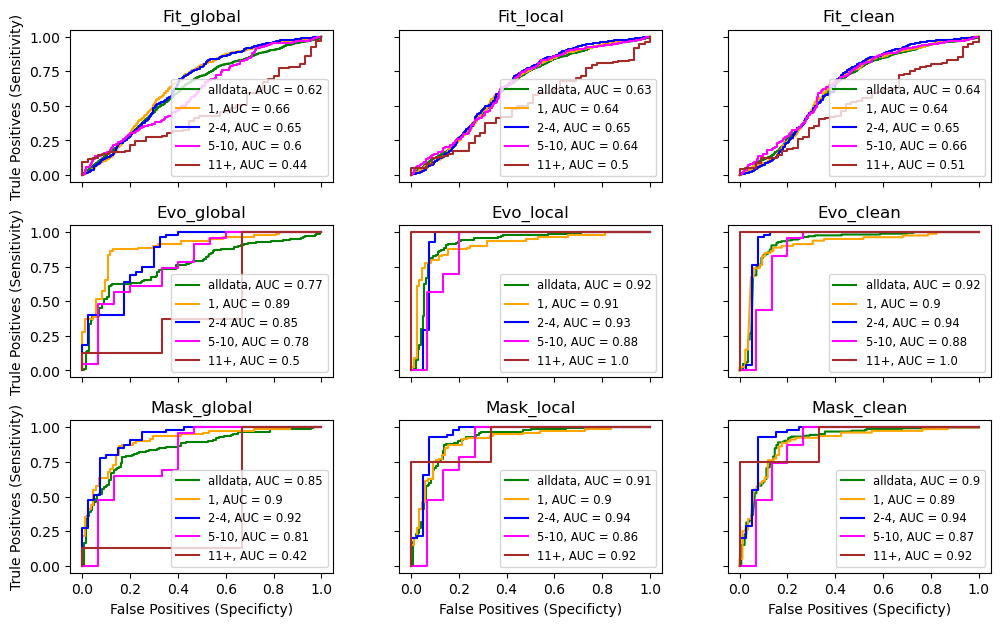

In [36]:
f, axes = plt.subplots(3,3)
f.set_figheight(6)
f.set_figwidth(10)
f.tight_layout(pad=1)
axes[0,0].plot(fpr_Fit_global, tpr_Fit_global, label = "alldata, AUC = "+str(roc_auc_Fit_global), color = "green")
axes[0,0].plot(fpr_1_Fit_global, tpr_1_Fit_global, label = "1, AUC = "+str(roc_auc_1_Fit_global), color = "orange")
axes[0,0].plot(fpr_2to4_Fit_global, tpr_2to4_Fit_global, label = "2-4, AUC = "+str(roc_auc_2to4_Fit_global), color = "blue")
axes[0,0].plot(fpr_5to10_Fit_global, tpr_5to10_Fit_global, label = "5-10, AUC = "+str(roc_auc_5to10_Fit_global), color = "magenta")
axes[0,0].plot(fpr_11pluss_Fit_global, tpr_11pluss_Fit_global, label = "11+, AUC = "+str(roc_auc_11pluss_Fit_global), color = "brown")
axes[0,0].set_title('Fit_global')
axes[0,0].legend(fontsize='small')
axes[0,1].plot(fpr_Fit_local, tpr_Fit_local, label = "alldata, AUC = "+str(roc_auc_Fit_local), color = "green")
axes[0,1].plot(fpr_1_Fit_local, tpr_1_Fit_local, label = "1, AUC = "+str(roc_auc_1_Fit_local), color = "orange")
axes[0,1].plot(fpr_2to4_Fit_local, tpr_2to4_Fit_local, label = "2-4, AUC = "+str(roc_auc_2to4_Fit_local), color = "blue")
axes[0,1].plot(fpr_5to10_Fit_local, tpr_5to10_Fit_local, label = "5-10, AUC = "+str(roc_auc_5to10_Fit_local), color = "magenta")
axes[0,1].plot(fpr_11pluss_Fit_local, tpr_11pluss_Fit_local, label = "11+, AUC = "+str(roc_auc_11pluss_Fit_local), color = "brown")
axes[0,1].set_title('Fit_local')
axes[0,1].legend(fontsize='small')
axes[0,2].plot(fpr_Fit_clean, tpr_Fit_clean, label = "alldata, AUC = "+str(roc_auc_Fit_clean), color = "green")
axes[0,2].plot(fpr_1_Fit_clean, tpr_1_Fit_clean, label = "1, AUC = "+str(roc_auc_1_Fit_clean), color = "orange")
axes[0,2].plot(fpr_2to4_Fit_clean, tpr_2to4_Fit_clean, label = "2-4, AUC = "+str(roc_auc_2to4_Fit_clean), color = "blue")
axes[0,2].plot(fpr_5to10_Fit_clean, tpr_5to10_Fit_clean, label = "5-10, AUC = "+str(roc_auc_5to10_Fit_clean), color = "magenta")
axes[0,2].plot(fpr_11pluss_Fit_clean, tpr_11pluss_Fit_clean, label = "11+, AUC = "+str(roc_auc_11pluss_Fit_clean), color = "brown")
axes[0,2].set_title('Fit_clean')
axes[0,2].legend(fontsize='small')
axes[1,0].plot(fpr_Evo_global, tpr_Evo_global, label = "alldata, AUC = "+str(roc_auc_Evo_global), color = "green")
axes[1,0].plot(fpr_1_Evo_global, tpr_1_Evo_global, label = "1, AUC = "+str(roc_auc_1_Evo_global), color = "orange")
axes[1,0].plot(fpr_2to4_Evo_global, tpr_2to4_Evo_global, label = "2-4 AUC = "+str(roc_auc_2to4_Evo_global), color = "blue")
axes[1,0].plot(fpr_5to10_Evo_global, tpr_5to10_Evo_global, label = "5-10, AUC = "+str(roc_auc_5to10_Evo_global), color = "magenta")
axes[1,0].plot(fpr_11pluss_Evo_global, tpr_11pluss_Evo_global, label = "11+, AUC = "+str(roc_auc_11pluss_Evo_global), color = "brown")
axes[1,0].set_title('Evo_global')
axes[1,0].legend(fontsize='small')
axes[1,1].plot(fpr_Evo_local, tpr_Evo_local, label = "alldata, AUC = "+str(roc_auc_Evo_local), color = "green")
axes[1,1].plot(fpr_1_Evo_local, tpr_1_Evo_local, label = "1, AUC = "+str(roc_auc_1_Evo_local), color = "orange")
axes[1,1].plot(fpr_2to4_Evo_local, tpr_2to4_Evo_local, label = "2-4, AUC = "+str(roc_auc_2to4_Evo_local), color = "blue")
axes[1,1].plot(fpr_5to10_Evo_local, tpr_5to10_Evo_local, label = "5-10, AUC = "+str(roc_auc_5to10_Evo_local), color = "magenta")
axes[1,1].plot(fpr_11pluss_Evo_local, tpr_11pluss_Evo_local, label = "11+, AUC = "+str(roc_auc_11pluss_Evo_local), color = "brown")
axes[1,1].set_title('Evo_local')
axes[1,1].legend(fontsize='small')
axes[1,2].plot(fpr_Evo_clean, tpr_Evo_clean, label = "alldata, AUC = "+str(roc_auc_Evo_clean), color = "green")
axes[1,2].plot(fpr_1_Evo_clean, tpr_1_Evo_clean, label = "1, AUC = "+str(roc_auc_1_Evo_clean), color = "orange")
axes[1,2].plot(fpr_2to4_Evo_clean, tpr_2to4_Evo_clean, label = "2-4, AUC = "+str(roc_auc_2to4_Evo_clean), color = "blue")
axes[1,2].plot(fpr_5to10_Evo_clean, tpr_5to10_Evo_clean, label = "5-10, AUC = "+str(roc_auc_5to10_Evo_clean), color = "magenta")
axes[1,2].plot(fpr_11pluss_Evo_clean, tpr_11pluss_Evo_clean, label = "11+, AUC = "+str(roc_auc_11pluss_Evo_clean), color = "brown")
axes[1,2].set_title('Evo_clean')
axes[1,2].legend(fontsize='small')
axes[2,0].plot(fpr_Mask_global, tpr_Mask_global, label = "alldata, AUC = "+str(roc_auc_Mask_global), color = "green")
axes[2,0].plot(fpr_1_Mask_global, tpr_1_Mask_global, label = "1, AUC = "+str(roc_auc_1_Mask_global), color = "orange")
axes[2,0].plot(fpr_2to4_Mask_global, tpr_2to4_Mask_global, label = "2-4, AUC = "+str(roc_auc_2to4_Mask_global), color = "blue")
axes[2,0].plot(fpr_5to10_Mask_global, tpr_5to10_Mask_global, label = "5-10, AUC = "+str(roc_auc_5to10_Mask_global), color = "magenta")
axes[2,0].plot(fpr_11pluss_Mask_global, tpr_11pluss_Mask_global, label = "11+, AUC = "+str(roc_auc_11pluss_Mask_global), color = "brown")
axes[2,0].set_title('Mask_global')
axes[2,0].legend(fontsize='small')
axes[2,1].plot(fpr_Mask_local, tpr_Mask_local, label = "alldata, AUC = "+str(roc_auc_Mask_local), color = "green")
axes[2,1].plot(fpr_1_Mask_local, tpr_1_Mask_local, label = "1, AUC = "+str(roc_auc_1_Mask_local), color = "orange")
axes[2,1].plot(fpr_2to4_Mask_local, tpr_2to4_Mask_local, label = "2-4, AUC = "+str(roc_auc_2to4_Mask_local), color = "blue")
axes[2,1].plot(fpr_5to10_Mask_local, tpr_5to10_Mask_local, label = "5-10, AUC = "+str(roc_auc_5to10_Mask_local), color = "magenta")
axes[2,1].plot(fpr_11pluss_Mask_local, tpr_11pluss_Mask_local, label = "11+, AUC = "+str(roc_auc_11pluss_Mask_local), color = "brown")
axes[2,1].set_title('Mask_local')
axes[2,1].legend(fontsize='small')
axes[2,2].plot(fpr_Mask_clean, tpr_Mask_clean, label = "alldata, AUC = "+str(roc_auc_Mask_clean), color = "green")
axes[2,2].plot(fpr_1_Mask_clean, tpr_1_Mask_clean, label = "1, AUC = "+str(roc_auc_1_Mask_clean), color = "orange")
axes[2,2].plot(fpr_2to4_Mask_clean, tpr_2to4_Mask_clean, label = "2-4, AUC = "+str(roc_auc_2to4_Mask_clean), color = "blue")
axes[2,2].plot(fpr_5to10_Mask_clean, tpr_5to10_Mask_clean, label = "5-10, AUC = "+str(roc_auc_5to10_Mask_clean), color = "magenta")
axes[2,2].plot(fpr_11pluss_Mask_clean, tpr_11pluss_Mask_clean, label = "11+, AUC = "+str(roc_auc_11pluss_Mask_clean), color = "brown")
axes[2,2].set_title('Mask_clean')
axes[2,2].legend(fontsize='small')
''' 
axes[3,0].plot(fpr_ProstT5_global, tpr_ProstT5_global, label = "alldata, AUC = "+str(roc_auc_ProstT5_global), color = "green")
axes[3,0].plot(fpr_1_ProstT5_global, tpr_1_ProstT5_global, label = "1, AUC = "+str(roc_auc_1_ProstT5_global), color = "orange")
axes[3,0].plot(fpr_2to4_ProstT5_global, tpr_2to4_ProstT5_global, label = "2-4, AUC = "+str(roc_auc_2to4_ProstT5_global), color = "blue")
axes[3,0].plot(fpr_5to10_ProstT5_global, tpr_5to10_ProstT5_global, label = "5-10, AUC = "+str(roc_auc_5to10_ProstT5_global), color = "magenta")
axes[3,0].plot(fpr_11pluss_ProstT5_global, tpr_11pluss_ProstT5_global, label = "11+, AUC = "+str(roc_auc_11pluss_ProstT5_global), color = "brown")
axes[3,0].set_title('ProstT5_global')
axes[3,0].legend(fontsize='small')
axes[3,1].plot(fpr_ProstT5_local, tpr_ProstT5_local, label = "alldata, AUC = "+str(roc_auc_ProstT5_local), color = "green")
axes[3,1].plot(fpr_1_ProstT5_local, tpr_1_ProstT5_local, label = "1, AUC = "+str(roc_auc_1_ProstT5_local), color = "orange")
axes[3,1].plot(fpr_2to4_ProstT5_local, tpr_2to4_ProstT5_local, label = "2-4, AUC = "+str(roc_auc_2to4_ProstT5_local), color = "blue")
axes[3,1].plot(fpr_5to10_ProstT5_local, tpr_5to10_ProstT5_local, label = "5-10, AUC = "+str(roc_auc_5to10_ProstT5_local), color = "magenta")
axes[3,1].plot(fpr_11pluss_ProstT5_local, tpr_11pluss_ProstT5_local, label = "11+, AUC = "+str(roc_auc_11pluss_ProstT5_local), color = "brown")
axes[3,1].set_title('ProstT5_local')
axes[3,1].legend(fontsize='small')
axes[3,2].plot(fpr_ProstT5_clean, tpr_ProstT5_clean, label = "alldata, AUC = "+str(roc_auc_ProstT5_clean), color = "green")
axes[3,2].plot(fpr_1_ProstT5_clean, tpr_1_ProstT5_clean, label = "1, AUC = "+str(roc_auc_1_ProstT5_clean), color = "orange")
axes[3,2].plot(fpr_2to4_ProstT5_clean, tpr_2to4_ProstT5_clean, label = "2-4, AUC = "+str(roc_auc_2to4_ProstT5_clean), color = "blue")
axes[3,2].plot(fpr_5to10_ProstT5_clean, tpr_5to10_ProstT5_clean, label = "5-10, AUC = "+str(roc_auc_5to10_ProstT5_clean), color = "magenta")
axes[3,2].plot(fpr_11pluss_ProstT5_clean, tpr_11pluss_ProstT5_clean, label = "11+, AUC = "+str(roc_auc_11pluss_ProstT5_clean), color = "brown")
axes[3,2].set_title('ProstT5_clean')
axes[3,2].legend(fontsize='small')
axes[4,0].plot(fpr_ESM3_global, tpr_ESM3_global, label = "alldata, AUC = "+str(roc_auc_ESM3_global), color = "green")
axes[4,0].plot(fpr_1_ESM3_global, tpr_1_ESM3_global, label = "1, AUC = "+str(roc_auc_1_ESM3_global), color = "orange")
axes[4,0].plot(fpr_2to4_ESM3_global, tpr_2to4_ESM3_global, label = "2-4, AUC = "+str(roc_auc_2to4_ESM3_global), color = "blue")
axes[4,0].plot(fpr_5to10_ESM3_global, tpr_5to10_ESM3_global, label = "5-10, AUC = "+str(roc_auc_5to10_ESM3_global), color = "magenta")
axes[4,0].plot(fpr_11pluss_ESM3_global, tpr_11pluss_ESM3_global, label = "11+, AUC = "+str(roc_auc_11pluss_ESM3_global), color = "brown")
axes[4,0].set_title('ESM3_global')
axes[4,0].legend(fontsize='small')
axes[4,1].plot(fpr_ESM3_local, tpr_ESM3_local, label = "alldata, AUC = "+str(roc_auc_ESM3_local), color = "green")
axes[4,1].plot(fpr_1_ESM3_local, tpr_1_ESM3_local, label = "1, AUC = "+str(roc_auc_1_ESM3_local), color = "orange")
axes[4,1].plot(fpr_2to4_ESM3_local, tpr_2to4_ESM3_local, label = "2-4, AUC = "+str(roc_auc_2to4_ESM3_local), color = "blue")
axes[4,1].plot(fpr_5to10_ESM3_local, tpr_5to10_ESM3_local, label = "5-10, AUC = "+str(roc_auc_5to10_ESM3_local), color = "magenta")
axes[4,1].plot(fpr_11pluss_ESM3_local, tpr_11pluss_ESM3_local, label = "11+, AUC = "+str(roc_auc_11pluss_ESM3_local), color = "brown")
axes[4,1].set_title('ESM3_local')
axes[4,1].legend(fontsize='small')
axes[4,2].plot(fpr_ESM3_clean, tpr_ESM3_clean, label = "alldata, AUC = "+str(roc_auc_ESM3_clean), color = "green")
axes[4,2].plot(fpr_1_ESM3_clean, tpr_1_ESM3_clean, label = "1, AUC = "+str(roc_auc_1_ESM3_clean), color = "orange")
axes[4,2].plot(fpr_2to4_ESM3_clean, tpr_2to4_ESM3_clean, label = "2-4, AUC = "+str(roc_auc_2to4_ESM3_clean), color = "blue")
axes[4,2].plot(fpr_5to10_ESM3_clean, tpr_5to10_ESM3_clean, label = "5-10, AUC = "+str(roc_auc_5to10_ESM3_clean), color = "magenta")
axes[4,2].plot(fpr_11pluss_ESM3_clean, tpr_11pluss_ESM3_clean, label = "11+, AUC = "+str(roc_auc_11pluss_ESM3_clean), color = "brown")
axes[4,2].set_title('ESM3_clean')
axes[4,2].legend(fontsize='small')
'''
for ax in axes.flat:
    ax.set(xlabel = 'False Positives (Specificty)', ylabel ='Trule Positives (Sensitivity)')
for ax in axes.flat:
    ax.label_outer()

plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0.4, '0.76')

Text(1.5, 0.4, '0.80')

Text(1.5, 0.7, '+0.04')

Text(2.5, 0.4, '0.61')

Text(2.5, 0.7, '$\\mathbf{-0.15}$')

Text(3.5, 0.4, '0.81')

Text(3.5, 0.7, '+0.05')

Text(4.5, 0.4, '0.60')

Text(4.5, 0.7, '$\\mathbf{-0.16}$')

Text(5.5, 0.4, '0.78')

Text(5.5, 0.7, '+0.02')

Text(6.5, 0.4, '0.73')

Text(6.5, 0.7, '-0.03')

Text(7.5, 0.4, '0.75')

Text(7.5, 0.7, '-0.01')

Text(8.5, 0.4, '0.79')

Text(8.5, 0.7, '+0.03')

Text(0.5, 1.4, '0.82')

Text(1.5, 1.4, '0.86')

Text(1.5, 1.7, '+0.04')

Text(2.5, 1.4, '0.68')

Text(2.5, 1.7, '$\\mathbf{-0.14}$')

Text(3.5, 1.4, '0.85')

Text(3.5, 1.7, '+0.03')

Text(4.5, 1.4, '0.70')

Text(4.5, 1.7, '$\\mathbf{-0.12}$')

Text(5.5, 1.4, '0.84')

Text(5.5, 1.7, '+0.02')

Text(6.5, 1.4, '0.76')

Text(6.5, 1.7, '-0.06')

Text(7.5, 1.4, '0.84')

Text(7.5, 1.7, '+0.02')

Text(8.5, 1.4, '0.81')

Text(8.5, 1.7, '-0.01')

Text(0.5, 2.4, '0.84')

Text(1.5, 2.4, '0.87')

Text(1.5, 2.7, '+0.03')

Text(2.5, 2.4, '0.65')

Text(2.5, 2.7, '$\\mathbf{-0.18}$')

Text(3.5, 2.4, '0.86')

Text(3.5, 2.7, '+0.03')

Text(4.5, 2.4, '0.75')

Text(4.5, 2.7, '-0.08')

Text(5.5, 2.4, '0.84')

Text(5.5, 2.7, '+0.01')

Text(6.5, 2.4, '0.84')

Text(6.5, 2.7, '+0.00')

Text(7.5, 2.4, '0.82')

Text(7.5, 2.7, '-0.01')

Text(8.5, 2.4, '0.80')

Text(8.5, 2.7, '-0.03')

Text(0.5, 3.4, '0.72')

Text(1.5, 3.4, '0.77')

Text(1.5, 3.7, '+0.05')

Text(2.5, 3.4, '0.57')

Text(2.5, 3.7, '$\\mathbf{-0.15}$')

Text(3.5, 3.4, '0.76')

Text(3.5, 3.7, '+0.04')

Text(4.5, 3.4, '0.61')

Text(4.5, 3.7, '$\\mathbf{-0.11}$')

Text(5.5, 3.4, '0.75')

Text(5.5, 3.7, '+0.03')

Text(6.5, 3.4, '0.65')

Text(6.5, 3.7, '-0.07')

Text(7.5, 3.4, '0.67')

Text(7.5, 3.7, '-0.05')

Text(8.5, 3.4, '0.64')

Text(8.5, 3.7, '-0.08')

Text(0.5, 4.4, '0.97')

Text(1.5, 4.4, '0.97')

Text(1.5, 4.7, '+0.00')

Text(2.5, 4.4, '0.84')

Text(2.5, 4.7, '$\\mathbf{-0.13}$')

Text(3.5, 4.4, '0.96')

Text(3.5, 4.7, '-0.01')

Text(4.5, 4.4, '0.99')

Text(4.5, 4.7, '+0.02')

Text(5.5, 4.4, '0.96')

Text(5.5, 4.7, '-0.00')

Text(6.5, 4.4, '0.98')

Text(6.5, 4.7, '+0.01')

Text(7.5, 4.4, '0.96')

Text(7.5, 4.7, '-0.01')

Text(8.5, 4.4, '0.98')

Text(8.5, 4.7, '+0.02')

Text(0.5, 5.4, '0.90')

Text(1.5, 5.4, '0.88')

Text(1.5, 5.7, '-0.02')

Text(2.5, 5.4, '0.89')

Text(2.5, 5.7, '-0.01')

Text(3.5, 5.4, '0.88')

Text(3.5, 5.7, '-0.02')

Text(4.5, 5.4, '0.92')

Text(4.5, 5.7, '+0.02')

Text(5.5, 5.4, '0.88')

Text(5.5, 5.7, '-0.02')

Text(6.5, 5.4, '0.94')

Text(6.5, 5.7, '+0.04')

Text(7.5, 5.4, '0.91')

Text(7.5, 5.7, '+0.01')

Text(8.5, 5.4, '0.86')

Text(8.5, 5.7, '-0.04')

Text(0.5, 6.4, '0.70')

Text(1.5, 6.4, '0.67')

Text(1.5, 6.7, '-0.03')

Text(2.5, 6.4, '0.66')

Text(2.5, 6.7, '-0.04')

Text(3.5, 6.4, '0.72')

Text(3.5, 6.7, '+0.02')

Text(4.5, 6.4, '0.67')

Text(4.5, 6.7, '-0.03')

Text(5.5, 6.4, '0.61')

Text(5.5, 6.7, '-0.09')

Text(6.5, 6.4, '0.71')

Text(6.5, 6.7, '+0.01')

Text(7.5, 6.4, '0.77')

Text(7.5, 6.7, '+0.07')

Text(8.5, 6.4, '0.91')

Text(8.5, 6.7, '$\\mathbf{+0.20}$')

Text(0.5, 7.4, '0.85')

Text(1.5, 7.4, '0.87')

Text(1.5, 7.7, '+0.02')

Text(2.5, 7.4, '0.70')

Text(2.5, 7.7, '$\\mathbf{-0.15}$')

Text(3.5, 7.4, '0.87')

Text(3.5, 7.7, '+0.02')

Text(4.5, 7.4, '0.78')

Text(4.5, 7.7, '-0.07')

Text(5.5, 7.4, '0.90')

Text(5.5, 7.7, '+0.04')

Text(6.5, 7.4, '0.86')

Text(6.5, 7.7, '+0.00')

Text(7.5, 7.4, '0.82')

Text(7.5, 7.7, '-0.04')

Text(8.5, 7.4, '0.81')

Text(8.5, 7.7, '-0.04')

Text(0.5, 8.4, '0.83')

Text(1.5, 8.4, '0.86')

Text(1.5, 8.7, '+0.04')

Text(2.5, 8.4, '0.55')

Text(2.5, 8.7, '$\\mathbf{-0.28}$')

Text(3.5, 8.4, '0.86')

Text(3.5, 8.7, '+0.03')

Text(4.5, 8.4, '0.73')

Text(4.5, 8.7, '-0.09')

Text(5.5, 8.4, '0.88')

Text(5.5, 8.7, '+0.06')

Text(6.5, 8.4, '0.79')

Text(6.5, 8.7, '-0.03')

Text(7.5, 8.4, '0.78')

Text(7.5, 8.7, '-0.05')

Text(8.5, 8.4, '0.84')

Text(8.5, 8.7, '+0.01')

Text(0.5, 9.4, '0.70')

Text(1.5, 9.4, '0.65')

Text(1.5, 9.7, '-0.06')

Text(2.5, 9.4, '0.78')

Text(2.5, 9.7, '+0.08')

Text(3.5, 9.4, '0.67')

Text(3.5, 9.7, '-0.04')

Text(4.5, 9.4, '0.78')

Text(4.5, 9.7, '+0.07')

Text(5.5, 9.4, '0.66')

Text(5.5, 9.7, '-0.05')

Text(6.5, 9.4, '0.75')

Text(6.5, 9.7, '+0.04')

Text(7.5, 9.4, '0.75')

Text(7.5, 9.7, '+0.05')

Text(8.5, 9.4, '0.66')

Text(8.5, 9.7, '-0.04')

Text(0.5, 10.4, '0.89')

Text(1.5, 10.4, '0.86')

Text(1.5, 10.7, '-0.04')

Text(2.5, 10.4, '0.91')

Text(2.5, 10.7, '+0.02')

Text(3.5, 10.4, '0.85')

Text(3.5, 10.7, '-0.04')

Text(4.5, 10.4, '0.97')

Text(4.5, 10.7, '+0.08')

Text(5.5, 10.4, '0.86')

Text(5.5, 10.7, '-0.04')

Text(6.5, 10.4, '0.96')

Text(6.5, 10.7, '+0.07')

Text(7.5, 10.4, '0.94')

Text(7.5, 10.7, '+0.04')

Text(8.5, 10.4, '1.00')

Text(8.5, 10.7, '$\\mathbf{+0.11}$')

Text(0.5, 11.4, '0.89')

Text(1.5, 11.4, '0.86')

Text(1.5, 11.7, '-0.04')

Text(2.5, 11.4, '0.91')

Text(2.5, 11.7, '+0.02')

Text(3.5, 11.4, '0.85')

Text(3.5, 11.7, '-0.04')

Text(4.5, 11.4, '0.97')

Text(4.5, 11.7, '+0.08')

Text(5.5, 11.4, '0.86')

Text(5.5, 11.7, '-0.04')

Text(6.5, 11.4, '0.96')

Text(6.5, 11.7, '+0.07')

Text(7.5, 11.4, '0.94')

Text(7.5, 11.7, '+0.04')

Text(8.5, 11.4, '1.00')

Text(8.5, 11.7, '$\\mathbf{+0.11}$')

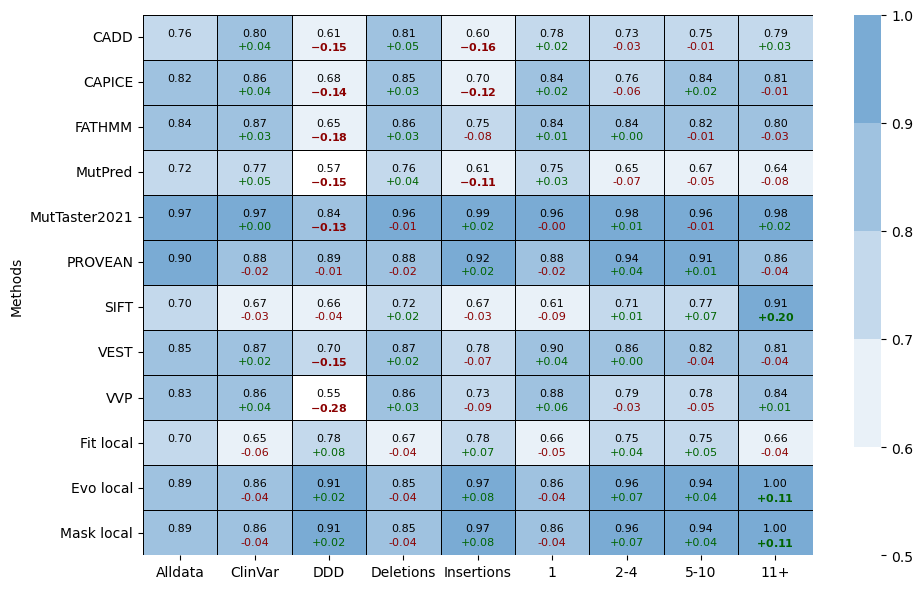

In [74]:
#Update this to have a different background color, and positive in one color, negative in another. Bold out the values that changes >= 0.1
#Summary table to F1 scores
from matplotlib.colors import ListedColormap
my_colors = ['white', '#e9f1f8', '#c4d9ec', '#9fc2e0', '#7aabd4']
#  '#5593c8'
# my_colors = ['#f8f0e3', '#edd2a4', '#e1b56b', '#d69933', '#cc7f00']
my_cmap = ListedColormap(my_colors)

summarydata = {
    'Methods': ['CADD', 'CAPICE', 'FATHMM', 'MutPred', 'MutTaster2021', 'PROVEAN', 'SIFT', 'VEST', 'VVP', 'Fit local', 'Evo local', 'Mask local'],
    'Alldata': [f1_CADD, f1_CAPICE, f1_FATHMM, f1_MutPred, f1_MutT, f1_PROVEAN, f1_SIFT, f1_VEST, f1_VVP, f1_Fit_local, f1_Evo_local, f1_Evo_local],
    'ClinVar': [f1_ClinVar_CADD, f1_ClinVar_CAPICE, f1_ClinVar_FATHMM, f1_ClinVar_MutPred, f1_ClinVar_MutT, f1_ClinVar_PROVEAN, f1_ClinVar_SIFT, f1_ClinVar_VEST, f1_ClinVar_VVP, f1_ClinVar_Fit_local, f1_ClinVar_Evo_local, f1_ClinVar_Evo_local],
    'DDD': [f1_DDD_CADD, f1_DDD_CAPICE, f1_DDD_FATHMM, f1_DDD_MutPred, f1_DDD_MutT, f1_DDD_PROVEAN, f1_DDD_SIFT, f1_DDD_VEST, f1_DDD_VVP, f1_DDD_Fit_local, f1_DDD_Evo_local, f1_DDD_Evo_local],
    'Deletions': [f1_del_CADD, f1_del_CAPICE, f1_del_FATHMM, f1_del_MutPred, f1_del_MutT, f1_del_PROVEAN, f1_del_SIFT, f1_del_VEST, f1_del_VVP, f1_del_Fit_local, f1_del_Evo_local, f1_del_Evo_local],
    'Insertions': [f1_ins_CADD, f1_ins_CAPICE, f1_ins_FATHMM, f1_ins_MutPred, f1_ins_MutT, f1_ins_PROVEAN, f1_ins_SIFT, f1_ins_VEST, f1_ins_VVP, f1_ins_Fit_local, f1_ins_Evo_local, f1_ins_Evo_local],
    '1': [f1_1_CADD, f1_1_CAPICE, f1_1_FATHMM, f1_1_MutPred, f1_1_MutT, f1_1_PROVEAN, f1_1_SIFT, f1_1_VEST, f1_1_VVP, f1_1_Fit_local, f1_1_Evo_local, f1_1_Evo_local],
    '2-4': [f1_2to4_CADD, f1_2to4_CAPICE, f1_2to4_FATHMM, f1_2to4_MutPred, f1_2to4_MutT, f1_2to4_PROVEAN, f1_2to4_SIFT, f1_2to4_VEST, f1_2to4_VVP, f1_2to4_Fit_local, f1_2to4_Evo_local, f1_2to4_Evo_local],
    '5-10': [f1_5to10_CADD, f1_5to10_CAPICE, f1_5to10_FATHMM, f1_5to10_MutPred, f1_5to10_MutT, f1_5to10_PROVEAN, f1_5to10_SIFT, f1_5to10_VEST, f1_5to10_VVP, f1_5to10_Fit_local, f1_5to10_Evo_local, f1_5to10_Evo_local],
    '11+': [f1_11pluss_CADD, f1_11pluss_CAPICE, f1_11pluss_FATHMM, f1_11pluss_MutPred, f1_11pluss_MutT, f1_11pluss_PROVEAN, f1_11pluss_SIFT, f1_11pluss_VEST, f1_11pluss_VVP, f1_11pluss_Fit_local, f1_11pluss_Evo_local, f1_11pluss_Evo_local]
}

table = pd.DataFrame(summarydata)
table.set_index('Methods', inplace=True)

diffs = table.subtract(table['Alldata'], axis = 0)

# Create a heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table, annot=False, cmap=my_cmap, vmin=0.5, vmax=1, cbar=True, linewidths=0.5, linecolor='black')

for y in range(table.shape[0]):
    for x in range(table.shape[1]):
        value = table.iloc[y, x]
        if table.columns[x] != 'Alldata':  # Skip annotating differences for the "Alldata" column itself
            diff_value = diffs.iloc[y, x]
            diff_str = f"{diff_value:+.2f}"
            
            # Determine color based on the sign of diff_value
            diff_color = 'darkgreen' if diff_value >= 0 else 'darkred'
                
            # Make the diff_value bold if the condition is met
            if diff_value >= 0.1 or diff_value <= -0.1:
                diff_str = f"$\\mathbf{{{diff_str}}}$"
            
            # Display original value and diff value on separate lines
            ax.text(x + 0.5, y + 0.4, f"{value:.2f}", ha='center', va='center', color='black', fontsize=8)
            ax.text(x + 0.5, y + 0.7, diff_str, ha='center', va='center', color=diff_color, fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.4, f"{value:.2f}", ha='center', va='center', color='black', fontsize=8)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

For comparison, only use sequences that we have a prediction for all methods. 

compare everything (ROC, F1) how the models that are out there preforme
Boxplot (But at the enda)

Then compare our models (Mask, Evo, Fit - just best scoring (local?)) show our methods works

explaining further analysis 
(indels sizes, types of indels insertions and deletions) Look at the publihsed papers. One for their methods and one for our methods
splitting dataset after sizes and types and then recalculating Roc and F1 

Dataset split (their vs our methods) (contiue w filtered dataset)

Summary table with all data (F1)

Explination of how the methods works (their and our). 

Main appeal: no overfitting and outside human, full generalisable 

#look for uniprotIDs with deletion/insertions/pathogen/bening same protein. find the aa diff and plot and color protein structre
#Make figures for method to calculate score
#oriol look at ColabFold options






VEST-Indel: Douville et al. 2015 (https://onlinelibrary.wiley.com/doi/full/10.1002/humu.22911)

From method section: 

A curated set of in-frame and frameshift indels (microdeletions and microinsertions) of ≤20 base-pairs in length, annotated as being pathogenic from publications in the biomedical literature, was downloaded from Human Gene Mutation Database [Stenson et al., 2014] (2014v.3). Only high-confidence annotations with the “DM” designation were included. A second curated set of in-frame and frameshift indels was downloaded from the NCBI ClinVar database on August 7, 2014. Only entries annotated as “likely pathogenic” (Clinical Significance 4) or “pathogenic” (Clinical Significance 5) and not annotated as a somatic mutation were included. Any entry from ClinVar that was also present in HGMD was removed from the ClinVar set. Annotated in-frame and frameshift variants were downloaded from the Exome Variant Server using (ESP6500SI-V2-SSA137) [Fu et al., 2013] and from the 1000 Genomes Project Phase 3 (ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/) [Clarke et al., 2012]. To increase the likelihood that variants from the Exome Variant Server and 1000 Genomes Project were benign common polymorphisms, and to retain sufficient variants for our training set, we only used variants with a minor allele frequency (MAF) ≥0.01 and occurring in either African individuals or those of African ancestry. In ESP600, these were identified as “African-American” and in 1000G as the AFR superpopulation comprising YRI (Yoruba in Ibadan, Nigeria), LWK (luhya in Webuye, Kenya), GWD (Gambian in Western Divisions in the Gambia), MSL (Mende in Sierra Leone), ESN (Esan in Nigeria), ASW (Americans of African ancestry in SW USA), and ACG (African Caribbeans in Barbados). The other populations represented in ESP6500 and 1000G are believed to have experienced severe bottlenecks in recent history, and hence individuals from these populations may harbor potentially pathogenic variants at higher MAF than individuals of African ancestry [Lohmueller et al., 2008; MacArthur and Tyler-Smith, 2010; Ng et al., 2008; Hu and Ng, 2012]. A curated set of putatively benign in-frame and frameshift indels, derived from pairwise genome alignments of human and cow, dog, horse, chimpanzee, rhesus macaque, and rat, was generously provided to us by Pauline Ng and Jing Hu. This set had been previously used to train their SIFT-indel classifier [Hu and Ng, 2012; Hu and Ng, 2013]. Additional background information about these data sets, including probability densities for indel length and MAF, are shown in Supp. Figure S1.

FATHMM-indel: Ferlaino et al. 2017: https://link.springer.com/article/10.1186/s12859-017-1862-y

We developed a machine learning approach to classify the functional effects of small indels, that is, variants where the sequence change involves up to 20 base pairs. 
An integrative approach to predict the functional effect, pathogenic or neutral, of indels in non-coding regions of the human genome. Our method exploits various genomic annotations in addition to sequence data. When validated on benchmark data, FATHMM-indel significantly outperforms CADD and GAVIN, state of the art models in assessing the pathogenic impact of non-coding variants. FATHMM-indel is available via a web server at indels.biocompute.org.uk.

From methods: Pathogenic non–coding indels were collected from the CinVar database.

CADD: Rentzsch et al. 2021 https://link.springer.com/article/10.1186/s13073-021-00835-9

Method: 
The MFASS [26] data set was downloaded from GitHub (https://github.com/KosuriLab/MFASS/). The data set was split into intronic (n = 13,603) and exonic (n = 14,130) variants as defined by Cheung et al. [26]. Further, the data set was split into splice-disrupting variants (sdv, n = 1050) and variants that do not disrupt splicing (no-sdv, n = 26,683) based on whether the psi ratio of the tested exon changed by more than 0.5 (Δpsi > 0.5). 

CAPICE: Li et al. 2020 https://link.springer.com/article/10.1186/s13073-020-00775-w

A new machine-learning-based method for prioritizing pathogenic variants, including SNVs and short InDels.

Training and benchmark data on neutral and pathogenic variants were derived from vcf files from the ClinVar database [17], dated 02 January 2019; from the VKGL data share consortium [30]; from the GoNL data [31]; and from data used in a previous study [29]. From the ClinVar dataset, we collected variants reported by one or more submitters to have clear clinical significance, including pathogenic and likely pathogenic variants and neutral and likely neutral variants. From the VKGL data consortium, we collected variants with clear classifications, either (Likely) Pathogenic or (Likely) Benign, with support from one or more laboratories. The neutral variants from previous research developing the GAVIN tool [29] were mainly collected from ExAC without posing a constraint on allele frequency. We also obtained two neutral benchmark datasets from a benchmark study by [24] and the GoNL project.

PROVEAN Choi et al. 2012: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0046688

We have developed a new algorithm, PROVEAN (Protein Variation Effect Analyzer), which provides a generalized approach to predict the functional effects of protein sequence variations including single or multiple amino acid substitutions, and in-frame insertions and deletions. In any protein sequence (!)

The UniProt human protein variation dataset used in this study contains a single amino acid substitution dataset and a one to six amino acid in-frame indel dataset. The human single amino acid substitution dataset was obtained from the UniProt “Human Polymorphisms and Disease Mutations” dataset (Release 2011_09; http://www.uniprot.org/docs/humsavar), which contains 20,821 pre-annotated disease variants and 36,825 common polymorphisms. The human small in-frame indel dataset was built in-house from additional types of natural variations including deletions, insertions, and replacements (in-frame substitution of multiple amino acids) of length up to 6 amino acids from the UniProtKB/Swiss-Prot database (Dataset S1).

Testet for our deletion (bbarrel 3aa del), predicted as deleterious (-9.221 score, threshold -2.5)
![alt text](image.png)

MutationTaster2021 Steinhaus et al. 2021: https://academic.oup.com/nar/article/49/W1/W446/6249609

Here we present an update to MutationTaster, our DNA variant effect prediction tool. The new version uses a different prediction model and attains higher accuracy than its predecessor, especially for rare benign variants. In addition, we have integrated many sources of data that only became available after the last release (such as gnomAD and ExAC pLI scores) and changed the splice site prediction model. To more easily assess the relevance of detected known disease mutations to the clinical phenotype of the patient, MutationTaster now provides information on the diseases they cause.


MutPred-Indel Pagel et al. 2019: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007112

We present a machine learning method, MutPred-Indel, that predicts pathogenicity and identifies types of functional residues impacted by non-frameshifting insertion/deletion variation.

Training data sets: Disease causing sequence-retaining insertion, deletion, and complex indel variants were obtained from the Human Gene Mutation Database (HGMD), professional version 2017.1 [36]. For brevity, we will refer to the set of non-frameshifting insertion, deletion, and complex indel variants collectively as “insertion/deletion variants” or simply “variants” for the remainder of the text. Putatively neutral insertion/deletion variants were derived from the Genome Aggregation Database (gnomAD) [44]. In the process of collecting data, variants from gnomAD with Allele Count (AC) annotation of zero were considered to be of low quality and removed from the training data. Variants annotated within gnomAD with AC equal to one were similarly removed to reduce noise that may arise as a consequence of variants called in error. For each variant, the wild-type and mutant protein sequence were determined using ANNOVAR [45]. The number of variants considered in model training are described in Table 2. In total, the training data comprised 5606 single residue deletions, 1033 single residue insertions, 2427 multi-residue insertions, 3052 multi-residue deletions, and 1253 complex indel variants.

SIFT Indel: Hu et al. 2013 https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0077940

We construct a SIFT Indel prediction algorithm for 3n indels which achieves 82% accuracy, 81% sensitivity, 82% specificity, 82% precision, 0.63 MCC, and 0.87 AUC by 10-fold cross-validation.

The goal of this classifier is to predict if a 3n indel affects gene function (designated as “gene-damaging") or not (designated as “neutral”). The classifier for 3n indels was trained and tested on two datasets:

1. Indel Disease Set: Disease-causing indels were obtained from HGMD [2] version 2010.2. HGMD is a database of mutations found in affected patients, and these mutations are assumed to be gene-damaging. The original HGMD dataset contains 1,887 indels. We picked one indel per gene to be represented in the dataset to avoid over-training on genes that have many HGMD indel entries. After choosing one indel per gene and removing indels from non-exon regions and from genes with invalid/incomplete transcripts, 474 indels remained. The HGMD accession id’s of the 1,887 indels and 474 indels can be found in Data S1.
2. Neutral Indel Set: The set of neutral 3n indels were derived from pairwise alignments from the UCSC genome browser of human with cow, dog, horse, chimpanzee, rhesus macaque and rat [14]. After choosing one indel per gene and removing indels from non-exon regions and from genes with invalid/incomplete transcripts, there were 9,710 neutral indels. The locations of the neutral indels can be found in Data S1.

The VAAST Variant Prioritizer (VVP): Flygare et al. 2018 https://link.springer.com/article/10.1186/s12859-018-2056-y

The VAAST [13] Variant Prioritizer (VVP) can assign a prioritization score to any type of sequence variant, located anywhere in the genome. To do so, VVP leverages the same Composite Likelihood Ratio Test (CLRT) used by VAAST [13] and its derivatives, VAAST 2.0 [14] and pVAAST [15]. Whereas those tools use the CLRT to score genes to perform burden-based association testing in case-control and family based analyses [2, 16], VVP reports scores for individual variants, and is designed for very large-scale variant prioritization activities. Run times are a major motivation for the VVP project, which is why VVP is written entirely in C, including the VCF parser. All of these factors combine to allow VVP to score every variant in a typical WGS in less than 5 min using a computer with just 4 cpus and 16 GB of RAM.